# <center>Trabajo de Fin de Máster MBID<center>

**Nombre y apellidos:** Juan Díaz-Granados Pinchevsky

**Usuario VIU:** juanandres.diaz

---
# Inicialización
---

In [1]:
# Imports generales
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import io
from google.colab import files

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

seed = 42  # Semilla aleatoria

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('latin1')), index_col = index_fields)
    return df

Primero, se sube el conjunto de datos de entrenamiento:

In [2]:
train = upload_files()
print(train.shape)
train.head() # archivo data-tesis-jdgp.csv

Saving data-tesis-jdgp.csv to data-tesis-jdgp.csv
User uploaded file "data-tesis-jdgp.csv" with length 42502668 bytes
(39384, 78)


<ipython-input-1-04a6358f5bf8>:28: DtypeWarning: Columns (3,5,24,33,34,35,36,37,38,39,44,45,47,49,50,51,52,53,56,57,59,60,61,62,63,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('latin1')), index_col = index_fields)


Fecha  VOLTAJE CELDA 1  VOLTAJE CELDA 2 VOLTAJE CELDA 3  \
0  01/01/2023 00:00:00      3242.500977           3274.0     3328.001953   
1  01/01/2023 00:20:00      3243.000000           3273.0          3330.0   
2  01/01/2023 00:40:00      3240.000977           3271.0     3327.000977   
3  01/01/2023 01:00:00      3241.000000           3271.0          3327.0   
4  01/01/2023 01:20:00      3242.000000           3273.0          3329.0   

   VOLTAJE CELDA 4 VOLTAJE CELDA 5  VOLTAJE CELDA 6  VOLTAJE CELDA 7  \
0      3300.500977     3295.500977      3294.500977      3301.500977   
1      3302.000000          3296.0      3294.000000      3302.000000   
2      3298.001953     3293.000977      3292.000977      3299.001953   
3      3298.000000          3293.0      3291.000000      3300.000000   
4      3300.000000          3296.0      3294.000000      3301.750732   

   VOLTAJE CELDA 8  VOLTAJE CELDA 9  ...  Temp out Sal  Flujo Salm in  \
0      3234.001953      3305.500977  ...     86.949524      10.780000   
1      3236.000000      3306.000000  ...     86.934608      10.790000   
2      3233.000977      3303.000977  ...     86.943832      10.780000   
3      3233.000000      3303.000000  ...     86.869926      10.789666   
4      3236.000000      3305.501465  ...     86.893188      10.790000   

   Flujo Cat in  Densidad soda  F402 P_in  Flujo dia masico  \
0     10.662333    1345.994751    No Data      51566.160156   
1     10.670000    1345.887817    No Data         52829.125   
2     10.851331    1350.960938    No Data      53792.917969   
3     10.700000    1344.109985    No Data      54735.746094   
4     10.666334     1344.48645    No Data      55997.289062   

   Produccion soda kg/h  Aspirador hipo  Temp. Sulf  Temp. AH  
0           3783.219971       -9.387287   15.213566  8.372449  
1           3781.031982       -9.400275   15.136943  8.342432  
2           1811.105225       -8.417500   15.162076  8.343296  
3           3786.971191       -8.459558   15.059266  8.265951  
4           3784.781982       -8.065949   15.082098  8.242157  

[5 rows x 78 columns]

Se copia la base de datos:

In [3]:
train_cp = train.copy()

---
# Preprocesamiento de Datos
---

Se cuentan valores perdidos:

In [4]:
pd.set_option('display.max_rows',None)
train_cp.isna().sum()

Fecha                     0
VOLTAJE CELDA 1           0
VOLTAJE CELDA 2           0
VOLTAJE CELDA 3           0
VOLTAJE CELDA 4           0
VOLTAJE CELDA 5           0
VOLTAJE CELDA 6           0
VOLTAJE CELDA 7           0
VOLTAJE CELDA 8           0
VOLTAJE CELDA 9           0
VOLTAJE CELDA 10          0
VOLTAJE CELDA 11          0
VOLTAJE CELDA 12          0
VOLTAJE CELDA 13          0
VOLTAJE CELDA 14          0
VOLTAJE CELDA 15          0
VOLTAJE CELDA 16          0
VOLTAJE CELDA 17          0
VOLTAJE CELDA 18          0
VOLTAJE CELDA 19          0
VOLTAJE CELDA 20          0
VOLTAJE CELDA 21          0
VOLTAJE CELDA 22          0
VOLTAJE CELDA 23          0
VOLTAJE CELDA 24          0
VOLTAJE CELDA 25          0
VOLTAJE CELDA 26          0
VOLTAJE CELDA 27          0
VOLTAJE CELDA 28          0
VOLTAJE CELDA 29          0
VOLTAJE CELDA 30          0
VOLTAJE CELDA 31          0
VOLTAJE CELDA 32          0
VOLTAJE CELDA 33          0
VOLTAJE CELDA 34          0
VOLTAJE CELDA 35          0
VOLTAJE CELDA 36          0
VOLTAJE CELDA 37          0
VOLTAJE CELDA 38          0
VOLTAJE CELDA 39          0
VOLTAJE CELDA 40          0
VOLTAJE CELDA 41          0
VOLTAJE CELDA 42          0
VOLTAJE CELDA 43          0
VOLTAJE CELDA 44          0
DIFERENCIAL CL2/H2        0
AMPS                      0
Conc. Cat. Sal.           0
Densidad Sulf             0
T. Sal. K401              0
Sabroe Suc C/R            0
Sabroe Recal Suc          0
Sabroe Nivel              0
P. Sniff 404              0
ph Hipo                   0
Apertura soda hipo        0
Cond. AD                  0
Presión aire 7bar         0
Presión aire 11bar        0
Temperatura AlfaL salm    0
Presión Cl2               0
Presión H2                0
PV401A                    0
PV401B                    0
PV402A                    0
Temp in Cat               0
Temp in Salm              0
Temp out Cat              0
Temp out Sal              0
Flujo Salm in             0
Flujo Cat in              0
Densidad soda             0
F402 P_in                 0
Flujo dia masico          0
Produccion soda kg/h      0
Aspirador hipo            0
Temp. Sulf                0
Temp. AH                  0
dtype: int64

Contar valores no numéricos (ejemplo: "No Data")

In [5]:
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

non_numeric_counts = {}
for column in train_cp.columns:
    if column != 'Fecha':  # Evitar modificar la columna "Fecha"
        non_numeric_count = train_cp[column].apply(lambda x: not is_numeric(x)).sum()
        non_numeric_counts[column] = non_numeric_count

for column, count in non_numeric_counts.items():
    print(f"{column:<25} {count}")

VOLTAJE CELDA 1           0
VOLTAJE CELDA 2           0
VOLTAJE CELDA 3           1
VOLTAJE CELDA 4           0
VOLTAJE CELDA 5           1
VOLTAJE CELDA 6           0
VOLTAJE CELDA 7           0
VOLTAJE CELDA 8           0
VOLTAJE CELDA 9           0
VOLTAJE CELDA 10          0
VOLTAJE CELDA 11          0
VOLTAJE CELDA 12          0
VOLTAJE CELDA 13          0
VOLTAJE CELDA 14          0
VOLTAJE CELDA 15          0
VOLTAJE CELDA 16          0
VOLTAJE CELDA 17          0
VOLTAJE CELDA 18          0
VOLTAJE CELDA 19          0
VOLTAJE CELDA 20          0
VOLTAJE CELDA 21          0
VOLTAJE CELDA 22          0
VOLTAJE CELDA 23          0
VOLTAJE CELDA 24          1
VOLTAJE CELDA 25          0
VOLTAJE CELDA 26          0
VOLTAJE CELDA 27          0
VOLTAJE CELDA 28          0
VOLTAJE CELDA 29          0
VOLTAJE CELDA 30          0
VOLTAJE CELDA 31          0
VOLTAJE CELDA 32          0
VOLTAJE CELDA 33          86
VOLTAJE CELDA 34          86
VOLTAJE CELDA 35          86
VOLTAJE CELDA 36 

Se observa que existen muchas filas en algunas columnas de datos con valores no numéricos, por errores al momento de hacer el pull de datos del servidor o porque no existían en el histórico en el timestamp del pull.



Se tomará un porcentaje máximo de valores no numéricos de 5%, donde si una columna tiene más valores no numéricos que este máximo se eliminará del análisis completamente.

In [6]:
filas_tot = train_cp.shape[0]
train_imp = train_cp.copy()

# Porcentaje máximo de valores no numéricos permitidos
max_porcent = 5
limite_filas = filas_tot * (max_porcent / 100)
print("Límite de filas no numéricas: " + str(limite_filas) + "\n")

# Imputación y eliminación de columnas, excluyendo "Fecha"
columnas_imput_media = {}
columnas_imput_iter = {}
columnas_elim = []

# Imputadores, excluyendo la columna "Fecha"
imp_mean = train_imp.drop(columns=['Fecha'], errors='ignore')
imp_iter = train_imp.drop(columns=['Fecha'], errors='ignore')

for column in train_imp.columns:
    if column != 'Fecha':
        non_numeric_count = train_imp[column].apply(lambda x: not is_numeric(x)).sum()
        if non_numeric_count > 0:
            if non_numeric_count < limite_filas:

                # Imputación con la Media
                imp_mean = train_imp[[column]].copy()
                imp_mean.loc[:, column] = pd.to_numeric(imp_mean[column], errors='coerce')
                imp_mean[column] = imp_mean[column].fillna(imp_mean[column].mean())

                # Imputación Iterativa
                imputer = IterativeImputer(max_iter=10, random_state=seed)
                imp_iter = train_imp[[column]].copy()
                imp_iter.loc[:, column] = pd.to_numeric(imp_iter[column], errors='coerce')
                imputed_data = imputer.fit_transform(imp_iter)
                train_imp[column] = imputed_data
                columnas_imput_iter[column] = non_numeric_count
            else:
                # Agregar a la lista de columnas para eliminar
                columnas_elim.append(column)

# Eliminar columnas no deseadas
train_imp.drop(columns=columnas_elim, inplace=True)

# Imprimir columnas imputadas
print("\nColumnas Imputadas y número de filas no numéricas:")
for column, count in columnas_imput_iter.items():
    print(f"{column:<25} {count}")

# Imprimir columnas eliminadas
print("\nColumnas Eliminadas:")
for column in columnas_elim:
    print(column)

Límite de filas no numéricas: 1969.2


Columnas Imputadas y número de filas no numéricas:
VOLTAJE CELDA 3           1
VOLTAJE CELDA 5           1
VOLTAJE CELDA 24          1
VOLTAJE CELDA 33          86
VOLTAJE CELDA 34          86
VOLTAJE CELDA 35          86
VOLTAJE CELDA 36          86
VOLTAJE CELDA 37          86
VOLTAJE CELDA 38          86
VOLTAJE CELDA 39          86
VOLTAJE CELDA 44          1
DIFERENCIAL CL2/H2        92
Conc. Cat. Sal.           140
T. Sal. K401              140
P. Sniff 404              140
Cond. AD                  140
Temperatura AlfaL salm    140
Presión Cl2               92
Presión H2                92
PV401A                    92
PV401B                    91
Densidad soda             140
Flujo dia masico          140
Produccion soda kg/h      140

Columnas Eliminadas:
Sabroe Suc C/R
Sabroe Recal Suc
Sabroe Nivel
Presión aire 7bar
F402 P_in


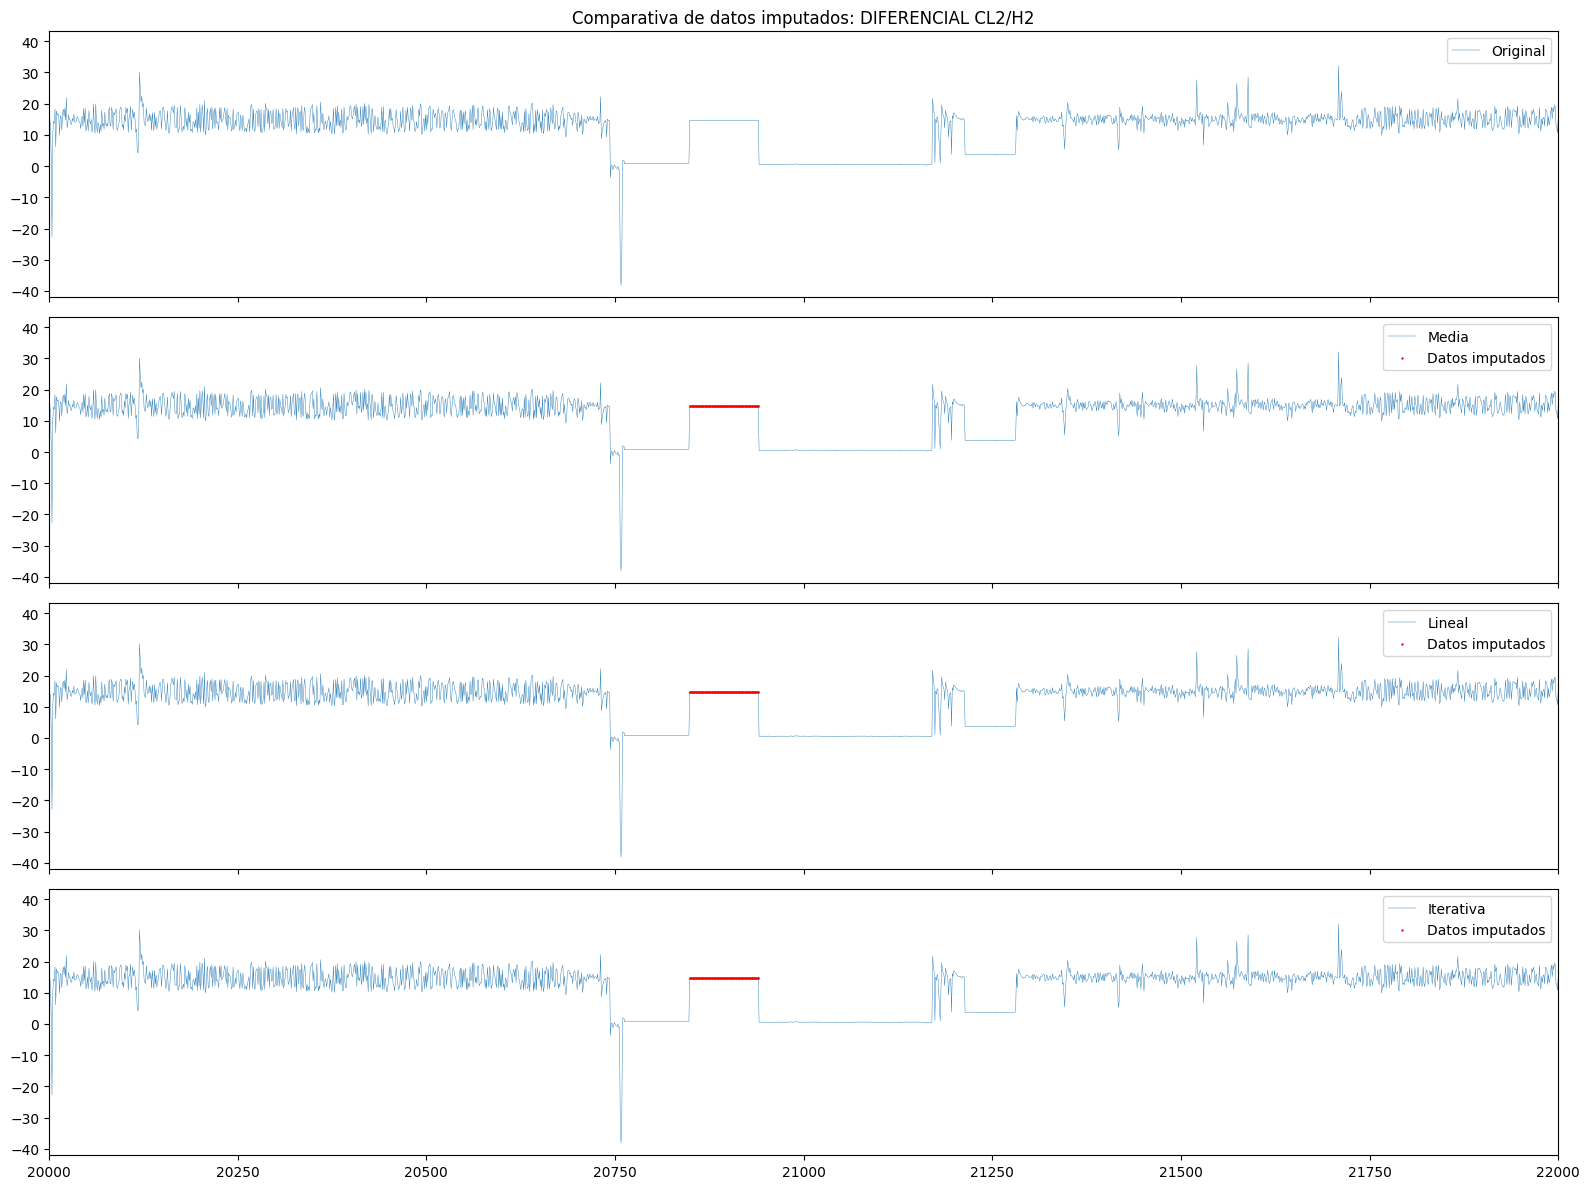

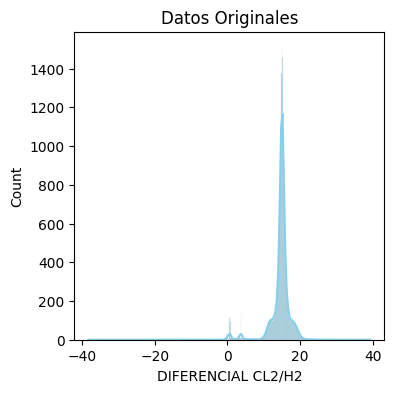

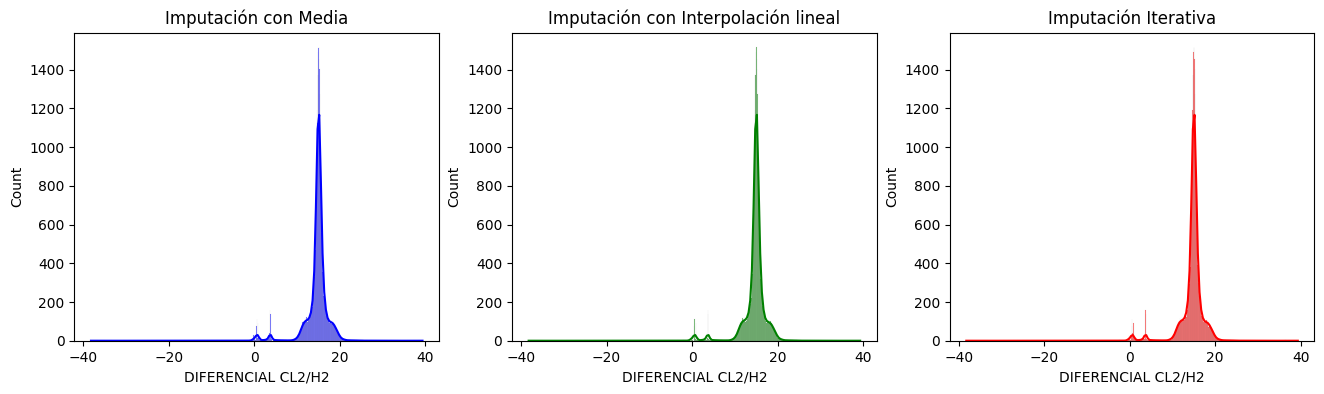

In [7]:
def is_numeric(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def imputacion(data, column):
    # Filtrar por la columna de interés
    data = data[[column]].copy()

    # Identificar valores no numéricos
    non_numeric_mask = data[column].apply(lambda x: not is_numeric(x))

    # Convertir a numérico y mantener los valores no numéricos como NaN
    data_numeric = pd.to_numeric(data[column], errors='coerce')

    # Imputación usando la media
    imp_1 = data_numeric.fillna(data_numeric.mean())

    # Imputación usando interpolación lineal
    imp_2 = data_numeric.interpolate(method='linear')

    # Imputación iterativa
    imp_iter = data_numeric.to_frame()  # Mantener NaN para la imputación
    imputer = IterativeImputer(max_iter=10, random_state=0)
    imputed_data = imputer.fit_transform(imp_iter)
    imp_3 = pd.DataFrame(imputed_data, columns=imp_iter.columns).set_index(data.index)[column]

    # Devolver todas las imputaciones y la máscara de no numéricos
    return [imp_1, imp_2, imp_3, column, non_numeric_mask]

# Realizar la imputación para la columna de interés
imputacion_prod = imputacion(train_imp, 'DIFERENCIAL CL2/H2')

# Función de visualización
def viz_imp(lista_imp):

    fig, axs = plt.subplots(4, 1, figsize=(16, 12), sharex=True)
    axs[0].plot(train_imp[lista_imp[3]], '-', linewidth=0.3, label='Original')
    titulo = 'Comparativa de datos imputados: ' + lista_imp[3]
    axs[0].set_title(titulo)
    axs[0].legend()

    # Identificar índices con valores no numéricos
    non_numeric_indices = train_cp[lista_imp[3]].apply(lambda x: not is_numeric(x))

    axs[1].plot(lista_imp[0], '-', linewidth=0.3, label="Media")
    axs[1].scatter(lista_imp[0].index[non_numeric_indices], lista_imp[0][non_numeric_indices],
                   color='red', label='Datos imputados', zorder=5, s=0.5)
    axs[1].legend()

    axs[2].plot(lista_imp[1], '-', linewidth=0.3, label="Lineal")
    axs[2].scatter(lista_imp[1].index[non_numeric_indices], lista_imp[1][non_numeric_indices],
                   color='red', label='Datos imputados', zorder=5, s=0.5)
    axs[2].legend()

    axs[3].plot(lista_imp[2], '-', linewidth=0.3, label="Iterativa")
    axs[3].scatter(lista_imp[2].index[non_numeric_indices], lista_imp[2][non_numeric_indices],
                   color='red', label='Datos imputados', zorder=5, s=0.5)
    axs[3].legend()
    plt.xlim(20000,22000)
    plt.tight_layout()
    plt.show()

    # Visualización de distribuciones
    fig2, ax2 = plt.subplots(1, figsize=(4, 4))
    sns.histplot(data=train_imp[lista_imp[3]], color="skyblue", kde=True).set_title("Datos Originales")
    plt.show()

    fig3, ax3 = plt.subplots(1, 3, figsize=(16, 4))  # Ajuste a 3 métodos de imputación
    fig2.suptitle('Distribuciones de datos imputados')
    sns.histplot(ax=ax3[0], data=lista_imp[0], color="blue", kde=True)
    ax3[0].set_title("Imputación con Media")
    sns.histplot(ax=ax3[1], data=lista_imp[1], color="green", kde=True)
    ax3[1].set_title("Imputación con Interpolación lineal")
    sns.histplot(ax=ax3[2], data=lista_imp[2], color="red", kde=True)
    ax3[2].set_title("Imputación Iterativa")
    plt.show()

# Visualizar las imputaciones para 'Produccion soda kg/h'
viz_imp(imputacion_prod)

Se observa que la diferencia en los métodos de imputación es prácticamente nula, ya que los datos a imputar al parecer son de una fecha específica que pueden deberse a una caída de energía eléctrica o desconexión del servidor histórico. Por ello, se opta por la imputación iterativa y se valida que esté listo el dataset.

Verificación de valores no numéricos:

In [8]:
non_numeric_counts = {}
for column in train_imp.columns:
  if column != 'Fecha':  # Evitar modificar la columna "Fecha"
    non_numeric_count = train_imp[column].apply(lambda x: not is_numeric(x)).sum()
    non_numeric_counts[column] = non_numeric_count

for column, count in non_numeric_counts.items():
  print(f"{column:<25} {count}")

VOLTAJE CELDA 1           0
VOLTAJE CELDA 2           0
VOLTAJE CELDA 3           0
VOLTAJE CELDA 4           0
VOLTAJE CELDA 5           0
VOLTAJE CELDA 6           0
VOLTAJE CELDA 7           0
VOLTAJE CELDA 8           0
VOLTAJE CELDA 9           0
VOLTAJE CELDA 10          0
VOLTAJE CELDA 11          0
VOLTAJE CELDA 12          0
VOLTAJE CELDA 13          0
VOLTAJE CELDA 14          0
VOLTAJE CELDA 15          0
VOLTAJE CELDA 16          0
VOLTAJE CELDA 17          0
VOLTAJE CELDA 18          0
VOLTAJE CELDA 19          0
VOLTAJE CELDA 20          0
VOLTAJE CELDA 21          0
VOLTAJE CELDA 22          0
VOLTAJE CELDA 23          0
VOLTAJE CELDA 24          0
VOLTAJE CELDA 25          0
VOLTAJE CELDA 26          0
VOLTAJE CELDA 27          0
VOLTAJE CELDA 28          0
VOLTAJE CELDA 29          0
VOLTAJE CELDA 30          0
VOLTAJE CELDA 31          0
VOLTAJE CELDA 32          0
VOLTAJE CELDA 33          0
VOLTAJE CELDA 34          0
VOLTAJE CELDA 35          0
VOLTAJE CELDA 36    

In [9]:
# Convertir la columna "Fecha" a objetos datetime
train_imp['Fecha'] = pd.to_datetime(train_imp['Fecha'], errors='coerce')

La variable objetivo que se tomó como indicador de la eficiencia del proceso es "Produccion soda kg/h", que junto a "Densidad soda" nos da la cantidad neta de soda que se está produciendo sin considerar las fluctuaciones entre densidades. Con esto, se generará una columna llamada "Soda 100% kg/h". Para este cálculo, se asumirá que la soda está a 32°C (que es la temperatura promedio a la que esta corriente mide la densidad).

In [10]:
train_imp["Densidad soda"].describe()

count    39384.000000
mean      1343.803449
std         22.774452
min        779.851440
25%       1344.716888
50%       1345.330994
75%       1345.930054
max       1358.833618
Name: Densidad soda, dtype: float64

Se define una función de interpolación para convertir los valores de densidad en concentración:

In [11]:
from scipy.interpolate import interp1d

# Data de densidad y concentración a 32°C (NaOH)
density_values = [
    1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315,
    1.316, 1.317, 1.318, 1.319, 1.32, 1.321, 1.325, 1.33, 1.331, 1.332, 1.333, 1.334, 1.34, 1.342,
    1.344, 1.346, 1.348, 1.35, 1.352, 1.355, 1.36
]
concentration_values = [
    28.08712, 28.18182, 28.27652, 28.37121, 28.46591, 28.56061, 28.65530, 28.75000, 28.84470, 28.93939,
    29.03409, 29.12879, 29.22348, 29.31818, 29.41288, 29.50758, 29.60227, 29.69697, 29.79167, 29.88636,
    29.98106, 30.07576, 30.45455, 30.92803, 31.02273, 31.11742, 31.21212, 31.30682, 31.87500, 32.06673,
    32.26300, 32.45927, 32.65554, 32.85182, 33.04809, 33.34249, 33.83317
]

interpolation_function = interp1d(density_values, concentration_values, fill_value="extrapolate")

# Function to convert density to concentration using interpolation
def density_to_concentration(density):
    return interpolation_function(density)

In [12]:
train_imp['Concentración p/p %'] = train_imp['Densidad soda'].apply(density_to_concentration)
train_imp['Concentración p/p %'].head(10)

0    32.442783
1    32.432656
2    32.913081
3    32.264296
4    32.299947
5    32.515103
6    32.706456
7    32.240551
8    32.323818
9    32.866228
Name: Concentración p/p %, dtype: float64

In [13]:
factor_recirc = 0.83 # Para cuadrar la producción diaria real, influencia de recirculación en flujómetro másico
train_imp['Soda 100% kg/h'] = train_imp['Produccion soda kg/h'] * train_imp['Concentración p/p %'] * factor_recirc / 100
train_imp['Soda 100% kg/h'].head(10)

0    1018.726929
1    1017.819959
2     494.755136
3    1014.126851
4    1014.660532
5     850.951773
6     725.661006
7    1013.506807
8    1015.085479
9     500.605680
Name: Soda 100% kg/h, dtype: float64

Estos valores tienen sentido de acuerdo con la producción máxima del electrolizador. Se calcula también la producción teórica máxima que puede tener el equipo con la data de amperaje y número de celdas:

In [14]:
eff = 96 # %
train_imp["NaOH teorica 100% kg/h"] = 1.492 * train_imp["AMPS"] * 44 * eff * (10**(-8)) * 1000
train_imp["Diferencia prod %"] = (train_imp["Soda 100% kg/h"] - train_imp["NaOH teorica 100% kg/h"]) / train_imp["NaOH teorica 100% kg/h"] * 100
train_imp[['Produccion soda kg/h','Soda 100% kg/h', "NaOH teorica 100% kg/h", "Diferencia prod %"]].head(15)

Produccion soda kg/h  Soda 100% kg/h  NaOH teorica 100% kg/h  \
0            3783.219971     1018.726929             1005.775652   
1            3781.031982     1017.819959             1005.654101   
2            1811.105225      494.755136             1003.721465   
3            3786.971191     1014.126851             1005.703645   
4            3784.781982     1014.660532             1004.465482   
5            3153.128906      850.951773             1004.934394   
6            2673.143066      725.661006             1006.248503   
7            3787.443115     1013.506807             1005.232764   
8            3783.570801     1015.085479             1005.382934   
9            1835.134155      500.605680             1005.503131   
10           3790.667236     1015.664738             1005.776452   
11           3786.387451     1014.588136             1005.555137   
12           3730.727539     1002.673729             1002.713973   
13           1648.903687      450.867414             1004.391198   
14           3790.197998     1014.723313             1004.936425   

    Diferencia prod %  
0            1.287690  
1            1.209746  
2          -50.707925  
3            0.837544  
4            1.014973  
5          -15.322654  
6          -27.884513  
7            0.823097  
8            0.965060  
9          -50.213414  
10           0.983149  
11           0.898310  
12          -0.004013  
13         -55.110378  
14           0.973881

Para este caso, solamente se utiliza la columna teórica como validación de que los datos de producción calculados en estos últimos pasos son correctos. Para el aprendizaje automático se considerará la variable "Soda 100% kg/h" como independiente u objetivo.

In [15]:
columns_to_drop = ["Concentración p/p %", "NaOH teorica 100% kg/h", "Produccion soda kg/h", "Densidad soda", 'Diferencia prod %']
train_imp.drop(columns=columns_to_drop, inplace=True)

---
# EDA
---

Se definen los significados de las variables:

In [16]:
# Definir las variables y sus descripciones
data = {
    "Variable": [
        "VOLTAJE CELDA 1 - CELDA 44", "DIFERENCIAL CL2/H2", "AMPS", "Conc. Cat. Sal.",
        "Densidad Sulf", "T. Sal. K401", "P. Sniff 404", "ph Hipo", "Apertura soda hipo",
        "Cond. AD", "Presión aire 11bar", "Temperatura AlfaL salm", "Presión Cl2",
        "Presión H2", "PV401A, PV401B, PV402A", "Temp in Cat", "Temp in Salm",
        "Temp out Cat", "Temp out Sal", "Flujo Salm in", "Flujo Cat in", "Densidad soda",
        "Flujo dia masico", "Producción soda kg/h", "Aspirador hipo", "Temp. Sulf",
        "Temp. AH", "Concentración p/p %", "Soda 100% kg/h", "NaOH Teórico 100% kg/h"
    ],
    "Descripción": [
        "Voltaje en cada celda del electrolizador.",
        "Diferencial de presión Cloro/Hidrógeno en los cabezales de presión de salida del electrolizador.",
        "Corriente que atraviesa las celdas, en amperios.",
        "Concentración de catolito de salida del electrolizador (NaOH).",
        "Densidad del ácido sulfúrico en la unidad de secado de cloro.",
        "Temperatura de la salida del gas en el blower que envía cloro hacia la unidad de licuefacción de cloro.",
        "Presión de gas cloro no licuado a la salida del licuefactor de cloro, que va hacia la unidad de producción de hipoclorito de sodio.",
        "pH del hipoclorito de sodio producido.",
        "Apertura de la entrada de NaOH para la producción de hipoclorito.",
        "Conductividad de agua desmineralizada utilizada en el proceso de dilución de NaOH y otros procesos.",
        "Presión del aire de la tubería regulada a 11 bar, que alimenta varios procesos de planta.",
        "Temperatura de la salida del intercambiador de calor vapor/salmuera marca Alfa Laval, que calienta la salmuera de alimentación al electrolizador.",
        "Presión del Cloro de salida del electrolizador, que debería mantenerse alrededor de 170 mbar.",
        "Presión del Hidrógeno de salida del electrolizador, que debería mantenerse alrededor de 185 mbar.",
        "Válvulas de control de presión de cloro hacia las distintas unidades de proceso de cloro.",
        "Temperatura de entrada de catolito (NaOH) al electrolizador. Debe mantenerse en 78°C.",
        "Temperatura de entrada de salmuera al electrolizador. Debe mantenerse en 78°C.",
        "Temperatura de salida de catolito (NaOH) del electrolizador. Debe mantenerse en 88°C.",
        "Temperatura de salida de salmuera del electrolizador. Debe mantenerse en 88°C.",
        "Flujo de salmuera de entrada al electrolizador en m3/h. Se regula según la corriente del electrolizador.",
        "Flujo de catolito de entrada al electrolizador en m3/h. Se regula según la corriente del electrolizador.",
        "Densidad de NaOH de salida del electrolizador.",
        "Totalizador de kg/día totales de producción de NaOH.",
        "Producción de NaOH 32% en kg por hora. Indicador de la eficiencia de la planta.",
        "Presión de aspiración del blower que aspira cloro gas a la unidad de hipoclorito de sodio.",
        "Temperatura del ácido sulfúrico en la unidad de secado de cloro.",
        "Temperatura de Agua Helada en el circuito de agua helada (agua enfriamiento a < 10 °C).",
        "Concentración másica de la soda NaOH en % p/p.",
        "Variable objetivo pero en porcentaje NaOH 100%.",
        "Producción teórica de NaOH al 100%, calculada según ecuaciones de diseño del electrolizador."
    ]
}

# Crear el DataFrame
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'left')
variables_df = pd.DataFrame(data)
variables_df.head(29)

Variable                     \
0   VOLTAJE CELDA 1 - CELDA 44   
1           DIFERENCIAL CL2/H2   
2                         AMPS   
3              Conc. Cat. Sal.   
4                Densidad Sulf   
5                 T. Sal. K401   
6                 P. Sniff 404   
7                      ph Hipo   
8           Apertura soda hipo   
9                     Cond. AD   
10          Presión aire 11bar   
11      Temperatura AlfaL salm   
12                 Presión Cl2   
13                  Presión H2   
14      PV401A, PV401B, PV402A   
15                 Temp in Cat   
16                Temp in Salm   
17                Temp out Cat   
18                Temp out Sal   
19               Flujo Salm in   
20                Flujo Cat in   
21               Densidad soda   
22            Flujo dia masico   
23        Producción soda kg/h   
24              Aspirador hipo   
25                  Temp. Sulf   
26                    Temp. AH   
27         Concentración p/p %   
28              Soda 100% kg/h   

   Descripción                                                                                                                                         
0                                                                                                           Voltaje en cada celda del electrolizador.  
1                                                    Diferencial de presión Cloro/Hidrógeno en los cabezales de presión de salida del electrolizador.  
2                                                                                                    Corriente que atraviesa las celdas, en amperios.  
3                                                                                      Concentración de catolito de salida del electrolizador (NaOH).  
4                                                                                       Densidad del ácido sulfúrico en la unidad de secado de cloro.  
5                                             Temperatura de la salida del gas en el blower que envía cloro hacia la unidad de licuefacción de cloro.  
6                 Presión de gas cloro no licuado a la salida del licuefactor de cloro, que va hacia la unidad de producción de hipoclorito de sodio.  
7                                                                                                              pH del hipoclorito de sodio producido.  
8                                                                                   Apertura de la entrada de NaOH para la producción de hipoclorito.  
9                                                 Conductividad de agua desmineralizada utilizada en el proceso de dilución de NaOH y otros procesos.  
10                                                          Presión del aire de la tubería regulada a 11 bar, que alimenta varios procesos de planta.  
11  Temperatura de la salida del intercambiador de calor vapor/salmuera marca Alfa Laval, que calienta la salmuera de alimentación al electrolizador.  
12                                                      Presión del Cloro de salida del electrolizador, que debería mantenerse alrededor de 170 mbar.  
13                                                  Presión del Hidrógeno de salida del electrolizador, que debería mantenerse alrededor de 185 mbar.  
14                                                          Válvulas de control de presión de cloro hacia las distintas unidades de proceso de cloro.  
15                                                              Temperatura de entrada de catolito (NaOH) al electrolizador. Debe mantenerse en 78°C.  
16                                                                     Temperatura de entrada de salmuera al electrolizador. Debe mantenerse en 78°C.  
17                                                              Temperatura de salida de catolito (NaOH) del electrolizador. Debe mantenerse en 88°C.  
18                                                                     Temperatura de salida d

Se eliminarán del análisis las columnas: "Concentración p/p %", "NaOH teorica 100% kg/h", "Produccion soda kg/h" para evitar redundancias, ya que la variable objetivo es un subproducto de estas columnas.

In [17]:
# Establecer "Fecha" como el índice del DataFrame
train_imp.set_index('Fecha', inplace=True)

# Verificar que "Fecha" es ahora el índice
train_imp.head()

VOLTAJE CELDA 1  VOLTAJE CELDA 2  VOLTAJE CELDA 3  \
Fecha                                                                    
2023-01-01 00:00:00  3242.500977      3274.0           3328.001953       
2023-01-01 00:20:00  3243.000000      3273.0           3330.000000       
2023-01-01 00:40:00  3240.000977      3271.0           3327.000977       
2023-01-01 01:00:00  3241.000000      3271.0           3327.000000       
2023-01-01 01:20:00  3242.000000      3273.0           3329.000000       

                     VOLTAJE CELDA 4  VOLTAJE CELDA 5  VOLTAJE CELDA 6  \
Fecha                                                                    
2023-01-01 00:00:00  3300.500977      3295.500977      3294.500977       
2023-01-01 00:20:00  3302.000000      3296.000000      3294.000000       
2023-01-01 00:40:00  3298.001953      3293.000977      3292.000977       
2023-01-01 01:00:00  3298.000000      3293.000000      3291.000000       
2023-01-01 01:20:00  3300.000000      3296.000000      3294.000000       

                     VOLTAJE CELDA 7  VOLTAJE CELDA 8  VOLTAJE CELDA 9  \
Fecha                                                                    
2023-01-01 00:00:00  3301.500977      3234.001953      3305.500977       
2023-01-01 00:20:00  3302.000000      3236.000000      3306.000000       
2023-01-01 00:40:00  3299.001953      3233.000977      3303.000977       
2023-01-01 01:00:00  3300.000000      3233.000000      3303.000000       
2023-01-01 01:20:00  3301.750732      3236.000000      3305.501465       

                     VOLTAJE CELDA 10  ...  Temp in Salm  Temp out Cat  \
Fecha                                  ...                               
2023-01-01 00:00:00  3251.500977       ...  66.954384     88.273987      
2023-01-01 00:20:00  3252.000000       ...  66.937538     88.268272      
2023-01-01 00:40:00  3249.001953       ...  67.054970     88.258537      
2023-01-01 01:00:00  3250.000000       ...  67.040314     88.186050      
2023-01-01 01:20:00  3251.501465       ...  67.041222     88.208992      

                     Temp out Sal  Flujo Salm in  Flujo Cat in  \
Fecha                                                            
2023-01-01 00:00:00  86.949524     10.780000      10.662333      
2023-01-01 00:20:00  86.934608     10.790000      10.670000      
2023-01-01 00:40:00  86.943832     10.780000      10.851331      
2023-01-01 01:00:00  86.869926     10.789666      10.700000      
2023-01-01 01:20:00  86.893188     10.790000      10.666334      

                     Flujo dia masico  Aspirador hipo  Temp. Sulf  Temp. AH  \
Fecha                                                                         
2023-01-01 00:00:00  51566.160156     -9.387287        15.213566   8.372449   
2023-01-01 00:20:00  52829.125000     -9.400275        15.136943   8.342432   
2023-01-01 00:40:00  53792.917969     -8.417500        15.162076   8.343296   
2023-01-01 01:00:00  54735.746094     -8.459558        15.059266   8.265951   
2023-01-01 01:20:00  55997.289062     -8.065949        15.082098   8.242157   

                     Soda 100% kg/h  
Fecha                                
2023-01-01 00:00:00  1018.726929     
2023-01-01 00:20:00  1017.819959     
2023-01-01 00:40:00   494.755136     
2023-01-01 01:00:00  1014.126851     
2023-01-01 01:20:00  1014.660532     

[5 rows x 71 columns]

## Histogramas para visualizar las distribuciones de las variables

Formato de charts:

In [18]:
!pip install SciencePlots
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
import scienceplots
plt.style.use('default')
plt.style.use('science')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

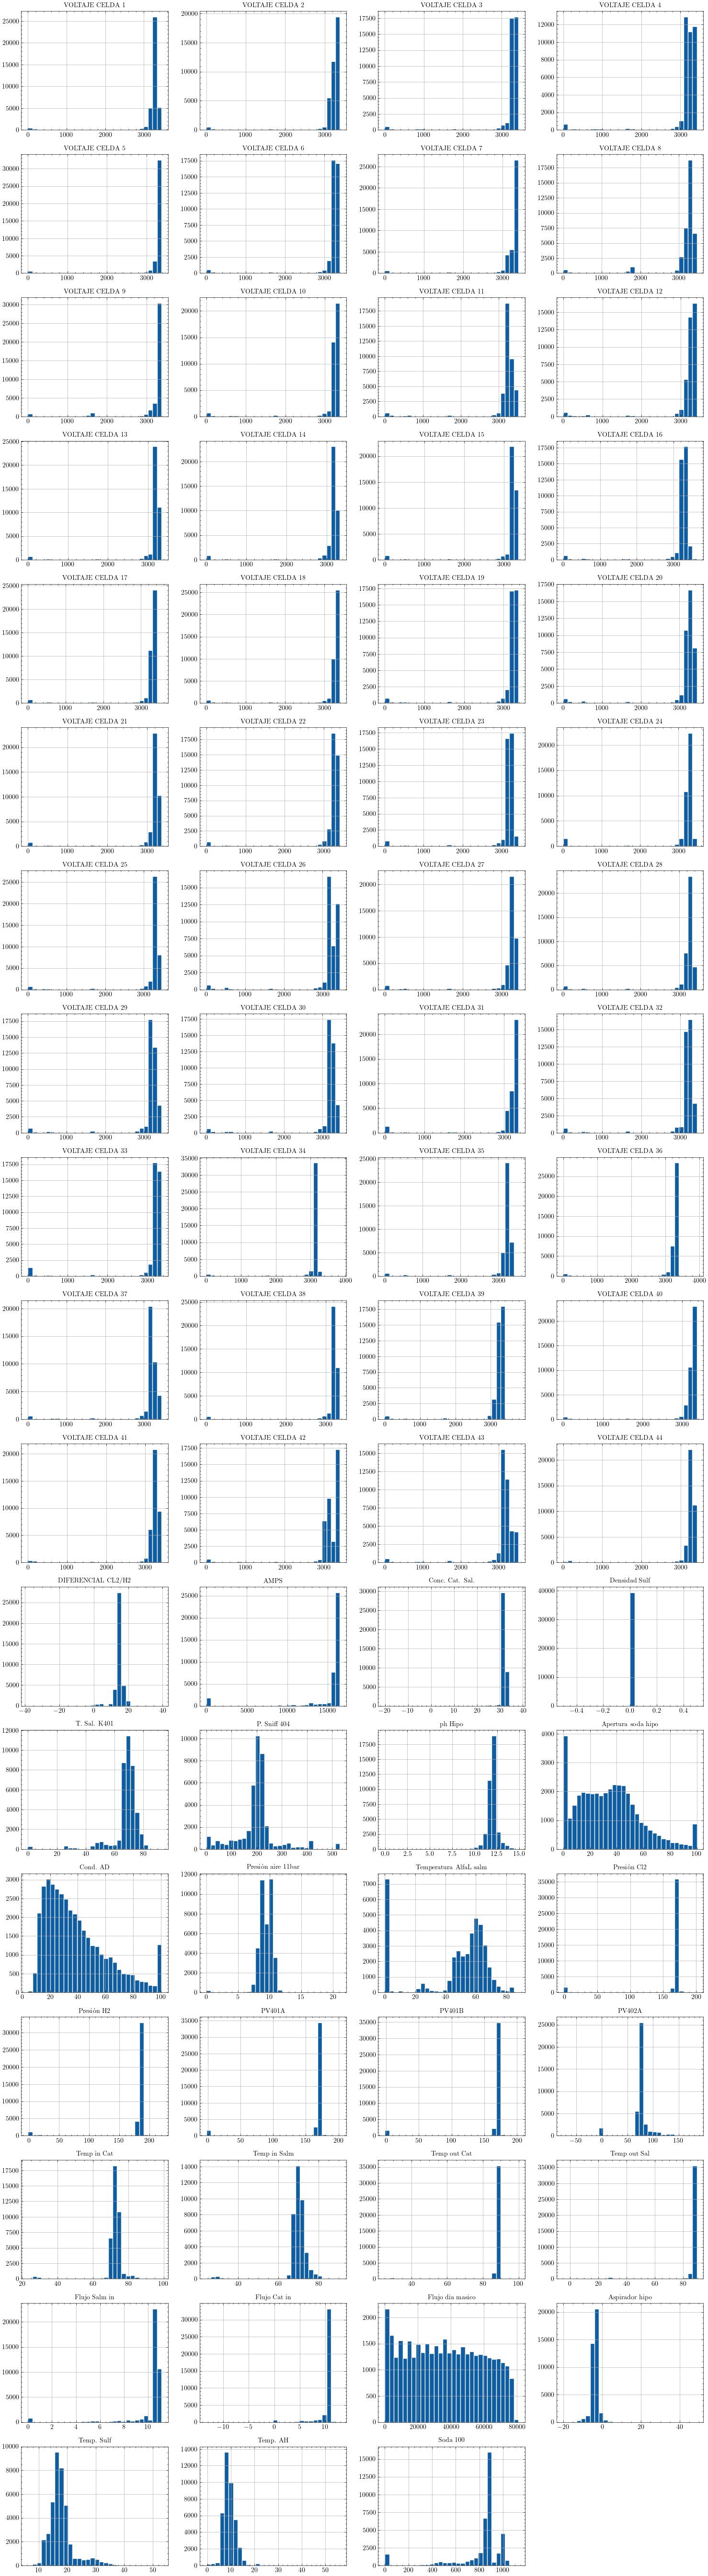

In [19]:
num_columns = 4  # Número de columnas por fila en los subplots
num_rows = len(train_imp.columns) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(train_imp.columns):
  if col != 'Fecha':
    ax = axes[i]
    train_imp[col].hist(bins=30, ax=ax, edgecolor='white')
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Viendo la distribución de las variables, se resaltan las conclusiones más importantes:

**VOLTAJE CELDA 1 a VOLTAJE CELDA 44:** La mayoría de las celdas tienen distribuciones de voltaje similares, con algunas presentando más variación que otras. No se observan variaciones significativas entre las celdas, lo cual sugiere una operación estable y uniforme de las celdas en términos de voltaje.

**DIFERENCIAL CL2/H2:**
La variable presenta una distribución sesgada a la izquierda, con la mayoría de los valores concentrados en la parte baja del rango. Esto podría indicar que, en la mayoría de los casos, el diferencial entre Cl2 y H2 es bajo, que indica una buena operación de la planta al mantener el balance de presiones en las membranas de electrólisis.

**AMPS:**
La distribución de la corriente muestra una tendencia muy concentrada en valores altos, lo que refleja una operación consistente de corriente que atraviesa las celdas. Se ve una concentración menor de datos en 0, simbolizando las paradas de planta durante el tiempo de la toma de los datos.

**Conc. Cat. Sal.:**
La concentración de catolito de salida muestra una distribución casi normal con una ligera asimetría hacia la izquierda, lo que sugiere que los valores de concentración suelen estar en un rango estrecho y estable.

**Densidad Sulf:**
La distribución muestra que prácticamente no hay variación en los datos, por lo que quizá no sea una variable muy significativa para el análisis.

**Temperatura AlfaL salm:**
La temperatura en AlfaL salmuera tiene una gran proporción de ceros, lo que podría indicar que el sensor que toma este dato tuvo algún problema durante un tiempo prolongado o está fallando. Se tendrá esto en consideración para el análisis.

**PV401A, PV401B, PV402A:**
Estas variables presentan distribuciones concentradas en valores bajos, sugiriendo que estas válvulas suelen estar cerradas o abiertas en pequeños incrementos, lo cual podría reflejar una operación que requiere ajustes mínimos de flujo.

**Temp in Cat, Temp in Salm, Temp out Cat, Temp out Sal:**
Las temperaturas de entrada y salida en catolito y salmuera muestran distribuciones estrechas y concentradas en un rango pequeño, debido al control estricto de la temperatura en estos puntos críticos del proceso. Se observa que las temperaturas de entrada tienen mucha más variabilidad que las de salida.

**Flujo Salm in, Flujo Cat in:**
Ambos flujos muestran distribuciones concentradas con valores estables, lo que sugiere un control consistente del flujo de salmuera y cátodo en la operación.

**Soda 100% kg/h:**
La variable objetivo muestra una distribución bimodal, lo que podría sugerir diferentes modos de operación o cambios en las condiciones del proceso que afectan la producción de soda al 100%.

## Correlación lineal entre variables

Analizar la matriz de correlación lineal ayudará a identificar variables que están altamente correlacionadas con la variable objetivo ("Soda 100% kg/h") y entre sí. Este paso ayudará en la selección de características, ya que con esto se puede reducir la dimensionalidad del modelo.

Soda 100% kg/h
Soda 100% kg/h          1.000000      
AMPS                    0.793375      
PV401B                  0.757225      
Presión Cl2             0.757132      
PV401A                  0.756945      
Presión H2              0.755158      
VOLTAJE CELDA 19        0.729781      
VOLTAJE CELDA 17        0.728435      
VOLTAJE CELDA 25        0.728062      
VOLTAJE CELDA 18        0.727652      
VOLTAJE CELDA 41        0.727643      
VOLTAJE CELDA 6         0.727032      
VOLTAJE CELDA 22        0.726431      
VOLTAJE CELDA 28        0.726219      
VOLTAJE CELDA 5         0.726003      
VOLTAJE CELDA 7         0.724877      
VOLTAJE CELDA 40        0.723780      
VOLTAJE CELDA 15        0.723697      
VOLTAJE CELDA 23        0.723321      
VOLTAJE CELDA 10        0.723292      
VOLTAJE CELDA 12        0.723249      
VOLTAJE CELDA 20        0.722881      
VOLTAJE CELDA 11        0.722879      
VOLTAJE CELDA 16        0.722779      
VOLTAJE CELDA 2         0.722109      
VOLTAJE CELDA 27        0.721723      
VOLTAJE CELDA 32        0.721686      
VOLTAJE CELDA 21        0.721478      
VOLTAJE CELDA 44        0.721168      
VOLTAJE CELDA 29        0.720943      
Flujo Salm in           0.720316      
VOLTAJE CELDA 13        0.720301      
VOLTAJE CELDA 30        0.719500      
VOLTAJE CELDA 14        0.719341      
VOLTAJE CELDA 26        0.718575      
VOLTAJE CELDA 1         0.718223      
VOLTAJE CELDA 3         0.716178      
VOLTAJE CELDA 4         0.713314      
VOLTAJE CELDA 43        0.702533      
VOLTAJE CELDA 36        0.701854      
VOLTAJE CELDA 35        0.699739      
VOLTAJE CELDA 39        0.699421      
VOLTAJE CELDA 38        0.698630      
VOLTAJE CELDA 42        0.698043      
VOLTAJE CELDA 34        0.697372      
VOLTAJE CELDA 37        0.691898      
Flujo Cat in            0.680128      
VOLTAJE CELDA 8         0.657558      
VOLTAJE CELDA 9         0.648505      
VOLTAJE CELDA 24        0.615578      
VOLTAJE CELDA 31        0.608167      
Temp out Cat            0.604445      
Temp out Sal            0.603311      
VOLTAJE CELDA 33        0.582712      
DIFERENCIAL CL2/H2      0.474950      
PV402A                  0.426020      
T. Sal. K401            0.409663      
Temp in Cat             0.350189      
Temp in Salm            0.301108      
Conc. Cat. Sal.         0.260811      
Presión aire 11bar      0.231997      
Flujo dia masico        0.209163      
Apertura soda hipo      0.177657      
Temperatura AlfaL salm  0.136981      
Temp. AH                0.026061      
Cond. AD               -0.000041      
P. Sniff 404           -0.024533      
ph Hipo                -0.097470      
Aspirador hipo         -0.106211      
Temp. Sulf             -0.288234      
Densidad Sulf                NaN

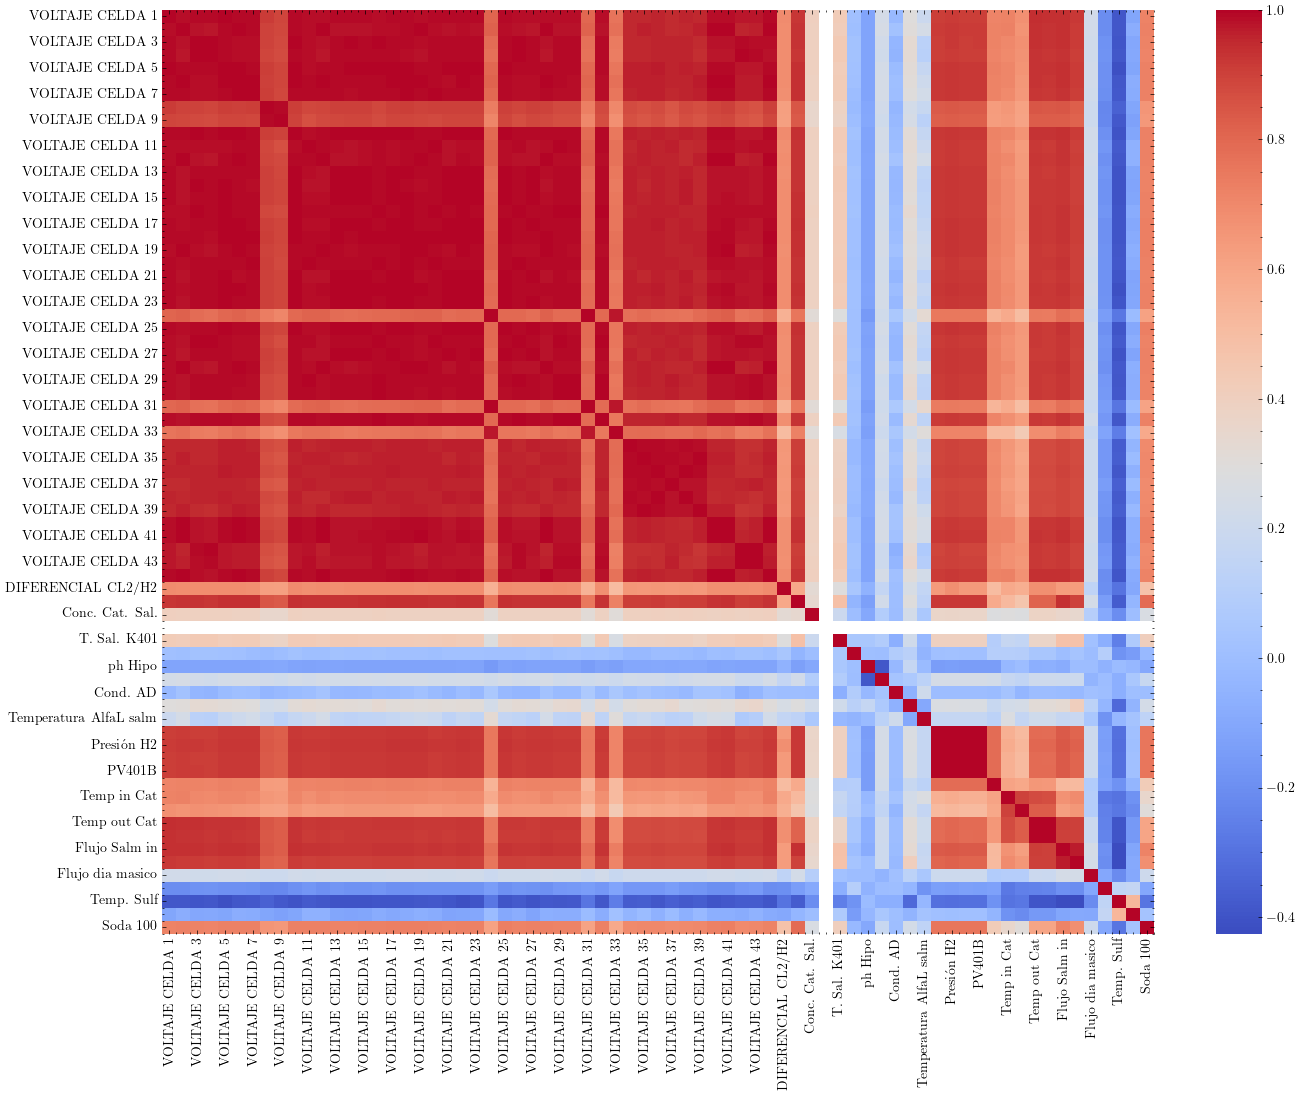

In [20]:
# Matriz de correlación
corr_matrix = train_imp.corr()

# Correlación con la variable objetivo
target_corr = corr_matrix["Soda 100% kg/h"].sort_values(ascending=False)
display(pd.DataFrame(target_corr))

# Visualización de la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.show()

### Resultados de matriz de correlación

**Alta correlación con la variable objetivo:**

* AMPS: Esta variable sigue mostrando una fuerte correlación positiva (~ 0.793) con "Soda 100% kg/h". Esto sugiere que la corriente a través de las celdas es un factor crítico en la eficiencia de la producción.

* Presión Cl2 y Presión H2: Ambas variables siguen siendo importantes, con correlaciones alrededor de ~ 0.755, lo que indica que mantener las presiones de salida adecuadas es crucial para la eficiencia.

* PV401A, PV401B: Las válvulas de control de presión también tienen una correlación alta (~ 0.756), lo que indica su papel importante en la regulación del proceso.


**Correlación de los Voltajes de las Celdas:**

Los voltajes de las celdas (CELDA 1 - CELDA 44) muestran correlaciones altas (~ 0.7) con "Soda 100% kg/h". Esto confirma la interrelación entre los voltajes de las celdas y la eficiencia del proceso de producción.


**Flujos de Salmuera y Catolito:**
* Flujo Salm in y Flujo Cat in: Estas variables tienen correlaciones moderadas (~ 0.72 y ~ 0.68 respectivamente) con la variable objetivo, lo que refuerza la importancia del control de los flujos en la optimización de la producción.

**Temperaturas de Salmuera y Catolito:**
* Temp out Cat y Temp out Sal: Estas variables tienen correlaciones moderadas (~ 0.60), lo que sugiere que las temperaturas de salida juegan un rol significativo pero no dominante en la eficiencia.

**Variables con Correlación Moderada a Baja:**
* DIFERENCIAL CL2/H2: La correlación sigue siendo moderada (~ 0.47), indicando que el diferencial de presión tiene relevancia en la eficiencia, pero no es el factor más importante.
* Temperatura AlfaL salm, Temp in Cat, Temp in Salm: Estas variables muestran correlaciones bajas (~0.3 a 0.4), lo que indica que no son determinantes clave en la eficiencia.

**Baja Correlación o Correlación Negativa:**
* Cond. AD, Temp. AH, P. Sniff 404, ph Hipo: Estas variables continúan mostrando una correlación baja o incluso negativa, lo que sugiere que no tienen un impacto significativo en la producción de soda al 100%.
* Apertura soda hipo, Aspirador hipo: También muestran baja correlación, lo que indica que estos parámetros no son determinantes en la producción.
* Temp. Sulf: La correlación negativa (~-0.288) podría indicar que un aumento en la temperatura del ácido sulfúrico está asociado con una reducción en la eficiencia de producción.

Que la correlación lineal sea baja, no quiere siempre decir que no sean importantes. Se evaluará la importancia más adelante mediante técnicas de selección de variables.

In [21]:
selected_data = train_imp

## Detección de outliers

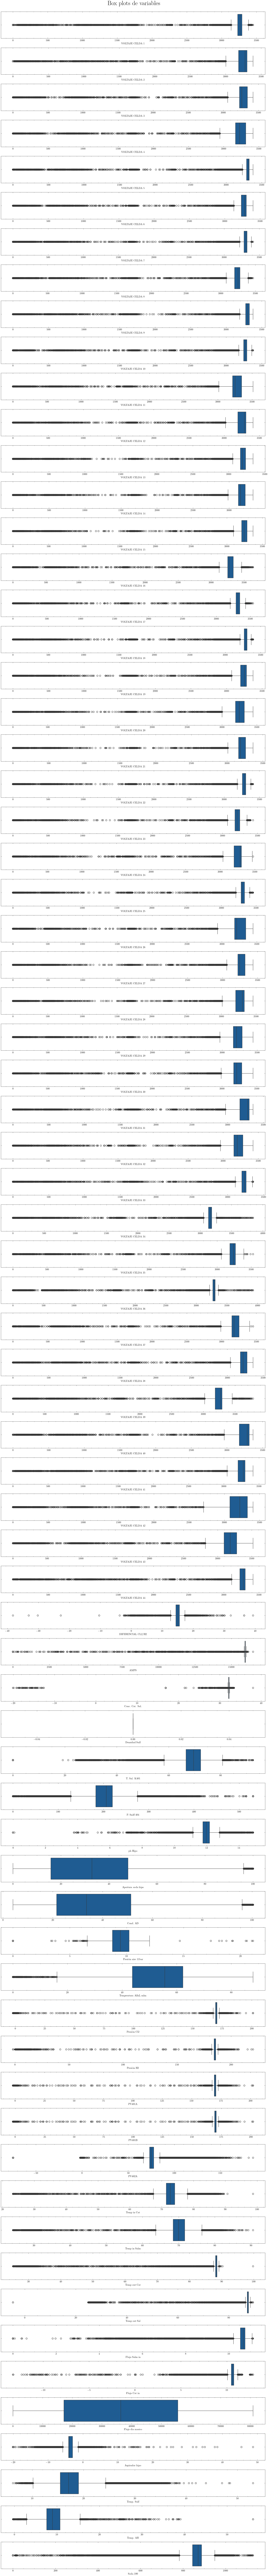

In [22]:
# Box plots
# Determinar cuántos subplots se graficarán según las columnas del df
num_columns = len(selected_data.columns)

# Crear una figura grande para contener todos los boxplots
plt.figure(figsize=(15, num_columns * 2))

# Título general para todos los boxplots
plt.suptitle("Box plots de variables", fontsize=24, y=1)

# Generar un boxplot para cada columna, colocándolos en su propio subplot
for index, columna in enumerate(selected_data.columns):
  plt.subplot(num_columns, 1, index + 1)  # Añadir subplots en una sola columna
  sns.boxplot(data=selected_data, x=columna)

plt.tight_layout()  # Ajustar automáticamente los subplots para que encajen en la figura
plt.show()

A primera vista, pareciera que todas las variables tienen demasiados datos aberrantes. Recordemos las distribuciones de las variables: conociendo que cuando hay paradas de planta, los datos cambian radicalmente a cero o valores completamente lejanos a la operación normal de la planta, tendría sentido eliminar estos valores de "parada de planta". Los datos durante las paradas de planta suelen representar estados anómalos y no son representativos del rendimiento habitual del sistema, lo que podría distorsionar el análisis y los resultados del modelo predictivo.

In [23]:
# Umbral para considerar paradas de planta
shutdown_threshold = 13000 # AMPS

# Filtrar el dataset para mantener solo las condiciones de operación normales
filtered_data = selected_data[selected_data['AMPS'] > shutdown_threshold]

# Mostrar las primeras filas del dataset filtrado para verificar
filtered_data.head()

# Ver cuántos registros se eliminaron
print(f"Registros antes del filtrado: {len(selected_data)}")
print(f"Registros después del filtrado: {len(filtered_data)}")

Registros antes del filtrado: 39384
Registros después del filtrado: 35789


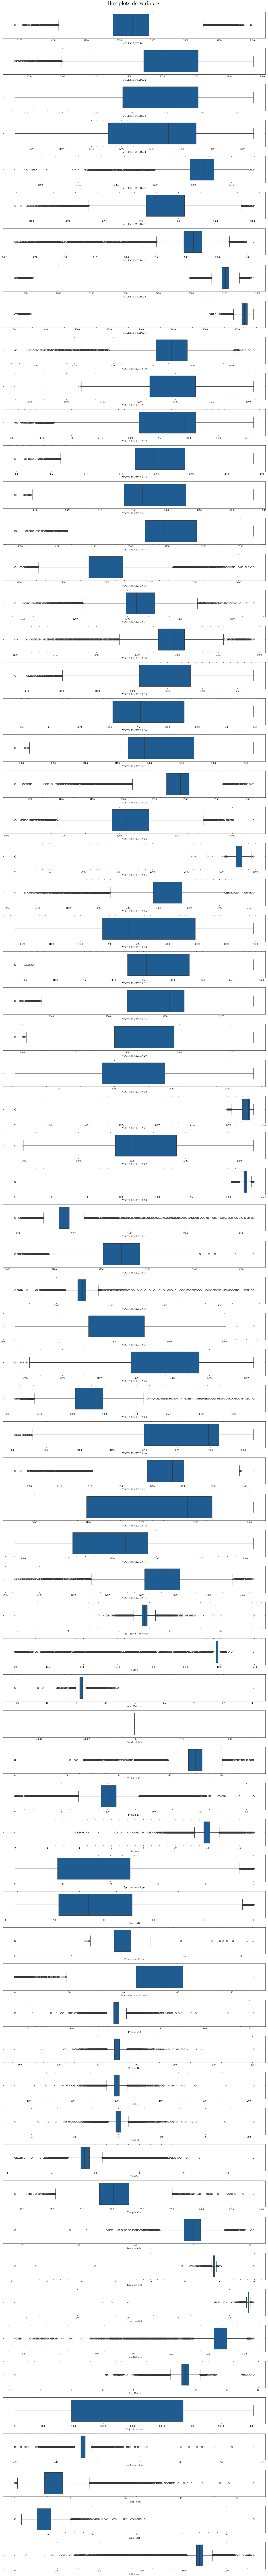

In [24]:
# Box plots
# Determinar cuántos subplots se graficarán según las columnas del df
num_columns = len(filtered_data.columns)

# Crear una figura grande para contener todos los boxplots
plt.figure(figsize=(15, num_columns * 2))

# Título general para todos los boxplots
plt.suptitle("Box plots de variables", fontsize=24, y=1)

# Generar un boxplot para cada columna, colocándolos en su propio subplot
for index, columna in enumerate(filtered_data.columns):
  plt.subplot(num_columns, 1, index + 1)  # Añadir subplots en una sola columna
  sns.boxplot(data=filtered_data, x=columna)

plt.tight_layout()  # Ajustar automáticamente los subplots para que encajen en la figura
plt.show()

Al tomar el umbral como 13000 amperios para considerar las paradas de planta, se ha reducido significativamente la cantidad de valores extremos en los boxplots.

La mayoría de las variables ahora muestran una distribución más concentrada y menos valores fuera del rango intercuartil, dando a entender que los datos ahora son más representativos de las condiciones normales de operación.

Algunas variables aún muestran outliers, lo cual es normal y se debe a variabilidad natural en el proceso o a eventos anómalos que no son necesariamente paradas de planta.

Para validar, se vuelven a revisar las distribuciones de las variables:

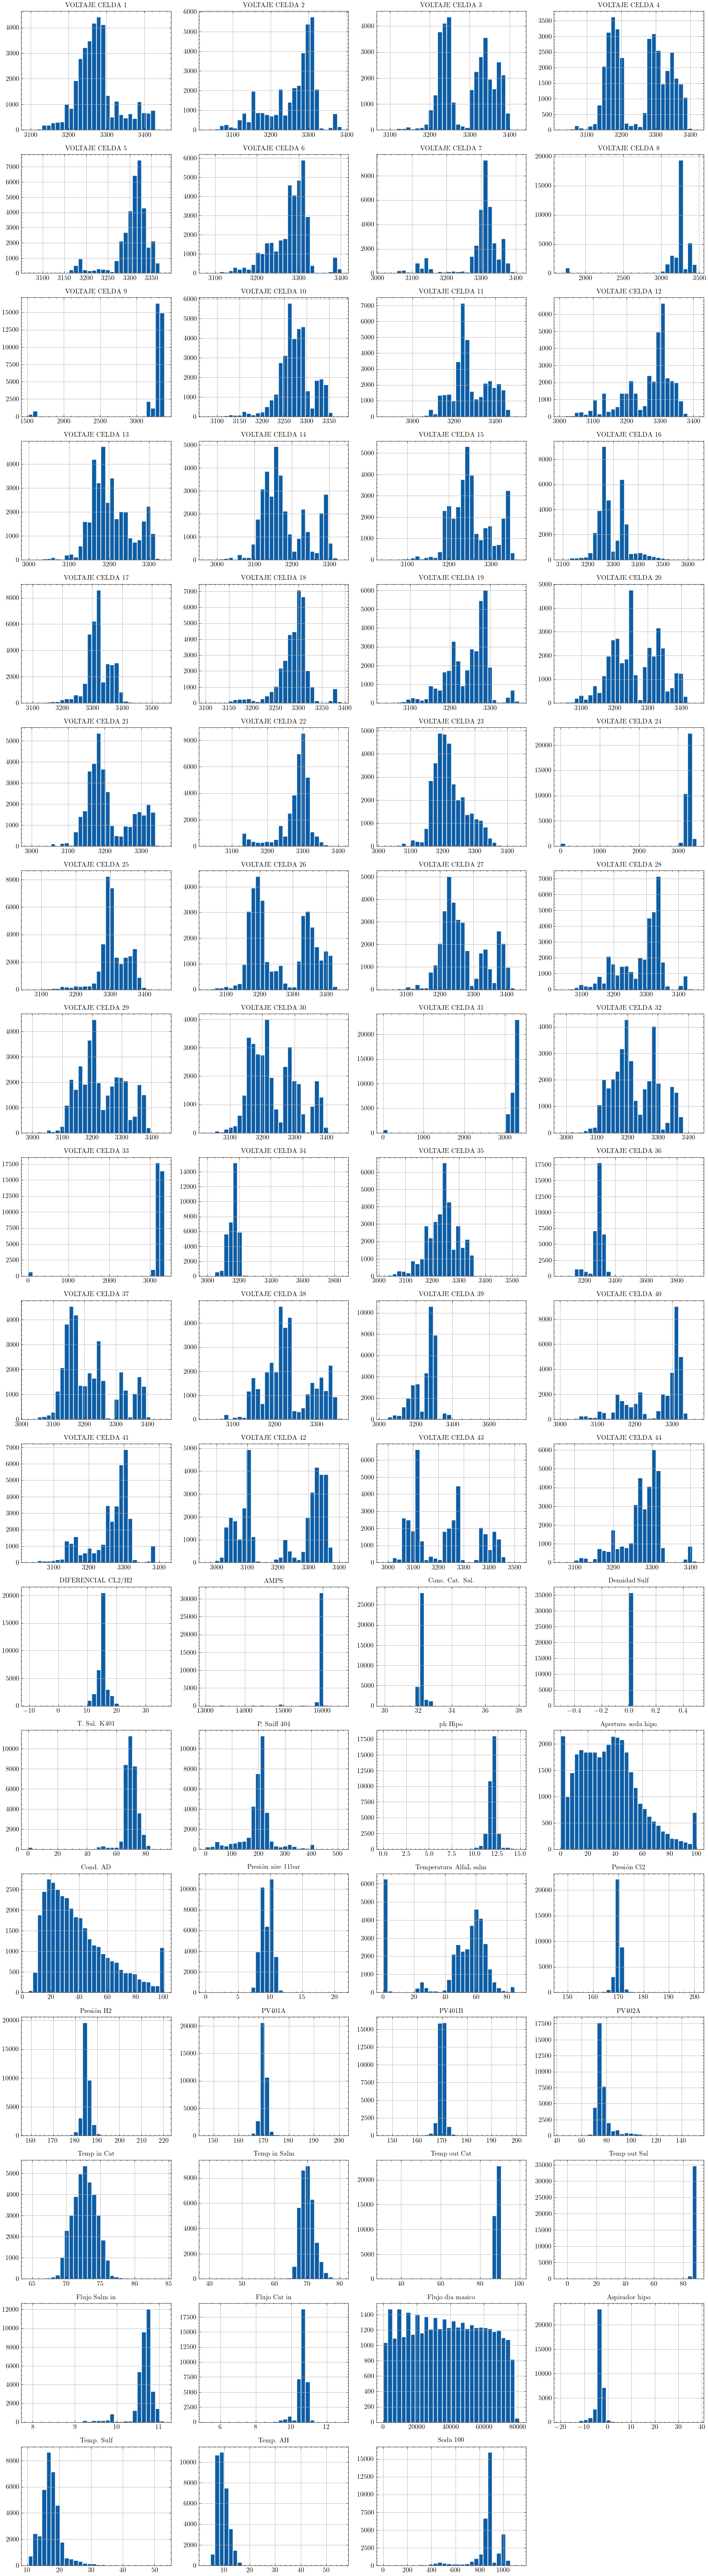

In [25]:
num_columns = 4  # Número de columnas por fila en los subplots
num_rows = len(filtered_data.columns) // num_columns + 1
plt.style.use('science')
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(filtered_data.columns):
    ax = axes[i]
    filtered_data[col].hist(bins=30, ax=ax, edgecolor='white')
    ax.set_title(col, fontsize=10)  # Reducir tamaño de letra en los títulos
    ax.set_xlabel('')
    ax.set_ylabel('')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se observa una proporción más normalizada en la mayoría de variables, y sobre todo ya no se ven valores cero en la variable objetivo. Se verifica la distribución normal de la variable objetivo:

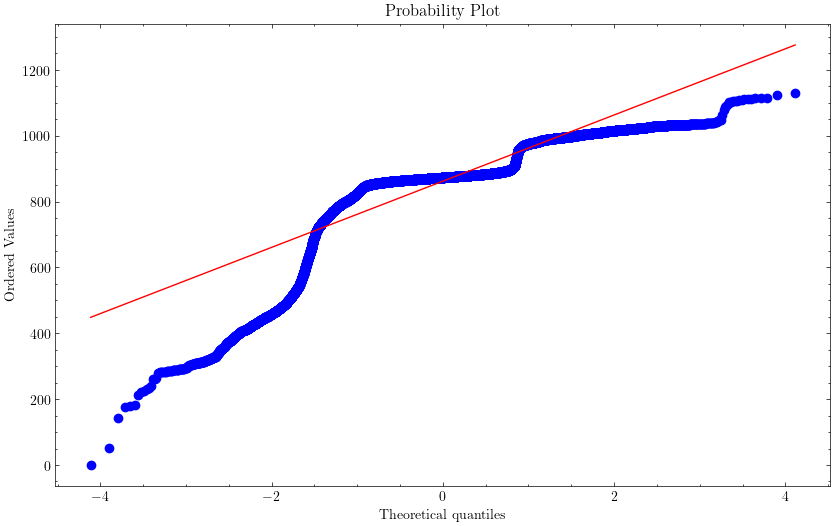

In [26]:
import scipy.stats as stats
plt.figure(figsize=(10, 6))
# Q-Q plot para la variable objetivo
stats.probplot(filtered_data['Soda 100% kg/h'], dist="norm", plot=plt)
plt.show()

Se evidencia una distribución no normal, visto también en el histograma con las colas de datos alejados de la media.

## Visualización de variables

In [27]:
# Reiniciar el índice y eliminar la columna 'Fecha'
filtered_data = filtered_data.reset_index(drop=True)

# Eliminar la columna 'Fecha' si aún está en el DataFrame
if "Fecha" in filtered_data.columns:
    filtered_data = filtered_data.drop(columns=["Fecha"])

# Verificar el resultado
filtered_data.head()

VOLTAJE CELDA 1  VOLTAJE CELDA 2  VOLTAJE CELDA 3  VOLTAJE CELDA 4  \
0  3242.500977      3274.0           3328.001953      3300.500977       
1  3243.000000      3273.0           3330.000000      3302.000000       
2  3240.000977      3271.0           3327.000977      3298.001953       
3  3241.000000      3271.0           3327.000000      3298.000000       
4  3242.000000      3273.0           3329.000000      3300.000000       

   VOLTAJE CELDA 5  VOLTAJE CELDA 6  VOLTAJE CELDA 7  VOLTAJE CELDA 8  \
0  3295.500977      3294.500977      3301.500977      3234.001953       
1  3296.000000      3294.000000      3302.000000      3236.000000       
2  3293.000977      3292.000977      3299.001953      3233.000977       
3  3293.000000      3291.000000      3300.000000      3233.000000       
4  3296.000000      3294.000000      3301.750732      3236.000000       

   VOLTAJE CELDA 9  VOLTAJE CELDA 10  ...  Temp in Salm  Temp out Cat  \
0  3305.500977      3251.500977       ...  66.954384     88.273987      
1  3306.000000      3252.000000       ...  66.937538     88.268272      
2  3303.000977      3249.001953       ...  67.054970     88.258537      
3  3303.000000      3250.000000       ...  67.040314     88.186050      
4  3305.501465      3251.501465       ...  67.041222     88.208992      

   Temp out Sal  Flujo Salm in  Flujo Cat in  Flujo dia masico  \
0  86.949524     10.780000      10.662333     51566.160156       
1  86.934608     10.790000      10.670000     52829.125000       
2  86.943832     10.780000      10.851331     53792.917969       
3  86.869926     10.789666      10.700000     54735.746094       
4  86.893188     10.790000      10.666334     55997.289062       

   Aspirador hipo  Temp. Sulf  Temp. AH  Soda 100% kg/h  
0 -9.387287        15.213566   8.372449  1018.726929     
1 -9.400275        15.136943   8.342432  1017.819959     
2 -8.417500        15.162076   8.343296   494.755136     
3 -8.459558        15.059266   8.265951  1014.126851     
4 -8.065949        15.082098   8.242157  1014.660532     

[5 rows x 71 columns]

### Variable objetivo

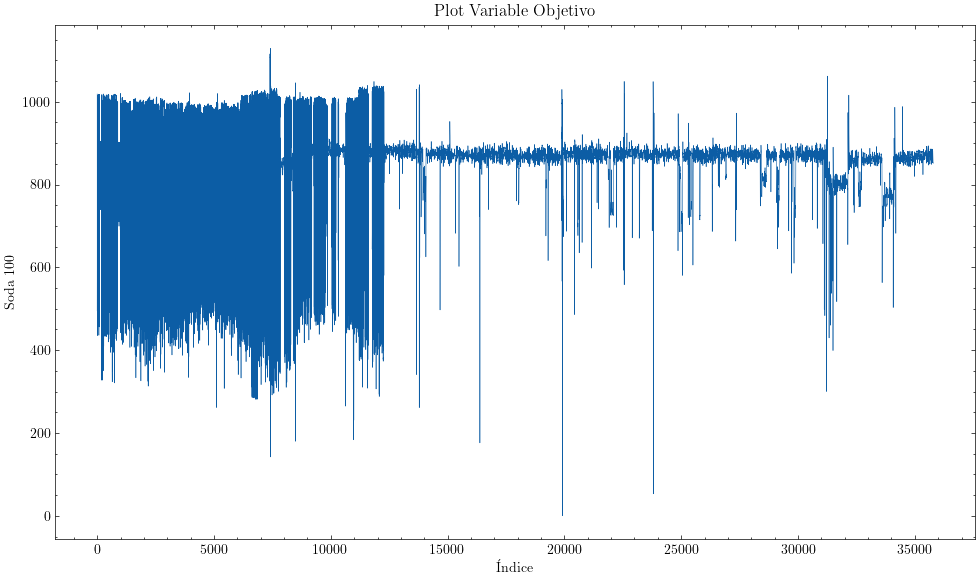

In [28]:
# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar usando el rango de índices
plt.plot(range(filtered_data.shape[0]), filtered_data['Soda 100% kg/h'], linewidth=0.4)

plt.title('Plot Variable Objetivo')
plt.xlabel('Índice')
plt.ylabel('Soda 100% kg/h')
plt.tight_layout()
plt.show()

Se observa bastante ruido en los primeros ~12000 datos, donde luego se estandariza en valores cercanos a los 900 - 1000 kg/h. Para mejorar la predictabilidad y precisión del modelo, se opta por suavizar los datos y tomar solamente aquellos fuera del rango de variabilidad alta:

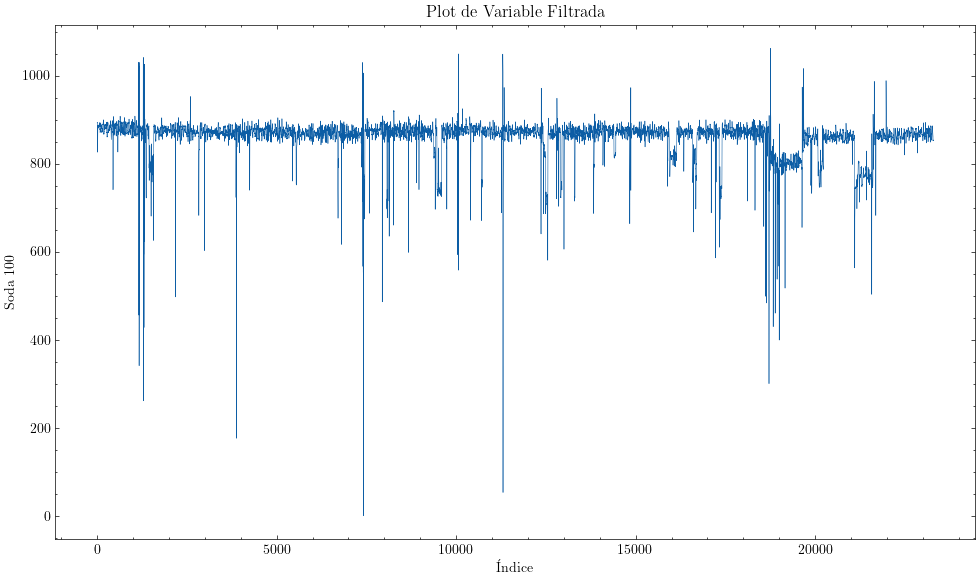

In [29]:
filtered_data = filtered_data.iloc[12500:]
plt.figure(figsize=(10, 6))
plt.plot(range(filtered_data.shape[0]), filtered_data['Soda 100% kg/h'], linewidth=0.4)

plt.title('Plot de Variable Filtrada')
plt.xlabel('Índice')
plt.ylabel('Soda 100% kg/h')
plt.tight_layout()
plt.show()

### Celdas

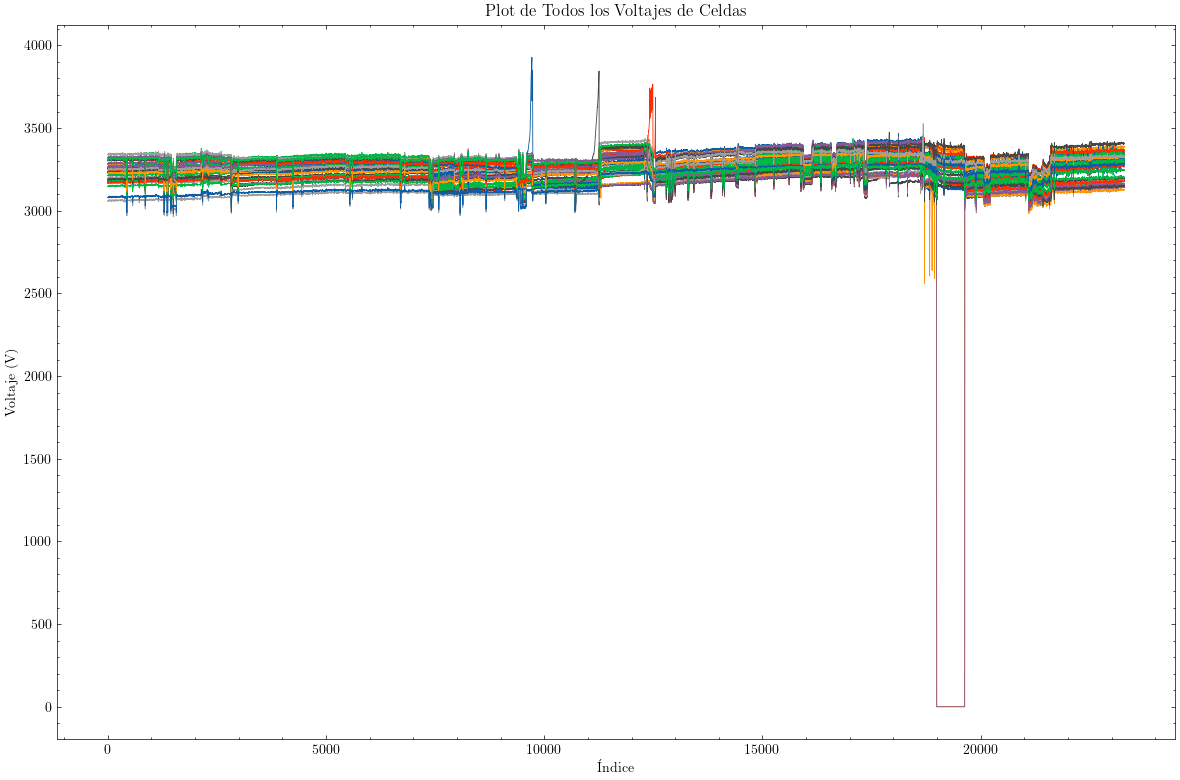

In [30]:
# Extraer las columnas de los voltajes de las celdas
celdas_data = filtered_data.filter(like='VOLTAJE CELDA')

plt.figure(figsize=(12, 8))

# Graficar todas las columnas que contienen "VOLTAJE CELDA"
for col in celdas_data.columns:
    plt.plot(range(filtered_data.shape[0]), celdas_data[col], linewidth=0.6, label=col)

plt.title('Plot de Todos los Voltajes de Celdas')
plt.xlabel('Índice')
plt.ylabel('Voltaje (V)')

# Mostrar leyenda
plt.tight_layout()
plt.show()

Se observa que hay algunas celdas que marcan un voltaje 0 durante un tiempo. Esto se debe a que el sensor de voltaje fue desconectado y se almacenaron datos en cero, por lo que para el análisis se las excluirá por completo:

In [31]:
# Filtrar las celdas que tienen algún valor de voltaje en 0
celdas_con_cero = celdas_data.columns[(celdas_data == 0).any()]

# Mostrar las celdas que tienen al menos un valor en 0
print("Celdas con al menos un valor en 0:", celdas_con_cero)

# Eliminar las celdas que tienen al menos un valor en 0
filtered_data = filtered_data.drop(columns=celdas_con_cero)
celdas_data = celdas_data.drop(columns=celdas_con_cero)

Celdas con al menos un valor en 0: Index(['VOLTAJE CELDA 24', 'VOLTAJE CELDA 31', 'VOLTAJE CELDA 33'], dtype='object')


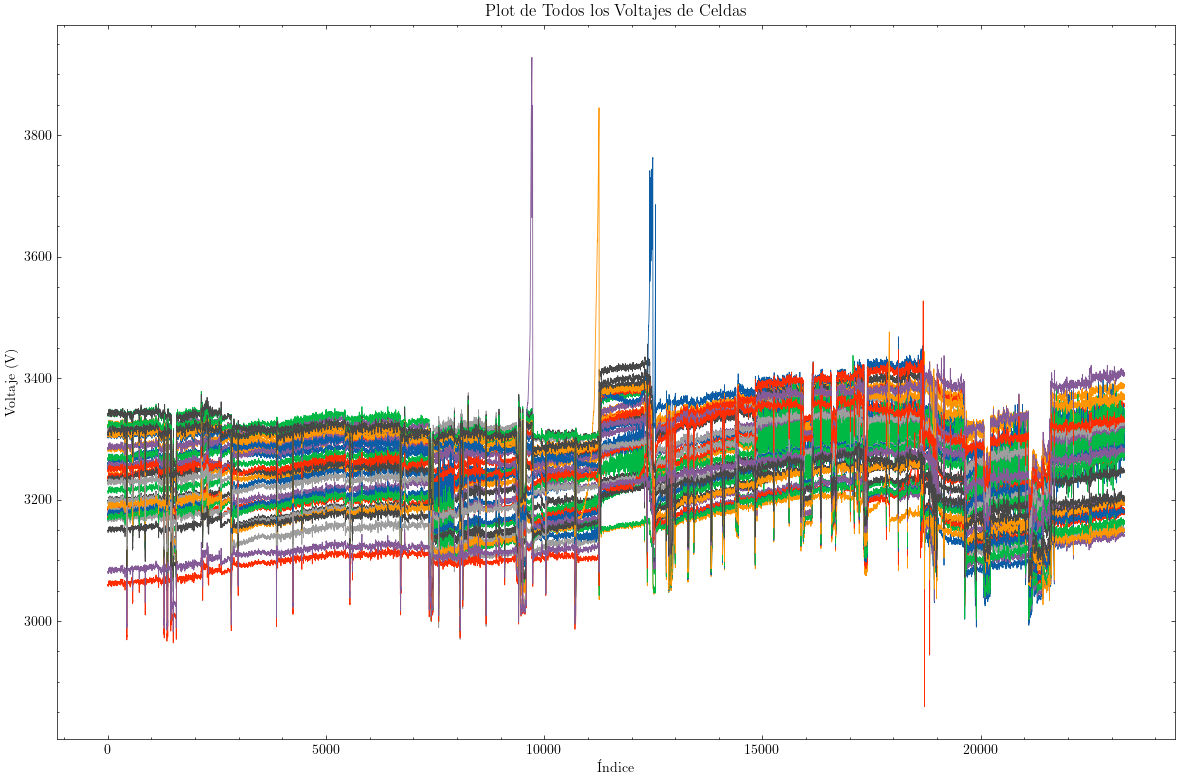

In [32]:
plt.figure(figsize=(12, 8))

# Graficar todas las columnas que contienen "VOLTAJE CELDA"
for col in celdas_data.columns:
    plt.plot(range(filtered_data.shape[0]), celdas_data[col], linewidth=0.6, label=col)

plt.title('Plot de Todos los Voltajes de Celdas')
plt.xlabel('Índice')
plt.ylabel('Voltaje (V)')

plt.tight_layout()
plt.show()

## Reducción de dimensionalidad

### Número de variables de celdas

Se evaluarán dos técnicas para reducir la dimensionalidad: realizar un promedio de los valores de voltaje de las 44 celdas, y un PCA. En los modelos se evaluarán ambos casos.

**Promedio**

In [33]:
filtered_data.loc[:, 'Promedio_Voltajes_Celdas'] = celdas_data.mean(axis=1)

print(filtered_data[['Promedio_Voltajes_Celdas']].head())

       Promedio_Voltajes_Celdas
12500  3249.209753             
12501  3250.162985             
12502  3248.414634             
12503  3249.560285             
12504  3248.293278             


**PCA**

Para reducir la dimensionalidad del dataset y poder entrenar mejores modelos, se agrupará la variabilidad aportada al dataset por las 44 celdas mediante un PCA:

In [34]:
from sklearn.decomposition import PCA

def pca_numvar(df): # Para visualizar varianza por componente del PCA
  varianza = []

  for i in range(1,11):
      pca = PCA(n_components=i)
      pca.fit(df)
      varianza.append(pca.explained_variance_ratio_.sum())
  return varianza

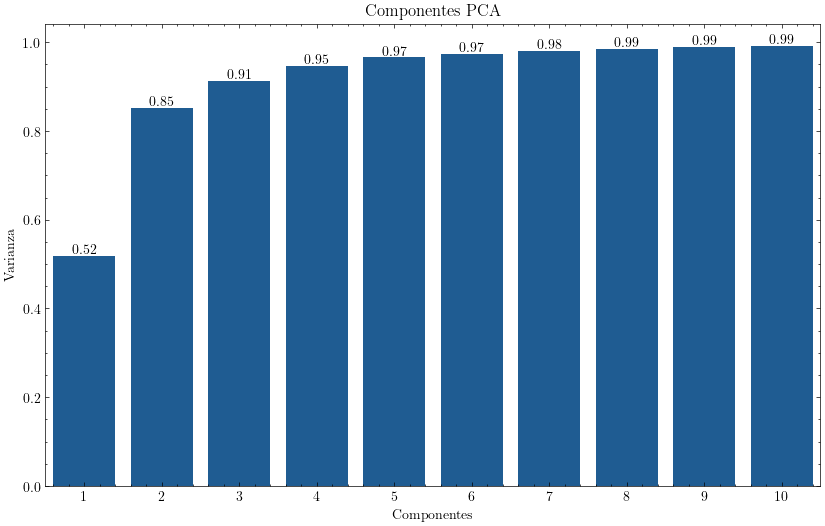

In [35]:
from sklearn.preprocessing import StandardScaler
# Normalizar los datos de voltaje de celdas
scaler = StandardScaler()
celdas_data_scaled = scaler.fit_transform(celdas_data)
plt.figure(figsize=(10, 6))
varianzadf = pd.DataFrame({"Componentes":np.arange(1,11),"Varianza":pca_numvar(celdas_data)})
ax = sns.barplot(x="Componentes", y="Varianza", data=varianzadf)
ax.set_title("Componentes PCA")
ax.bar_label(ax.containers[0], fontsize=10, fmt='%.2f');
plt.show()

Según este resultado, se puede trabajar con 2 variables del pca que ya incluyen el 85% de la variabilidad de las 44 celdas. Así, efectivamente se reducen las 44 celdas a solo 2 variables. Se evaluará el uso de 4 variables para determinar si vale la pena adicionar dos variables más para entrenar mejores modelos.

In [36]:
# Aplicar PCA a las variables de voltajes de celdas
ncomp = 4
pca = PCA(n_components=ncomp)
celdas_pca = pca.fit_transform(celdas_data)

# Crear nuevas columnas para cada componente principal
filtered_data.loc[:,'Voltaje_Celdas_PCA1'] = celdas_pca[:, 0]
filtered_data.loc[:,'Voltaje_Celdas_PCA2'] = celdas_pca[:, 1]
filtered_data.loc[:,'Voltaje_Celdas_PCA3'] = celdas_pca[:, 2]
filtered_data.loc[:,'Voltaje_Celdas_PCA4'] = celdas_pca[:, 3]

# Eliminar las columnas de voltaje de las celdas originales que ya no se necesitan
filtered_data = filtered_data.drop(columns=celdas_data.columns)

display(filtered_data.head())

DIFERENCIAL CL2/H2  AMPS          Conc. Cat. Sal.   Densidad Sulf  \
12500  14.887216           15957.929688  32.085045         0               
12501  14.945652           15932.846680  32.120213         0               
12502  15.106384           15934.774414  32.151455         0               
12503  14.792288           15967.425781  32.207951         0               
12504  14.223212           15961.493164  32.251236         0               

       T. Sal. K401  P. Sniff 404  ph Hipo    Apertura soda hipo  Cond. AD   \
12500  70.907906     205.704178    11.980406  97.630531           35.387001   
12501  71.536964     196.409668    12.357040  51.974003           34.448593   
12502  72.605919     200.164154    12.004737   4.528018           34.456364   
12503  72.863159     200.373230    12.301263  21.484465           33.835064   
12504  72.996109     201.968399    11.951411   1.342378           33.201706   

       Presión aire 11bar  ...  Flujo dia masico  Aspirador hipo  Temp. Sulf  \
12500  10.095695           ...  13000.939453     -3.974685        13.403037    
12501  10.025023           ...  14110.958008     -3.989800        13.598407    
12502   9.947182           ...  15220.462891     -3.920377        13.325843    
12503  10.039452           ...  16327.319336     -4.301459        13.074153    
12504   9.115850           ...  17426.000000     -3.890141        12.922308    

       Temp. AH  Soda 100% kg/h  Promedio_Voltajes_Celdas  \
12500  8.194422  892.501643      3249.209753                
12501  7.938637  893.725453      3250.162985                
12502  7.552806  893.955325      3248.414634                
12503  7.274724  893.850090      3249.560285                
12504  7.340103  866.408069      3248.293278                

       Voltaje_Celdas_PCA1  Voltaje_Celdas_PCA2  Voltaje_Celdas_PCA3  \
12500 -257.684068           133.751306          -90.590251             
12501 -254.689660           138.315815          -93.334433             
12502 -260.806464           130.250960          -88.657314             
12503 -255.990573           135.154535          -91.346219             
12504 -260.094919           128.386330          -89.451154             

       Voltaje_Celdas_PCA4  
12500  43.080981            
12501  43.346249            
12502  41.412157            
12503  43.641002            
12504  42.320407            

[5 rows x 32 columns]

In [37]:
!pip install pca

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.7 MB/s eta 0:00:00


[pca] >Extracting column labels from dataframe.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [41] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


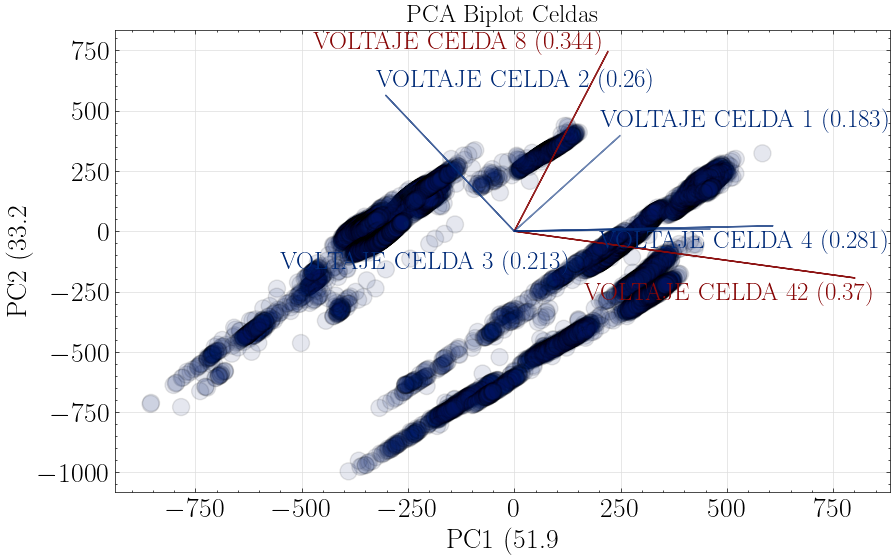

In [38]:
# PCA sobre el training set para ver variables con mayor aporte con 2 componentes
from pca import pca
model = pca(n_components=2)

results = model.fit_transform(X=celdas_data, row_labels=celdas_data.columns)

# Crear un biplot
fig, ax = model.biplot(n_feat=6, title="PCA Biplot Celdas", figsize=(10, 6), alpha=0.1)

Se evidencia que hay celdas que aportan más variabilidad que otras en el dataset. Se investiga más a fondo su tendencia temporal:

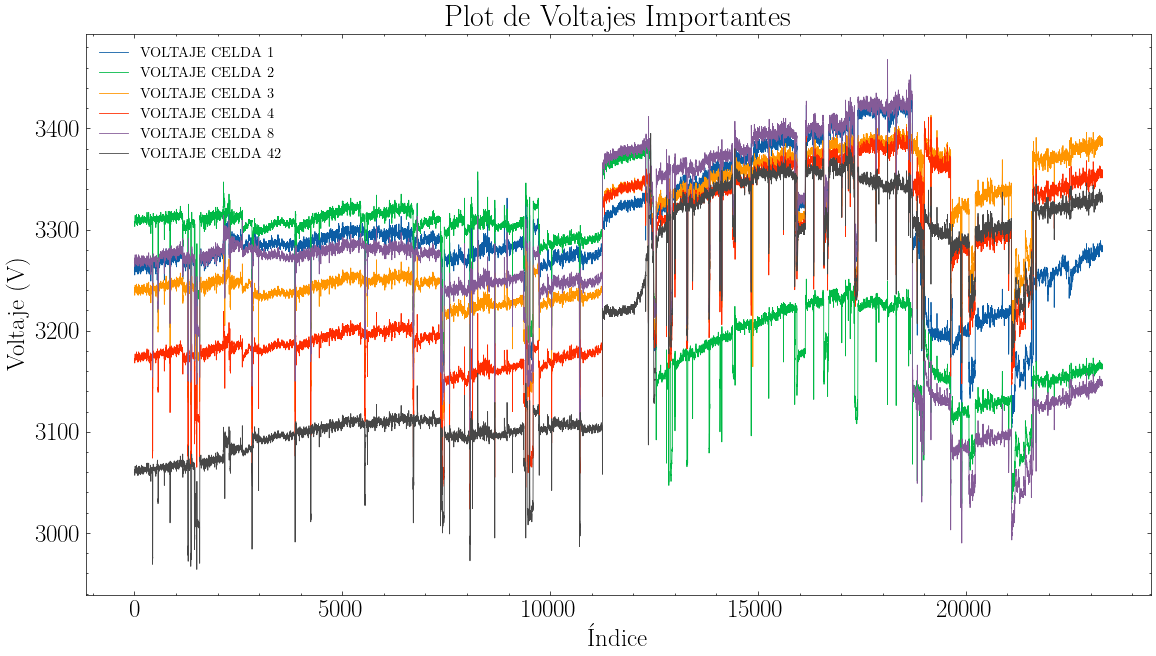

In [39]:
plt.figure(figsize=(12, 7))

# Listado de celdas a graficar
celdas_a_graficar = ['VOLTAJE CELDA 1', 'VOLTAJE CELDA 2', 'VOLTAJE CELDA 3',
                     'VOLTAJE CELDA 4', 'VOLTAJE CELDA 8', 'VOLTAJE CELDA 42']

# Graficar cada celda en el mismo plot
for celda in celdas_a_graficar:
    plt.plot(range(filtered_data.shape[0]), celdas_data[celda], linewidth=0.6, label=celda)

plt.title('Plot de Voltajes Importantes')
plt.xlabel('Índice')
plt.ylabel('Voltaje (V)')

# Mostrar leyenda
plt.legend(loc='upper left', fontsize='xx-small')

plt.tight_layout()
plt.show()


Mantienen aproximadamente las mismas tendencias, pero con diferentes valores promedio independientes. La celda 42 si presenta una tendencia y valores muy distintos a las demás.

## Revisión Outliers

Se eliminan outliers mediante clústering (DBSCAN):

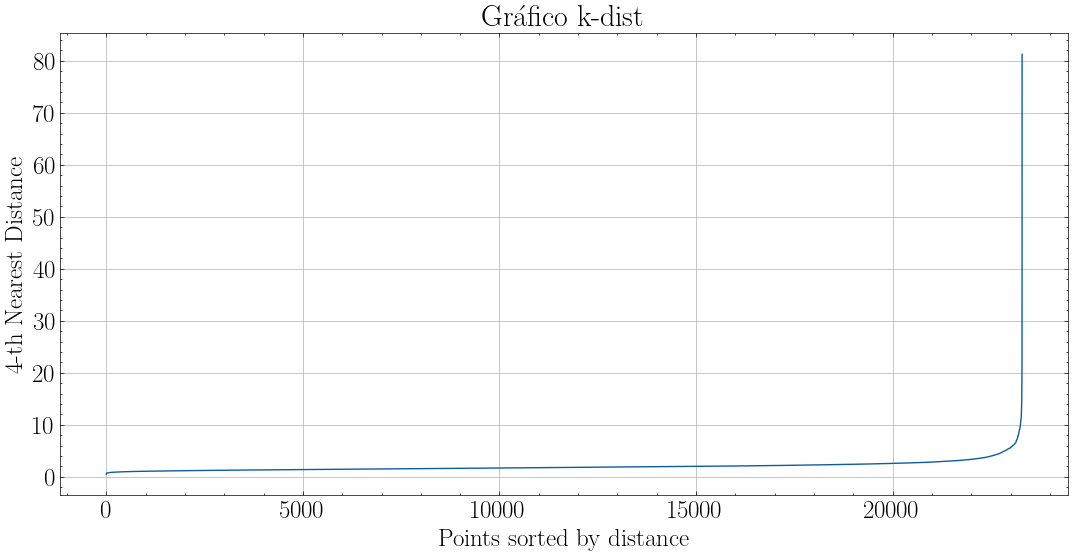

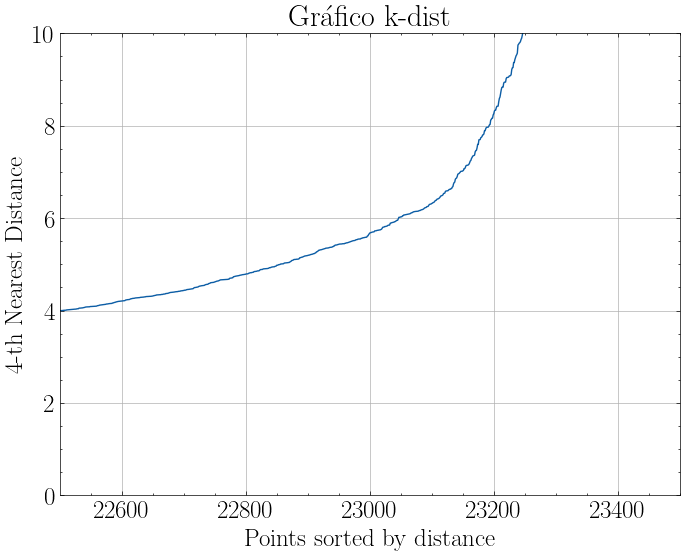

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(filtered_data)

# Ajuste de parámetros (elbow point): https://digitaldwellings.tech/blog/article/33/

def plot_k_distance_graph(X, k):
  fig, ax = plt.subplots(figsize=(13, 6))
  # Compute pairwise distances between the points
  distances = pairwise_distances(X)
  # Sort the distances for each point
  sorted_distances = np.sort(distances, axis=1)
  # Get the k-th nearest distances
  k_distances = sorted_distances[:, k-1]
  # Sort the k-distances
  sorted_k_distances = np.sort(k_distances)
  # Plot the k-distance graph
  plt.plot(sorted_k_distances)
  plt.xlabel('Points sorted by distance')
  plt.ylabel(f'{k}-th Nearest Distance')
  plt.title('Gráfico k-dist')
  plt.grid(True)
  plt.show()
  print()
  fig, ax = plt.subplots(figsize=(8, 6))
  plt.plot(sorted_k_distances)
  plt.xlabel('Points sorted by distance')
  plt.ylabel(f'{k}-th Nearest Distance')
  plt.title('Gráfico k-dist')
  plt.grid(True)
  plt.xlim(22500, 23500)
  plt.ylim(0, 10)
  plt.show()

# Usage:
# X is your dataset, and k is typically set to minPts-1
plot_k_distance_graph(X_scaled, k=4)


Se observa que un valor recomendable para epsilon es alrededor de 6

In [41]:
dbscan = DBSCAN(eps=6, min_samples=36)
labels = dbscan.fit_predict(X_scaled)

# Verificar cuántos puntos son etiquetados como outliers
outliers = np.where(labels == -1)[0]
print(f"Cantidad de outliers detectados: {len(outliers)}")

# Obtener los índices de los outliers en el DataFrame original
outlier_indices = filtered_data.iloc[outliers].index

# Crear una copia del DataFrame para modificarlo
filtered_data_dbscan = filtered_data.copy()

# Definir el tamaño de la ventana para el promedio móvil (2 días en intervalos de 20 min = 144 puntos)
window_size = 144

# Reemplazar los outliers con la media local (rolling mean) en cada columna
for col in filtered_data.columns:
    # Calcular el promedio móvil para cada columna
    rolling_mean = filtered_data[col].rolling(window=window_size, center=True).mean()

    # Reemplazar los outliers con la media local (rolling mean)
    filtered_data_dbscan.loc[outlier_indices, col] = rolling_mean.loc[outlier_indices]

# Verificar que se hayan reemplazado correctamente los outliers
filtered_data_dbscan = filtered_data_dbscan[filtered_data_dbscan["T. Sal. K401"] != 0]

print("Dimensión después de reemplazar outliers: ", filtered_data_dbscan.shape)

Cantidad de outliers detectados: 275
Dimensión después de reemplazar outliers:  (23116, 32)


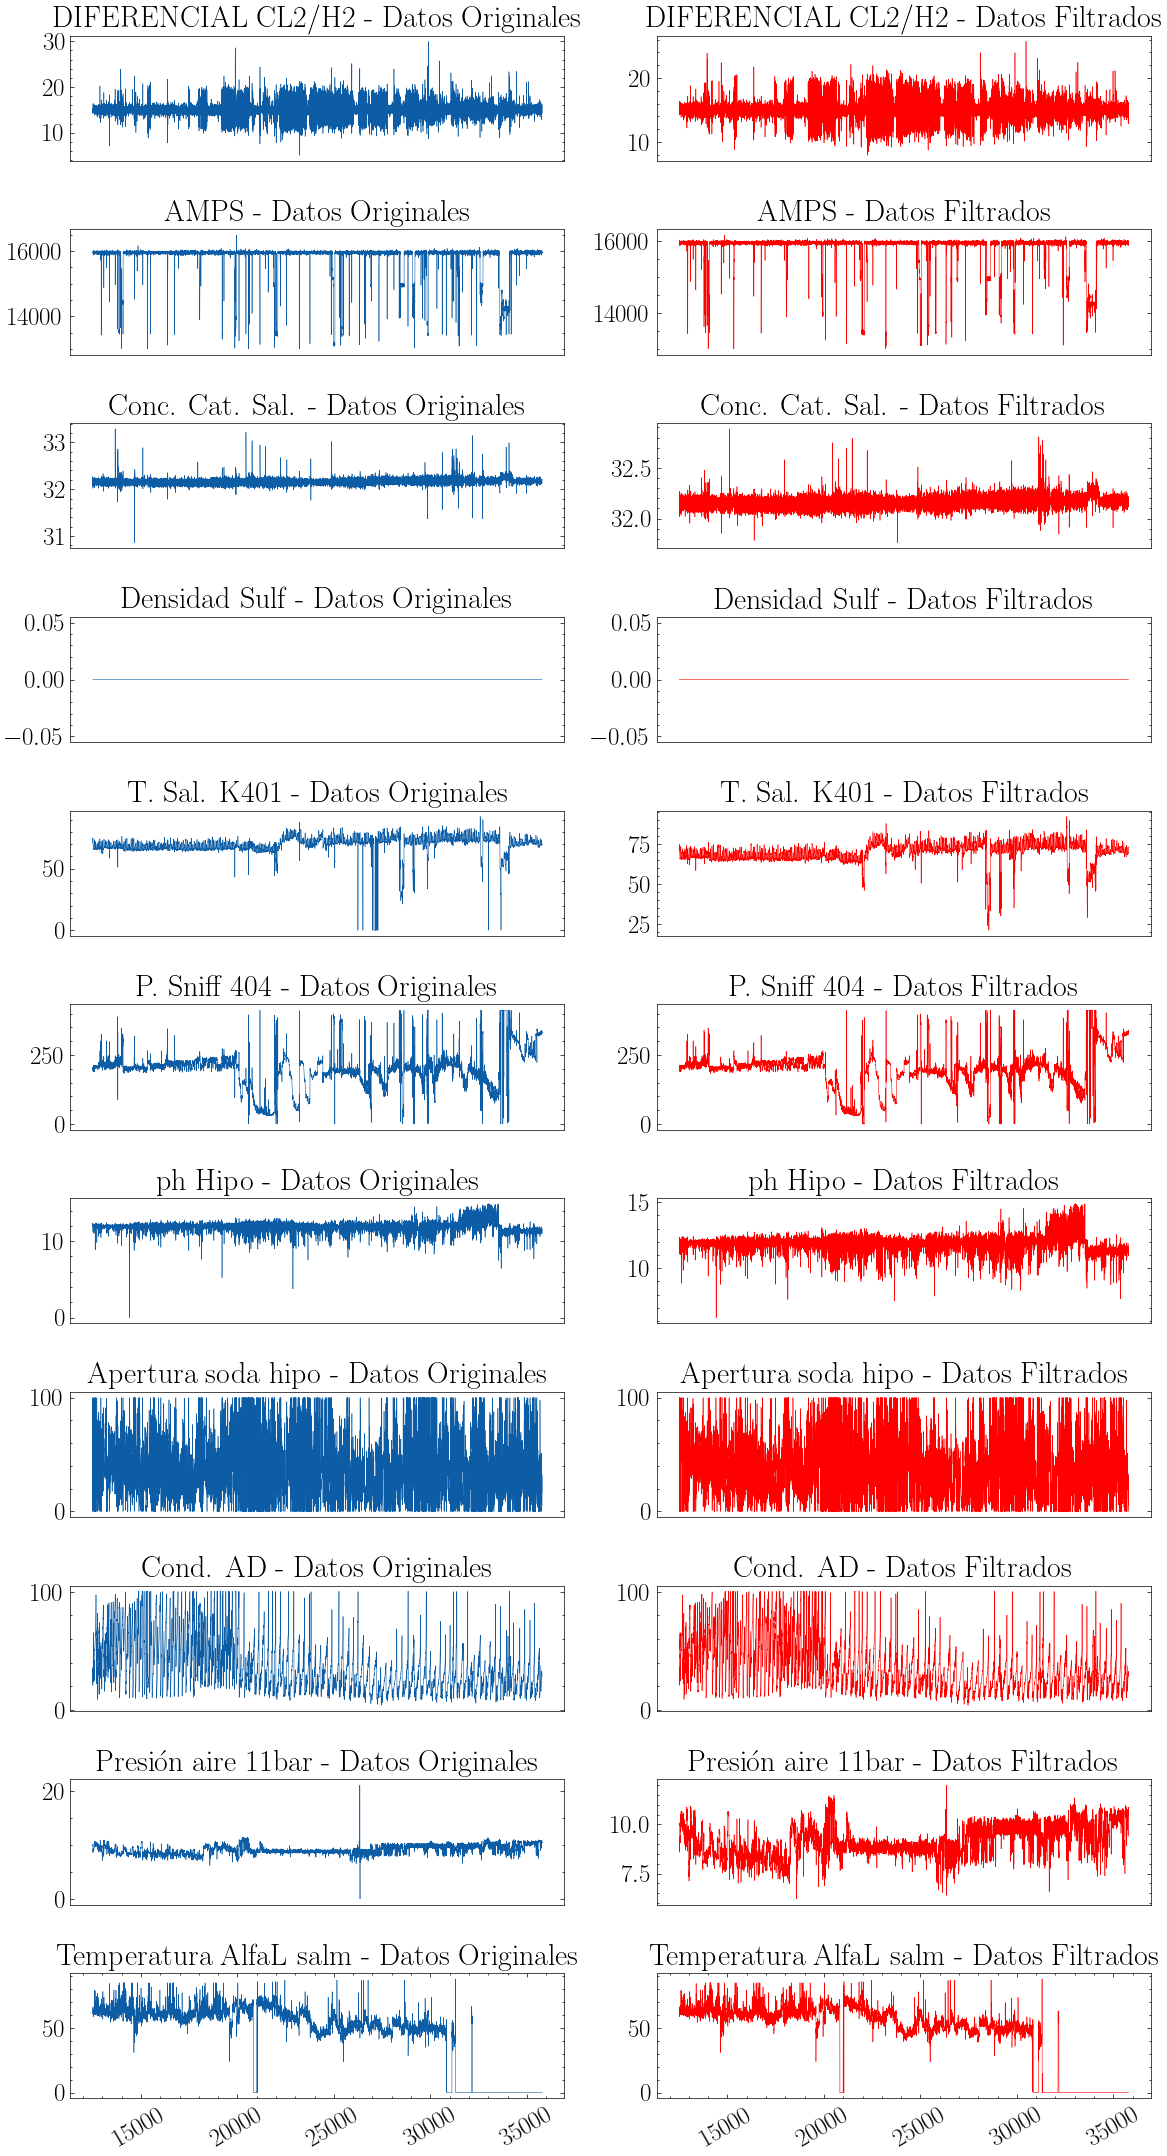

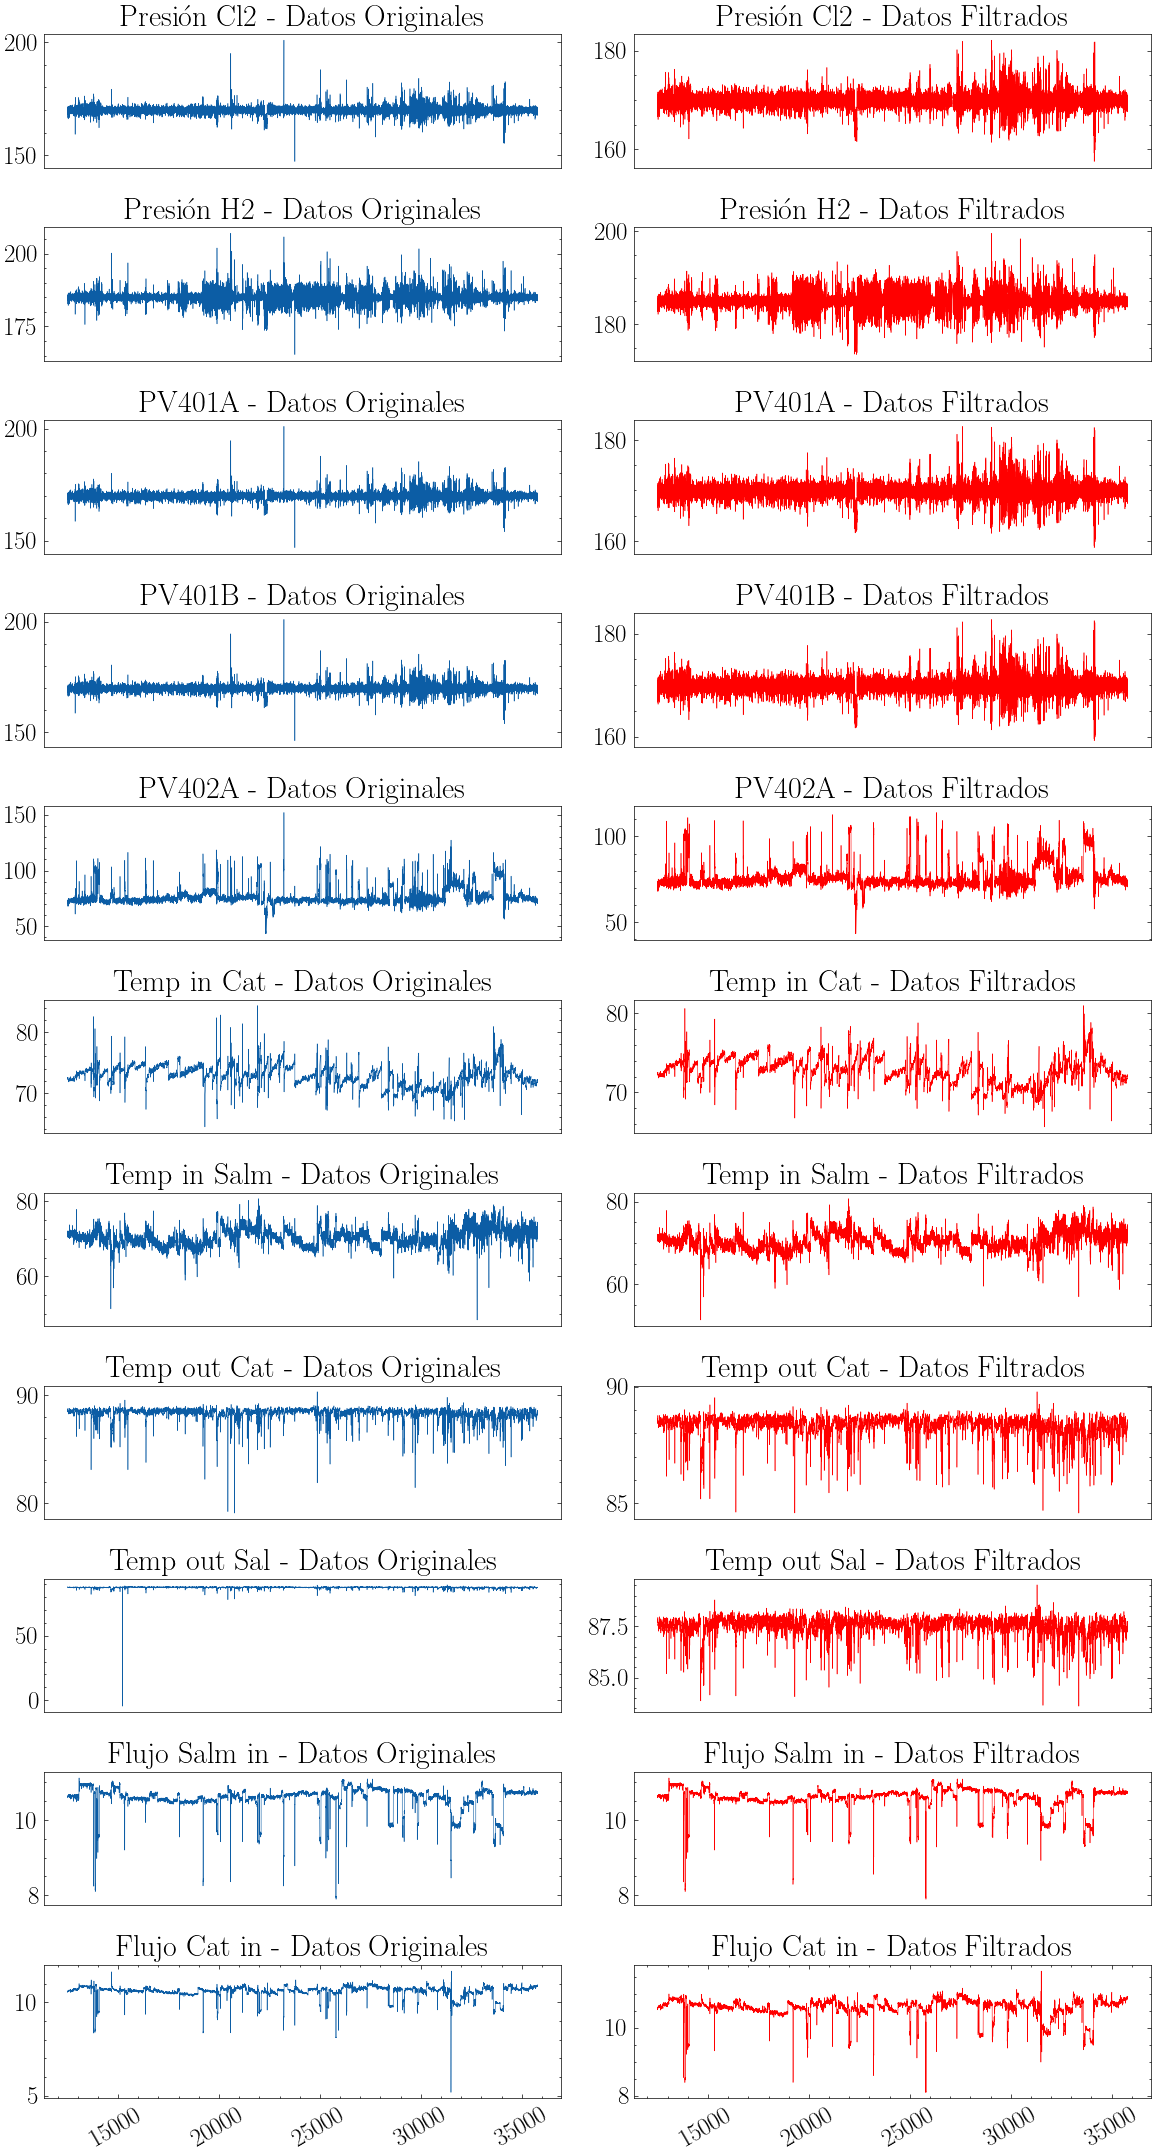

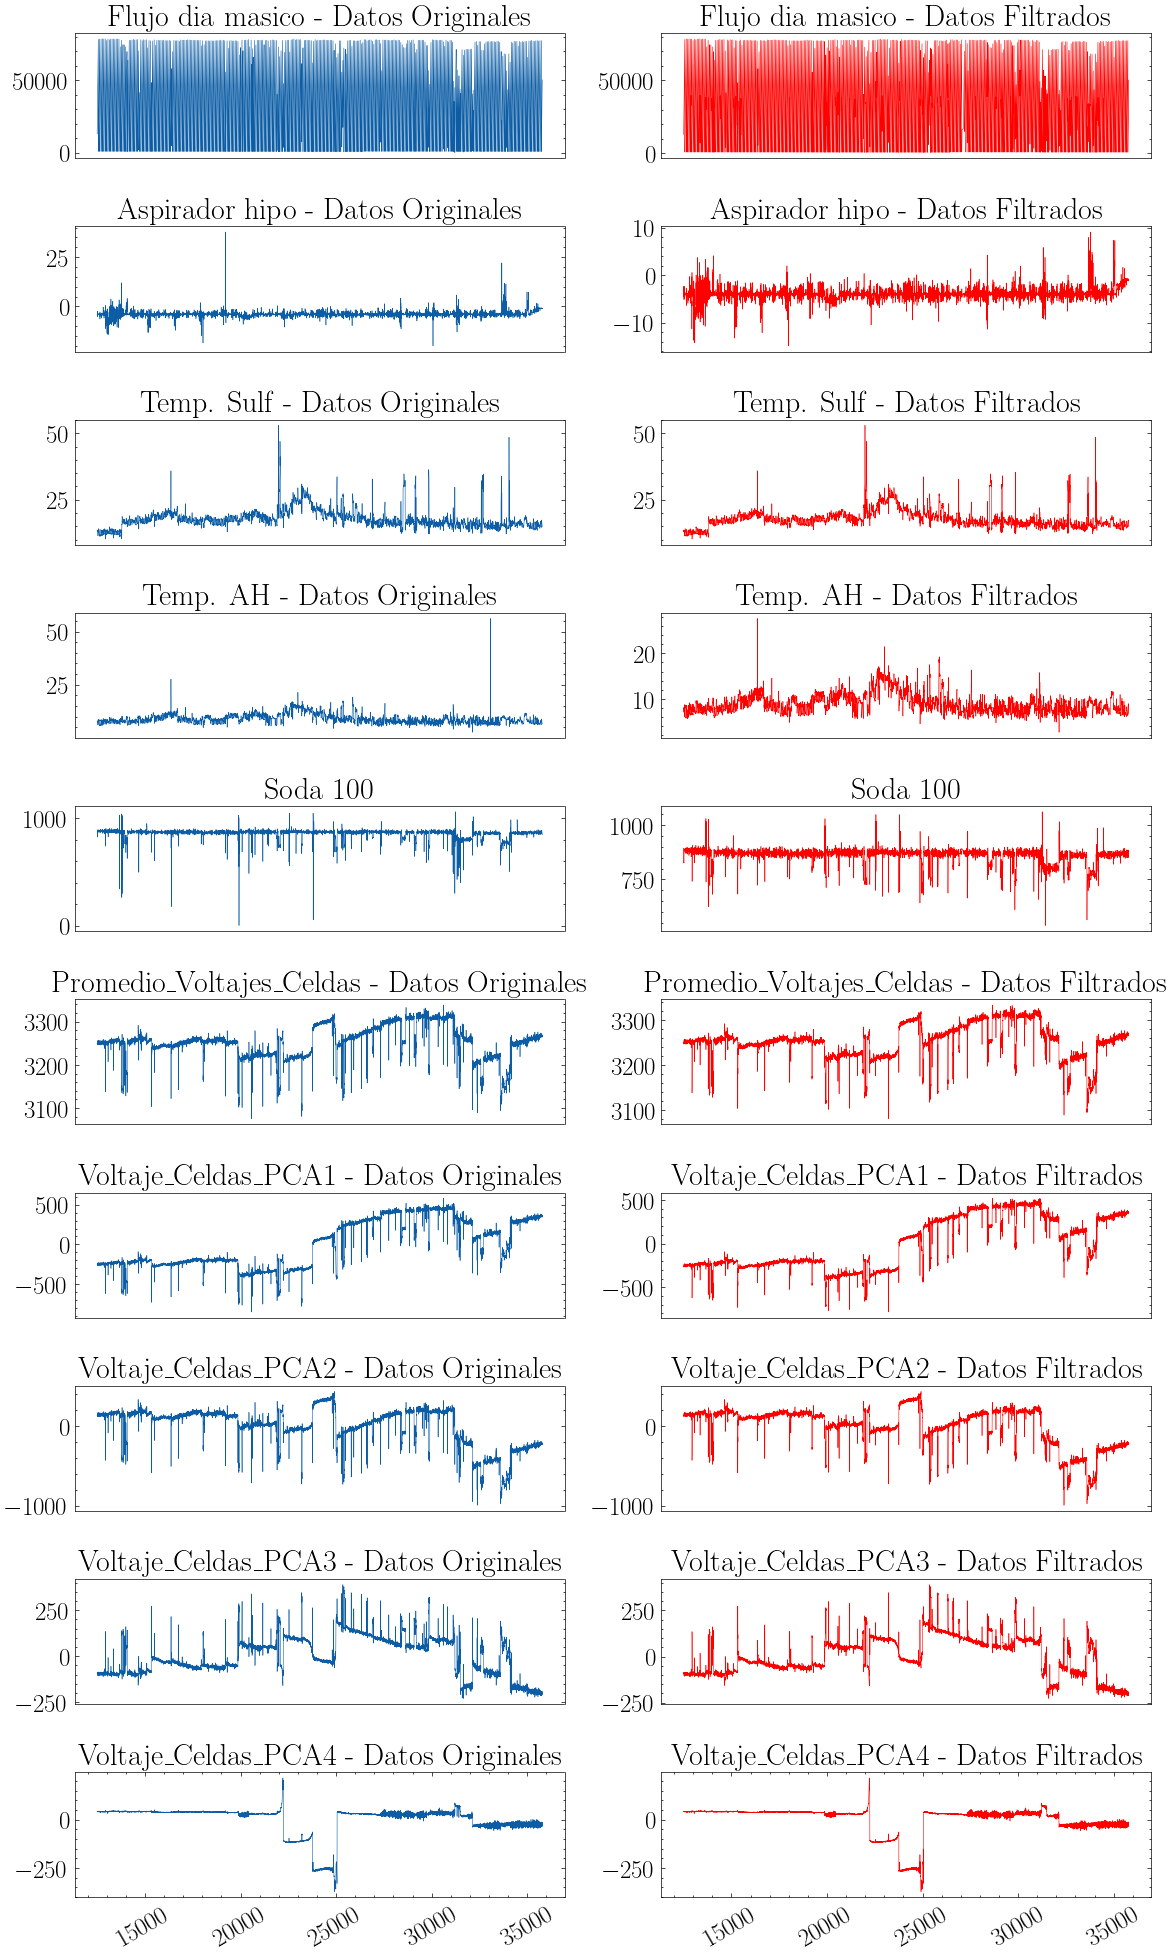

In [42]:
import math

# Calcular un tercio de las columnas para dividir en tres gráficos
third_index = math.ceil(len(filtered_data.columns) / 3)

# Primera figura con el primer tercio de las columnas
fig1, axs1 = plt.subplots(third_index, 2, figsize=(12, 2 * third_index))

for i, feature in enumerate(filtered_data.columns[:third_index]):
    # Gráfico de los datos originales
    axs1[i, 0].plot(filtered_data[feature], label=feature, linewidth=0.4)
    axs1[i, 0].set_title(f"{filtered_data[feature].name} - Datos Originales")

    # Ocultar el eje X para todas las filas excepto la última
    if i != third_index - 1:
        axs1[i, 0].set_xticks([])  # Eliminar los ticks del eje X en las filas superiores
    else:
        axs1[i, 0].tick_params(axis='x', rotation=30)  # Rotar etiquetas del eje X solo en la última fila

    # Gráfico de los datos filtrados por DBSCAN
    axs1[i, 1].plot(filtered_data_dbscan[feature], label=feature, linewidth=0.4, color="red")
    axs1[i, 1].set_title(f"{filtered_data_dbscan[feature].name} - Datos Filtrados")

    # Ocultar el eje X para todas las filas excepto la última
    if i != third_index - 1:
        axs1[i, 1].set_xticks([])  # Eliminar los ticks del eje X en las filas superiores
    else:
        axs1[i, 1].tick_params(axis='x', rotation=30)  # Rotar etiquetas del eje X solo en la última fila

# Ajustar el layout para que no se superpongan los gráficos
plt.tight_layout()
plt.show()
# Segunda figura con el segundo tercio de las columnas
fig2, axs2 = plt.subplots(third_index, 2, figsize=(12, 2 * third_index))

for i, feature in enumerate(filtered_data.columns[third_index:2*third_index]):
    # Gráfico de los datos originales
    axs2[i, 0].plot(filtered_data[feature], label=feature, linewidth=0.4)
    axs2[i, 0].set_title(f"{filtered_data[feature].name} - Datos Originales")

    # Ocultar el eje X para todas las filas excepto la última
    if i != third_index - 1:
        axs2[i, 0].set_xticks([])  # Eliminar los ticks del eje X en las filas superiores
    else:
        axs2[i, 0].tick_params(axis='x', rotation=30)  # Rotar etiquetas del eje X solo en la última fila

    # Gráfico de los datos filtrados por DBSCAN
    axs2[i, 1].plot(filtered_data_dbscan[feature], label=feature, linewidth=0.4, color="red")
    axs2[i, 1].set_title(f"{filtered_data_dbscan[feature].name} - Datos Filtrados")

    # Ocultar el eje X para todas las filas excepto la última
    if i != third_index - 1:
        axs2[i, 1].set_xticks([])  # Eliminar los ticks del eje X en las filas superiores
    else:
        axs2[i, 1].tick_params(axis='x', rotation=30)  # Rotar etiquetas del eje X solo en la última fila

# Ajustar el layout para que no se superpongan los gráficos
plt.tight_layout()
plt.show()
# Tercera figura con el último tercio de las columnas
fig3, axs3 = plt.subplots(len(filtered_data.columns) - 2*third_index, 2, figsize=(12, 2 * (len(filtered_data.columns) - 2*third_index)))

for i, feature in enumerate(filtered_data.columns[2*third_index:]):
    # Gráfico de los datos originales
    axs3[i, 0].plot(filtered_data[feature], label=feature, linewidth=0.4)
    axs3[i, 0].set_title(f"{filtered_data[feature].name} - Datos Originales")

    # Ocultar el eje X para todas las filas excepto la última
    if i != len(filtered_data.columns[2*third_index:]) - 1:
        axs3[i, 0].set_xticks([])  # Eliminar los ticks del eje X en las filas superiores
    else:
        axs3[i, 0].tick_params(axis='x', rotation=30)  # Rotar etiquetas del eje X solo en la última fila

    # Gráfico de los datos filtrados por DBSCAN
    axs3[i, 1].plot(filtered_data_dbscan[feature], label=feature, linewidth=0.4, color="red")
    axs3[i, 1].set_title(f"{filtered_data_dbscan[feature].name} - Datos Filtrados")

    # Ocultar el eje X para todas las filas excepto la última
    if i != len(filtered_data.columns[2*third_index:]) - 1:
        axs3[i, 1].set_xticks([])  # Eliminar los ticks del eje X en las filas superiores
    else:
        axs3[i, 1].tick_params(axis='x', rotation=30)  # Rotar etiquetas del eje X solo en la última fila

# Ajustar el layout para que no se superpongan los gráficos
plt.tight_layout()
plt.show()

Aquí se puede ver cómo se mantuvo la estructura general de los datos, eliminando datos demasiado alejados o extremos. Muchos de estos son causa de errores de lectura de los instrumentos (sensores), por lo que se evidencian solo en momentos puntuales del dataset.

Se eliminan las variables: Densidad Sulf ya que está en cero, Flujo dia masico que es redundante con la variable objetivo, y Temperatura AlfaL salm que tiene muchos valores en cero.

In [43]:
filtered_data_dbscan = filtered_data_dbscan.drop(columns=["Densidad Sulf", "Flujo dia masico", "Temperatura AlfaL salm"])

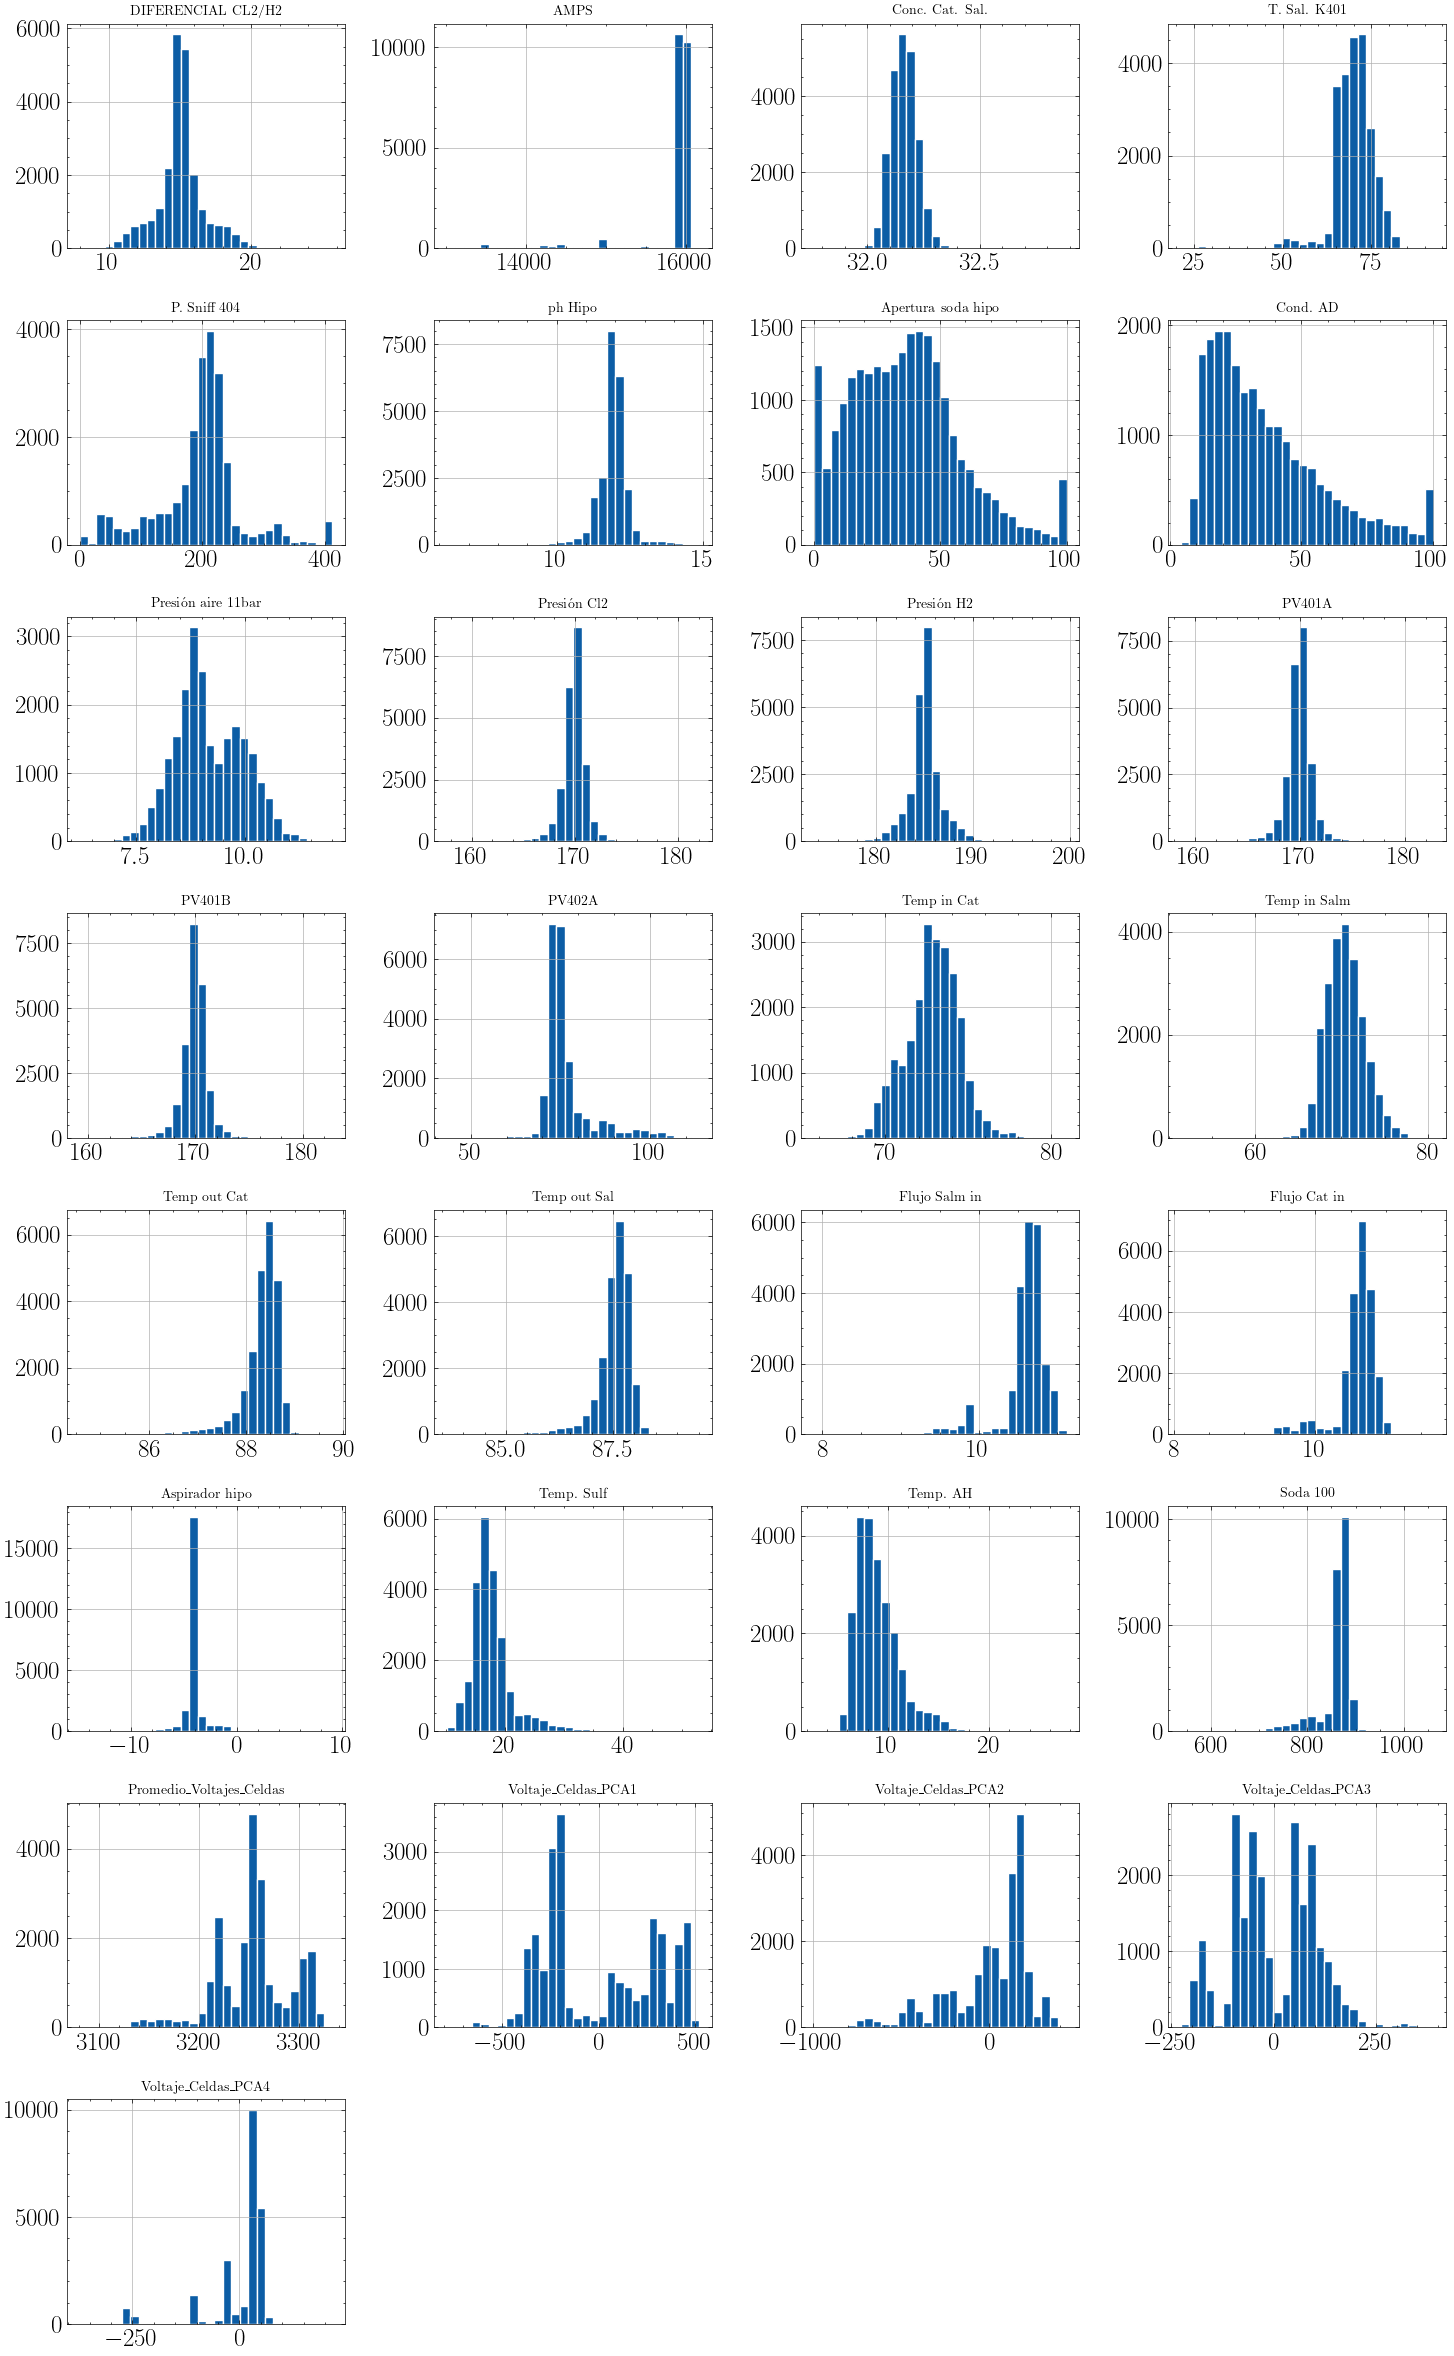

In [44]:
num_columns = 4  # Número de columnas por fila en los subplots
num_rows = len(filtered_data_dbscan.columns) // num_columns + 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(filtered_data_dbscan.columns):
    ax = axes[i]
    filtered_data_dbscan[col].hist(bins=30, ax=ax, edgecolor='white')
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se observa mucho menos ruido en los gráficos de las variables. Además, la mayoría ahora sigue una distribución normal o al menos no tan sesgada.


# Selección de características

Se evaluarán los siguientes métodos de selección de características:

**Filter Method: SelectKBest**

Selecciona las características más relevantes basadas en una función estadística (la correlación con la variable objetivo usando f_regression).


**Wrapper Method: Recursive Feature Elimination (RFE)**

RFE selecciona características eliminando iterativamente las menos importantes, entrenando el modelo cada vez (regresión lineal como estimador).

**Embedded Method: Lasso (Regresión L1)**

Lasso es un método de regresión que penaliza las características menos importantes, dejando solo las más relevantes.

Se optará por conseguir alrededor de 10 variables en cada caso y se compararán las obtenidas.

**SelectKBest**

In [45]:
from sklearn.feature_selection import SelectKBest, f_regression

filtered_data_full = filtered_data_dbscan.copy()

# Separar características y variable objetivo
X = filtered_data_full.drop(columns=['Soda 100% kg/h'])  # Variables independientes
y = filtered_data_full['Soda 100% kg/h']  # Variable objetivo

# Usar SelectKBest para seleccionar las 10 mejores características
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector_kbest.fit_transform(X, y)

# Obtener los nombres de las columnas seleccionadas
selected_columns_kbest = X.columns[selector_kbest.get_support()]
print("SelectKBest - Columnas seleccionadas:", selected_columns_kbest)

SelectKBest - Columnas seleccionadas: Index(['AMPS', 'T. Sal. K401', 'PV402A', 'Temp in Salm', 'Temp out Cat',
       'Temp out Sal', 'Flujo Salm in', 'Flujo Cat in',
       'Promedio_Voltajes_Celdas', 'Voltaje_Celdas_PCA2'],
      dtype='object')


**RFE con CrossValidation**

In [46]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Definir el modelo base
model = LinearRegression()

# Usar RFECV para seleccionar características
selector_rfe = RFECV(model, cv=5, scoring='neg_mean_squared_error')
X_rfe = selector_rfe.fit_transform(X, y)

# Obtener los nombres de las columnas seleccionadas
selected_columns_rfe = X.columns[selector_rfe.get_support()]
print("RFE - Columnas seleccionadas:", selected_columns_rfe)

RFE - Columnas seleccionadas: Index(['Conc. Cat. Sal. ', 'Presión Cl2', 'PV402A', 'Temp out Cat',
       'Temp out Sal', 'Flujo Salm in', 'Flujo Cat in'],
      dtype='object')


**Lasso**

In [47]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

# Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo de Lasso (L1 regularization)
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_scaled, y)

# Obtener las características seleccionadas por Lasso
selected_columns_lasso = X.columns[model_lasso.coef_ != 0]
print("Lasso - Columnas seleccionadas:", selected_columns_lasso)

Lasso - Columnas seleccionadas: Index(['DIFERENCIAL CL2/H2', 'AMPS', 'Conc. Cat. Sal. ', 'T. Sal. K401',
       'P. Sniff 404', 'Apertura soda hipo', 'Cond. AD', 'Presión aire 11bar',
       'Presión Cl2', 'PV401B', 'PV402A', 'Temp out Cat', 'Flujo Salm in',
       'Flujo Cat in', 'Aspirador hipo', 'Temp. Sulf', 'Temp. AH',
       'Voltaje_Celdas_PCA1', 'Voltaje_Celdas_PCA2', 'Voltaje_Celdas_PCA3'],
      dtype='object')


In [48]:
results_select = {
    'SelectKBest': selected_columns_kbest,
    'RFE': selected_columns_rfe,
    'Lasso': selected_columns_lasso,
}
# Convertir las listas en conjuntos (sets)
select_kbest = results_select['SelectKBest']
rfe = results_select['RFE']
lasso = results_select['Lasso']
set_kbest = set(select_kbest)
set_rfe = set(rfe)
set_lasso = set(lasso)
features = set_kbest & set_rfe & set_lasso
results_select['Repetidas']= features

df_vars = pd.DataFrame.from_dict(results_select, orient='index')
df_vars = df_vars.transpose()

print("Número de variables iniciales: ", filtered_data.shape[1])
display(df_vars)

Número de variables iniciales:  32


SelectKBest               RFE               Lasso                 \
0                       AMPS  Conc. Cat. Sal.    DIFERENCIAL CL2/H2   
1               T. Sal. K401       Presión Cl2                 AMPS   
2                     PV402A            PV402A     Conc. Cat. Sal.    
3               Temp in Salm      Temp out Cat         T. Sal. K401   
4               Temp out Cat      Temp out Sal         P. Sniff 404   
5               Temp out Sal     Flujo Salm in   Apertura soda hipo   
6              Flujo Salm in      Flujo Cat in             Cond. AD   
7               Flujo Cat in              None   Presión aire 11bar   
8   Promedio_Voltajes_Celdas              None          Presión Cl2   
9        Voltaje_Celdas_PCA2              None               PV401B   
10                      None              None               PV402A   
11                      None              None         Temp out Cat   
12                      None              None        Flujo Salm in   
13                      None              None         Flujo Cat in   
14                      None              None       Aspirador hipo   
15                      None              None           Temp. Sulf   
16                      None              None             Temp. AH   
17                      None              None  Voltaje_Celdas_PCA1   
18                      None              None  Voltaje_Celdas_PCA2   
19                      None              None  Voltaje_Celdas_PCA3   

   Repetidas       
0          PV402A  
1   Flujo Salm in  
2    Flujo Cat in  
3    Temp out Cat  
4            None  
5            None  
6            None  
7            None  
8            None  
9            None  
10           None  
11           None  
12           None  
13           None  
14           None  
15           None  
16           None  
17           None  
18           None  
19           None

Se tomarán solamente las variables que se repitan en los 3 métodos de selección de variables, además de las que estén presentes en solo uno o dos de ellos por su importancia en el proceso productivo para obtener una selección de las más importantes.

In [49]:
# Variables que están en todas las listas (intersección)
features_prom = features.copy()
features_pca = features.copy()

# Se agrega la variable AMPS ya que es directamente proporcional a la producción de la planta, además de los voltajes promedio para interpretabilidad
features_prom.add('Promedio_Voltajes_Celdas')
features_pca.add('Voltaje_Celdas_PCA1')
features_pca.add('Voltaje_Celdas_PCA2')
features_pca.add('Voltaje_Celdas_PCA3')
features_pca.add('Voltaje_Celdas_PCA4')
features_prom.add('AMPS')
features_pca.add('AMPS')

print("Features seleccionadas por métodos automáticos:", features, ", Total: ", len(features))
print("Features con Promedio: ", features_prom, ", Total: ", len(features_prom))
print("Features con PCA: ", features_pca, ", Total: ", len(features_pca))

Features seleccionadas por métodos automáticos: {'PV402A', 'Flujo Salm in', 'Flujo Cat in', 'Temp out Cat'} , Total:  4
Features con Promedio:  {'Temp out Cat', 'Promedio_Voltajes_Celdas', 'AMPS', 'PV402A', 'Flujo Salm in', 'Flujo Cat in'} , Total:  6
Features con PCA:  {'Temp out Cat', 'AMPS', 'Voltaje_Celdas_PCA3', 'Voltaje_Celdas_PCA1', 'Voltaje_Celdas_PCA2', 'PV402A', 'Voltaje_Celdas_PCA4', 'Flujo Salm in', 'Flujo Cat in'} , Total:  9


Se valida la consistencia de los datos en las features:

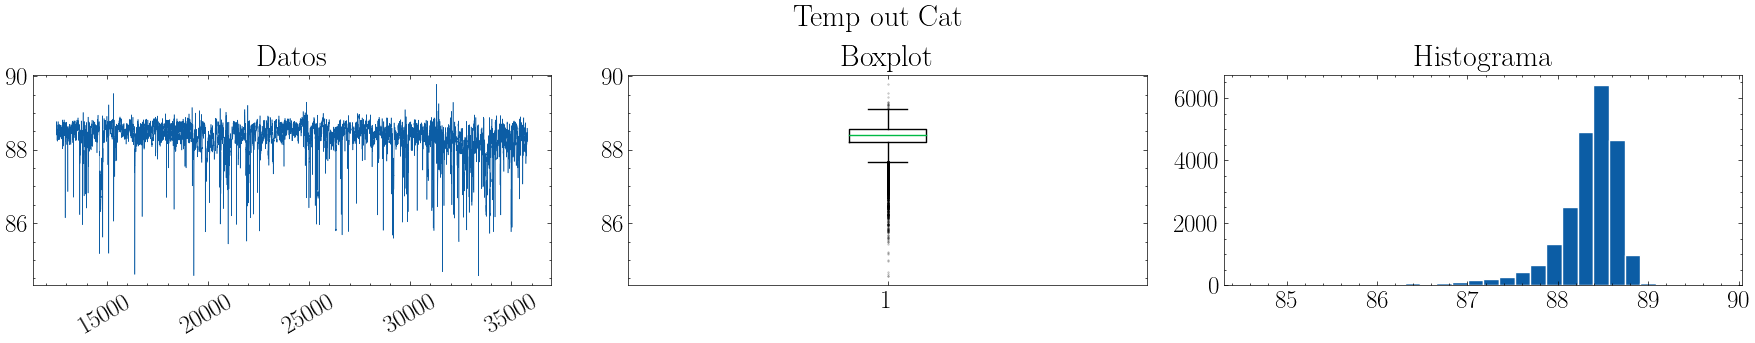

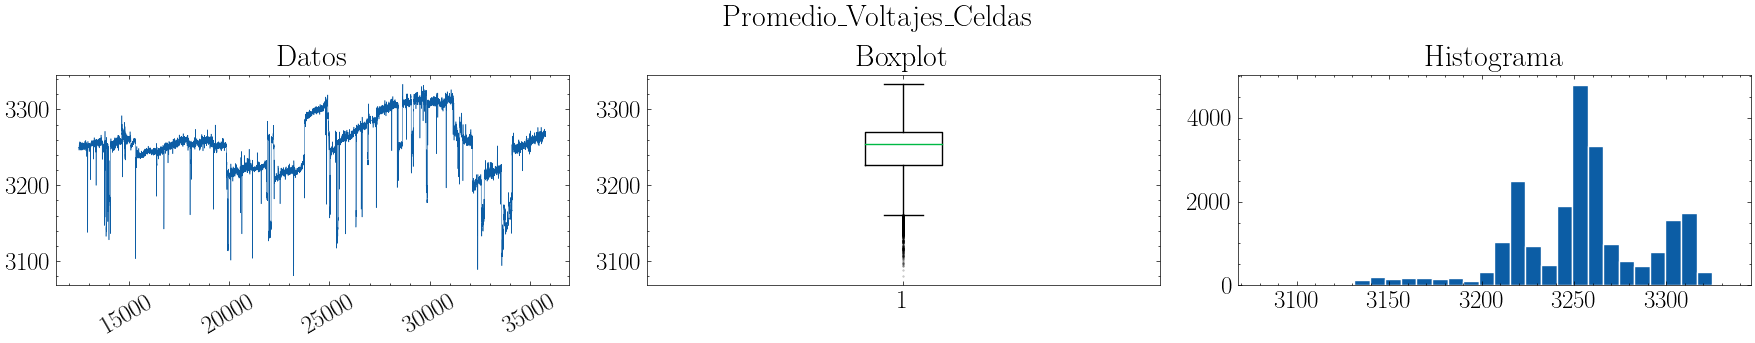

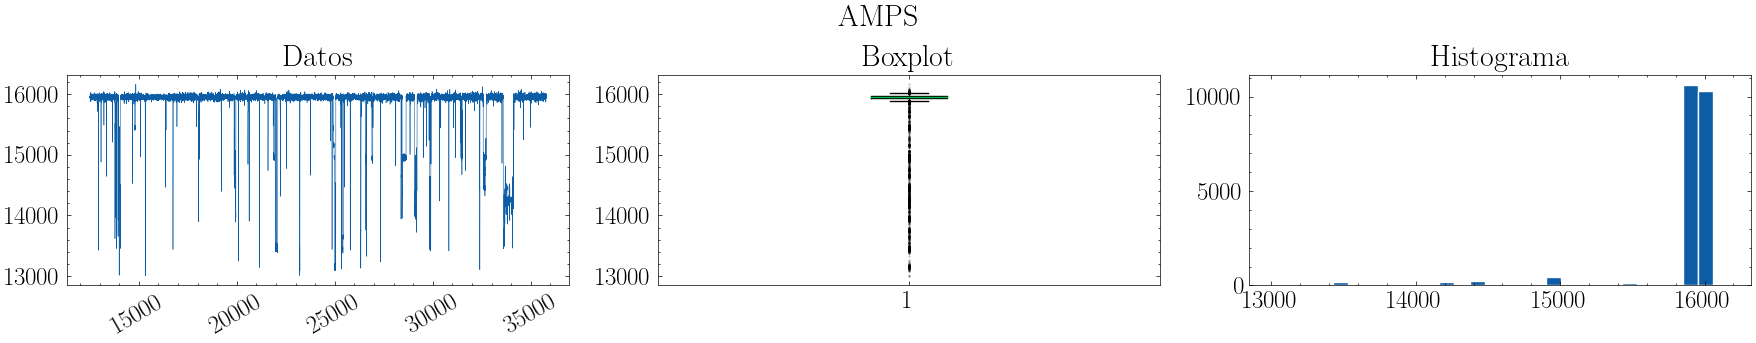

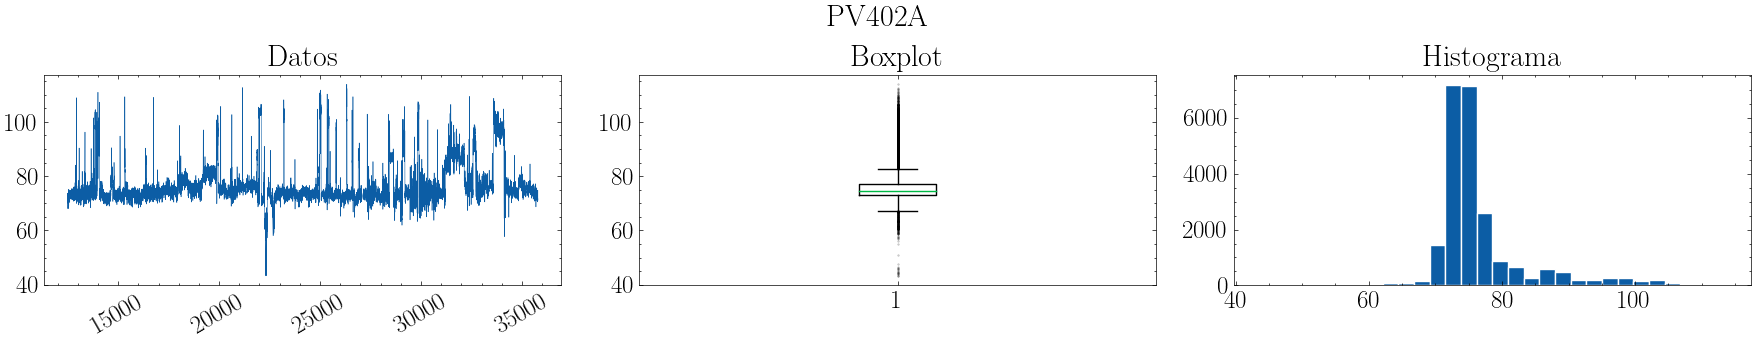

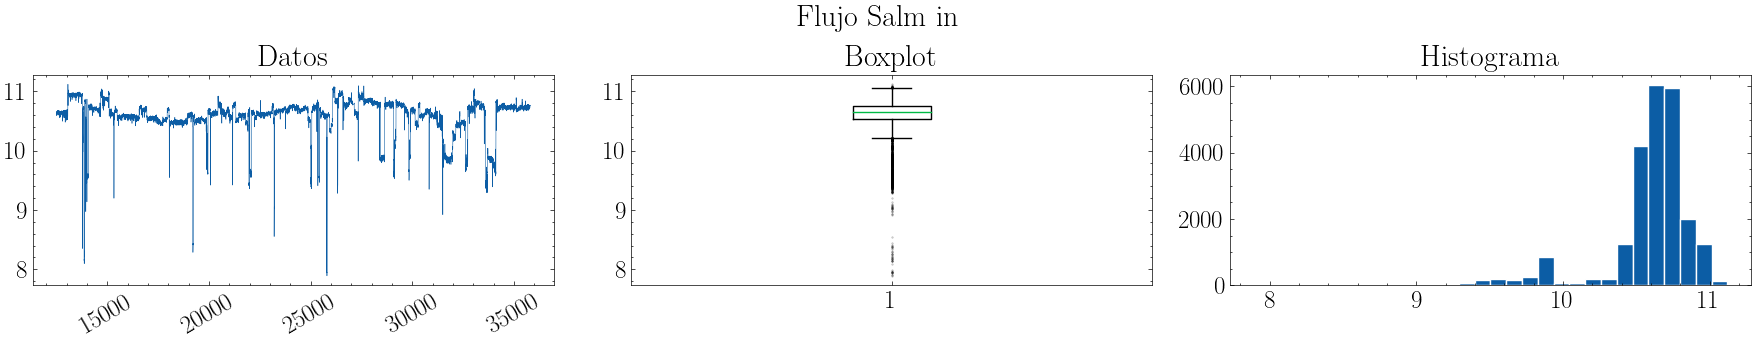

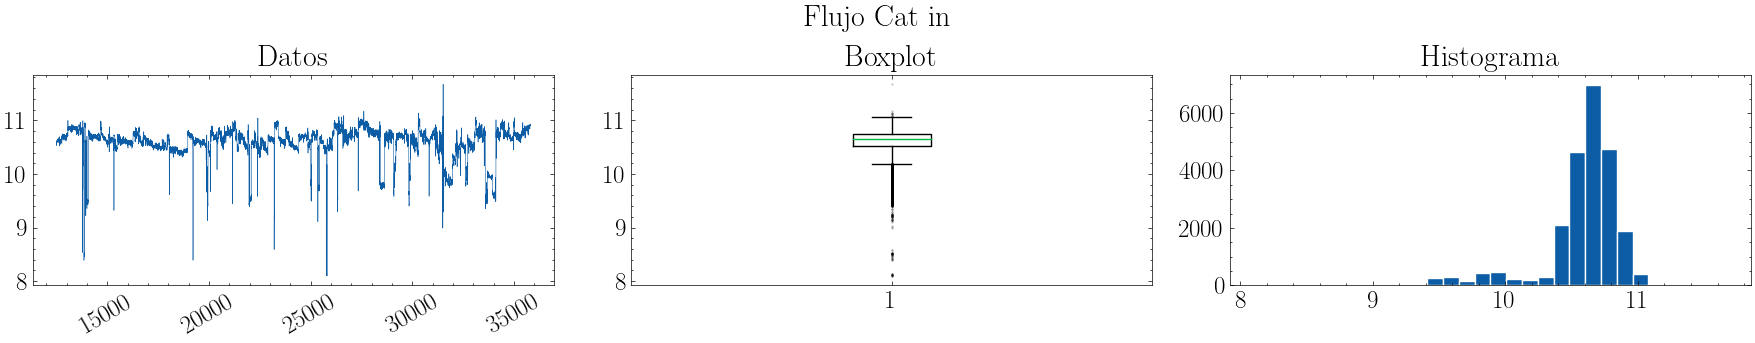

In [50]:
for feature in (features_prom):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))

    # Gráfico de los datos
    axs[0].plot(filtered_data_full[feature], label=feature, linewidth=0.4)
    axs[0].set_title("Datos")
    axs[0].tick_params(axis='x', rotation=30)

    # Boxplot
    axs[1].boxplot(filtered_data_full[feature], flierprops={'marker': 'o', 'markersize': 0.5, 'alpha':0.3})
    axs[1].set_title("Boxplot")

    # Histograma
    axs[2].hist(filtered_data_full[feature], bins=30, edgecolor='white')
    axs[2].set_title("Histograma")

    plt.suptitle(feature, y=0.9)
    plt.tight_layout()
plt.show()

## Pairplot

Análisis de relación entre variables, se consideran todas las posibles hasta descartar si el PCA o el promedio da mejores resultados

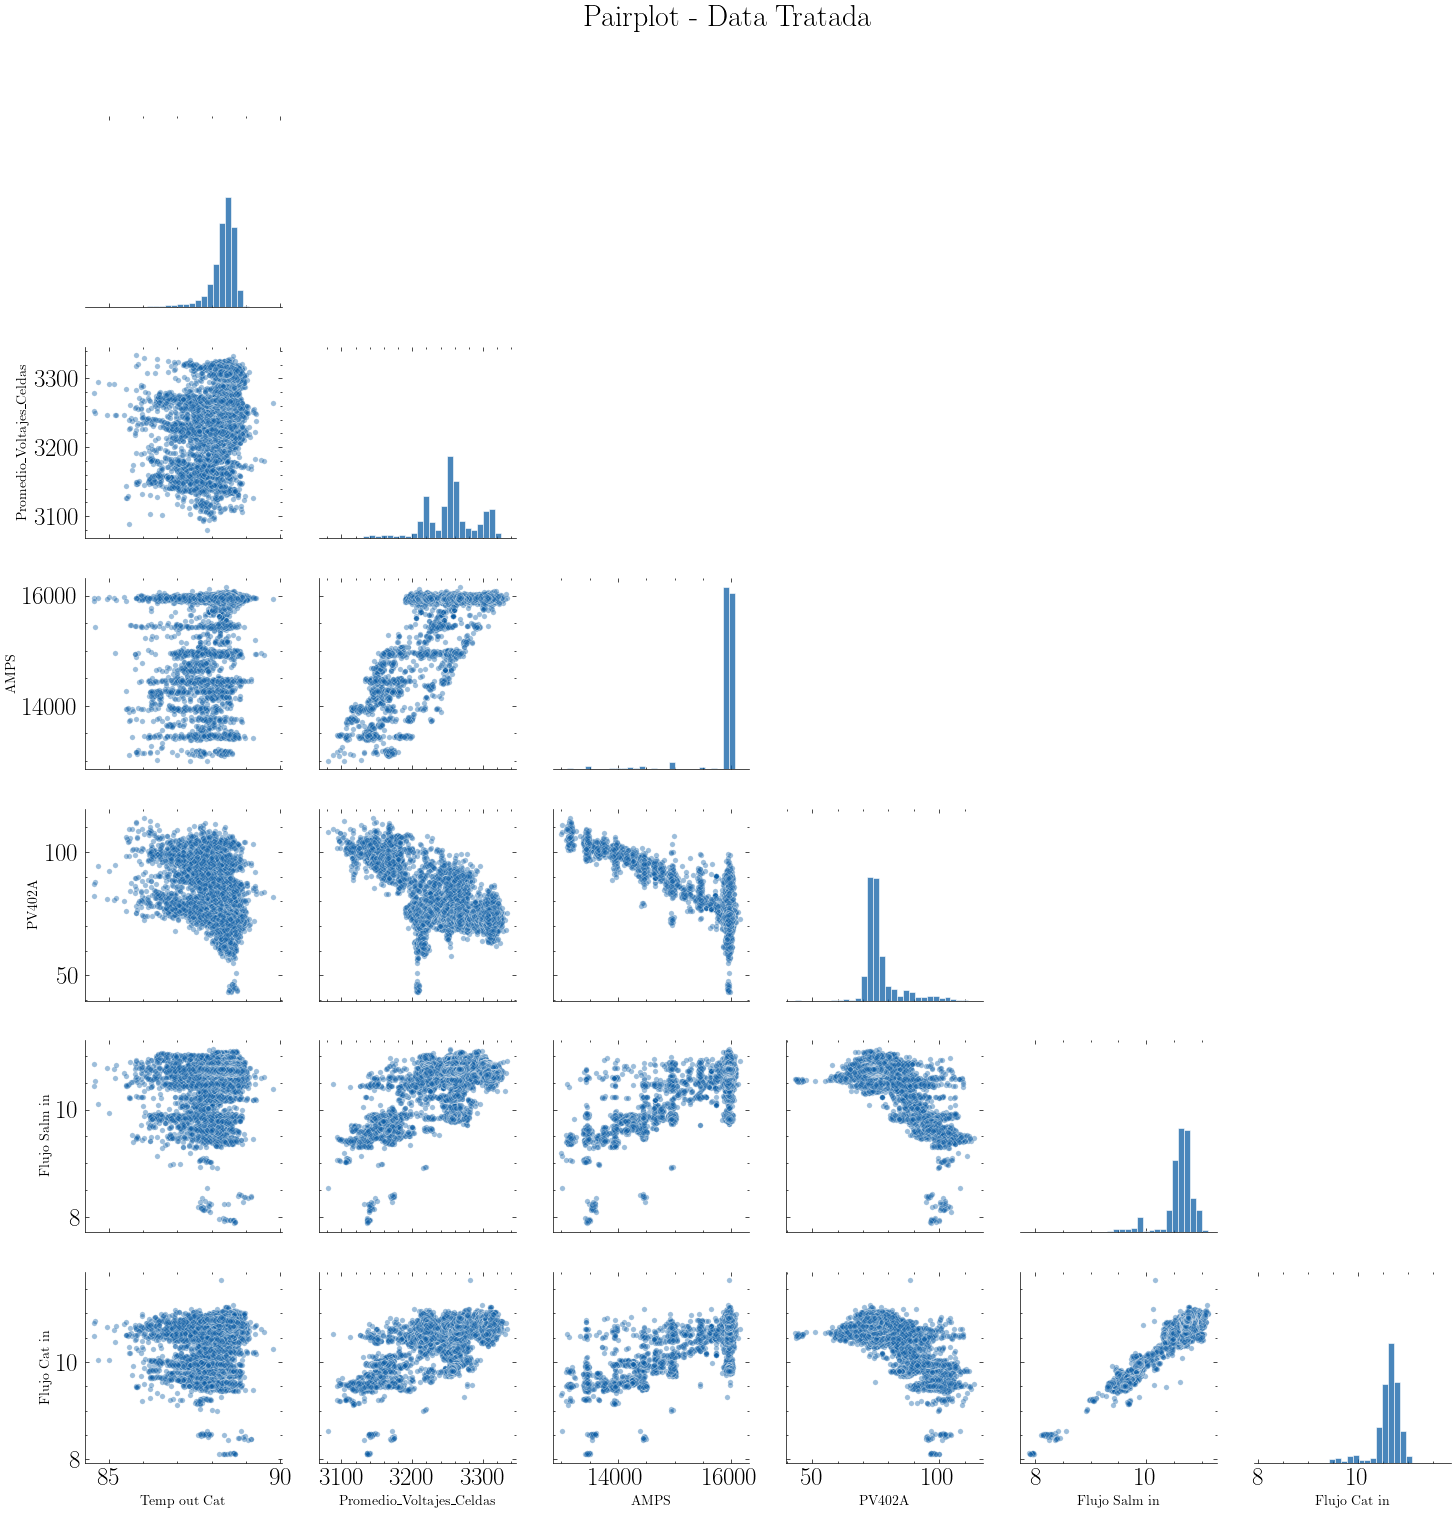

In [51]:
with sns.plotting_context(rc={"axes.labelsize": 10}):
    g = sns.pairplot(data=filtered_data_full[list(features_prom)],
                     diag_kind="hist", corner=True, diag_kws = {'bins':30, 'edgecolor':'white'},
                     plot_kws={'s': 15, 'alpha': 0.4, 'marker':'o'})

# Añadir título general
plt.suptitle("Pairplot - Data Tratada", y=1.02)
plt.tight_layout()
plt.show()

Soda 100% kg/h
Soda 100% kg/h            1.000000      
AMPS                      0.768494      
Flujo Salm in             0.729817      
Flujo Cat in              0.701136      
Voltaje_Celdas_PCA2       0.558539      
Promedio_Voltajes_Celdas  0.459718      
Temp out Cat              0.392483      
Voltaje_Celdas_PCA1       0.029059      
Voltaje_Celdas_PCA4      -0.006394      
Voltaje_Celdas_PCA3      -0.160475      
PV402A                   -0.803940

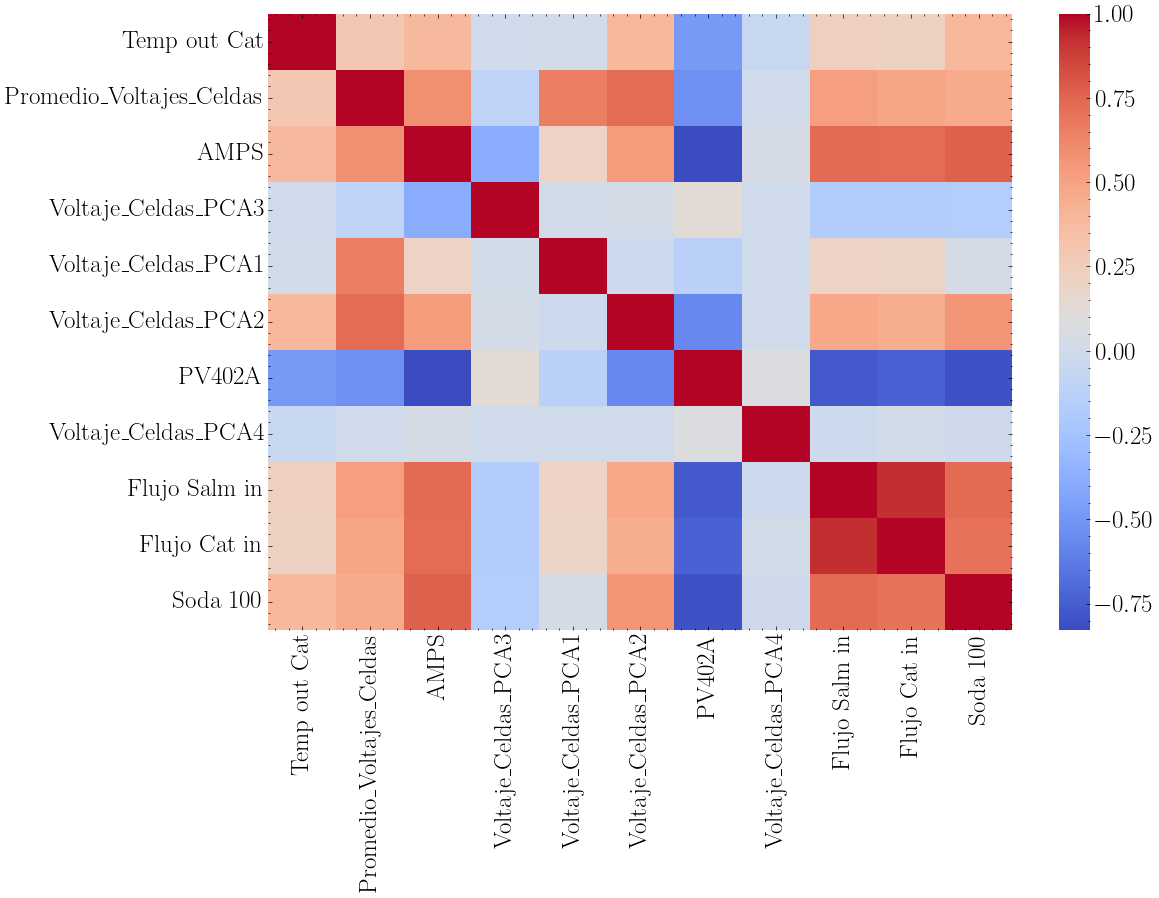

In [52]:
# Matriz de correlación
cor_data = filtered_data_full[list(features_prom | features_pca)].join(filtered_data_full['Soda 100% kg/h'])
corr_matrix = cor_data.corr()

# Correlación con la variable objetivo
target_corr = corr_matrix["Soda 100% kg/h"].sort_values(ascending=False)
display(pd.DataFrame(target_corr))

# Visualización de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", )
plt.show()

### Análisis de correlaciones lineales - features

**Variables con Correlación Positiva**

* AMPS (0.768): Existe una correlación positiva fuerte entre AMPS y la producción de Soda 100% kg/h. Un aumento en la corriente eléctrica está directamente relacionado con un aumento en la producción de soda cáustica.

* Flujo Salm in (0.729): El flujo de salmuera también tiene una correlación positiva fuerte con la variable objetivo. Un mayor flujo de entrada de salmuera está asociado con una mayor producción de soda.

* Flujo Cat in (0.701): Similar al flujo de salmuera, el flujo de entrada del cátodo tiene una correlación positiva alta con la producción de soda.

* Promedio Voltajes Celdas (0.459): Aunque la correlación es moderada, el promedio de voltajes en las celdas también tiene una relación positiva con la producción de soda. Aquí se refleja la importancia de mantener un voltaje óptimo para maximizar la eficiencia del proceso.

* Temp out Cat (0.392): La temperatura de salida del cátodo tiene una correlación positiva moderada. Esto sugiere que temperaturas adecuadas pueden estar relacionadas con una mayor producción de soda, aunque en menor medida que las otras variables.

**Variables con Correlación Negativa**

* PV402A (-0.804): Esta es la variable con la correlación negativa más fuerte respecto a la producción de soda. Un valor más alto de PV402A está relacionado con una menor producción de soda cáustica.

* Voltaje Celdas PCA2 (-0.559): La segunda componente principal del análisis de PCA muestra una correlación negativa moderada con la producción de soda. Esto sugiere que esta variable posiblemente capture variaciones específicas en los voltajes de las celdas.

* Voltaje Celdas PCA3 (-0.160) y Voltaje Celdas PCA1 (-0.029): Ambas componentes principales tienen una correlación negativa más débil con la producción de soda. Aunque no son tan influyentes como PV402A, pueden estar capturando ciertas dinámicas complejas dentro del proceso que afectan la producción de manera negativa.

* Voltaje Celdas PCA4 (0.006): Esta componente no muestra prácticamente ninguna correlación significativa con la producción de soda, lo que indica que no tiene un impacto relevante en la variable objetivo.

Las variables que están más fuertemente correlacionadas con la producción de soda son AMPS, Flujo Salm in, Flujo Cat in, y PV402A, esta última con una correlación negativa muy significativa. Este comportamiento sugiere que estas variables juegan un papel crucial en el proceso de producción de soda cáustica y deben ser consideradas cuidadosamente en el modelo predictivo. Las demás variables, aunque menos influyentes, pueden estar capturando aspectos más sutiles o indirectos del proceso.

---
# Modelado: Aprendizaje Supervisado
---

Para el aprendizaje automático, primero se divide el dataset en características y variable objetivo. Además, se divide en entrenamiento y testeo 80/20.


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Se definen las features (X) y variable objetivo (y)
X1 = filtered_data_full[list(features_prom)]
X2 = filtered_data_full[list(features_pca)]
y = filtered_data_full['Soda 100% kg/h']

# Se divide en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=seed, shuffle=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=seed, shuffle=True)

# Estandarización de los datos
scaler = MinMaxScaler()

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Se verifica la forma de los datasets
print(f"Prom Train shape: {X1_train.shape}, Test shape: {X1_test.shape}")
print(f"PCA Train shape: {X2_train.shape}, Test shape: {X2_test.shape}")

Prom Train shape: (18492, 6), Test shape: (4624, 6)
PCA Train shape: (18492, 9), Test shape: (4624, 9)


## Random Forest
Se comienza aplicando el algoritmo Random Forest debido a su robustez y facilidad de ajuste de parámetros.

MAE Random Forest Promedio: 8.902074193888703
R2 Random Forest Promedio: 0.8133928951784836

MAE Random Forest PCA: 8.520955987392291
R2 Random Forest PCA: 0.8267070915972827


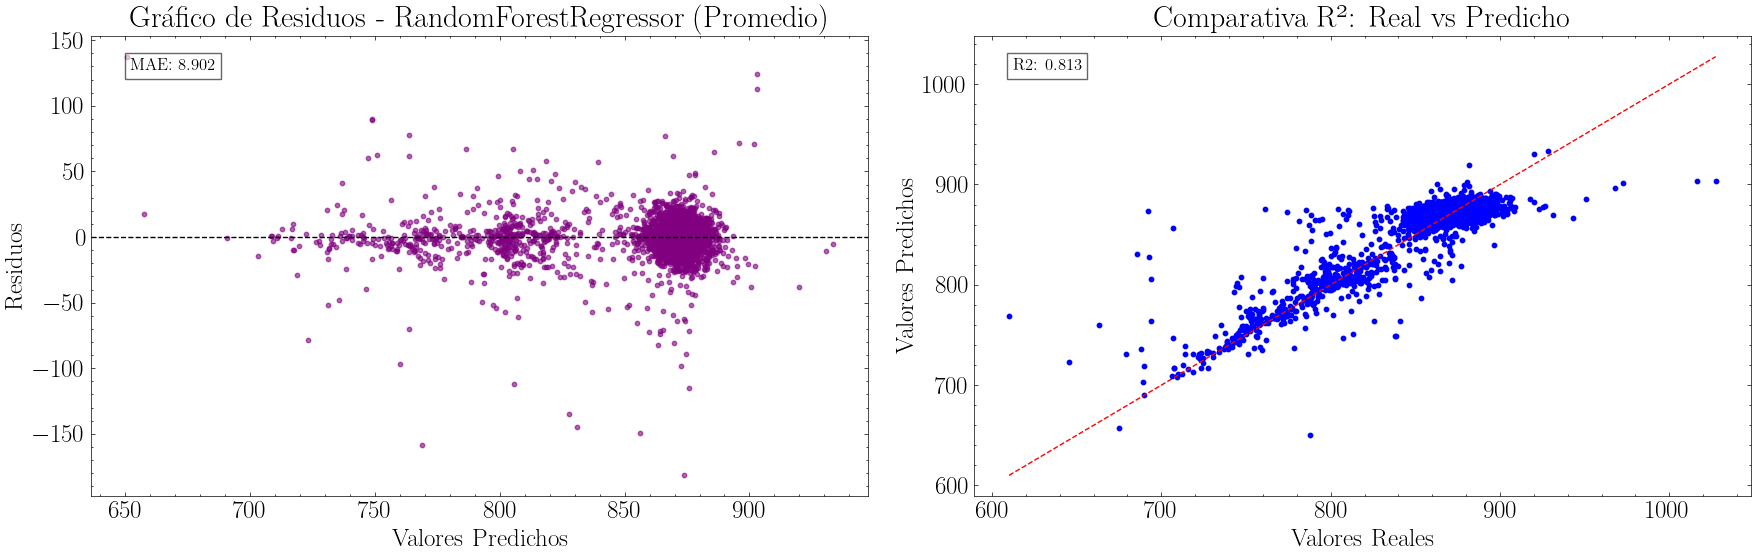

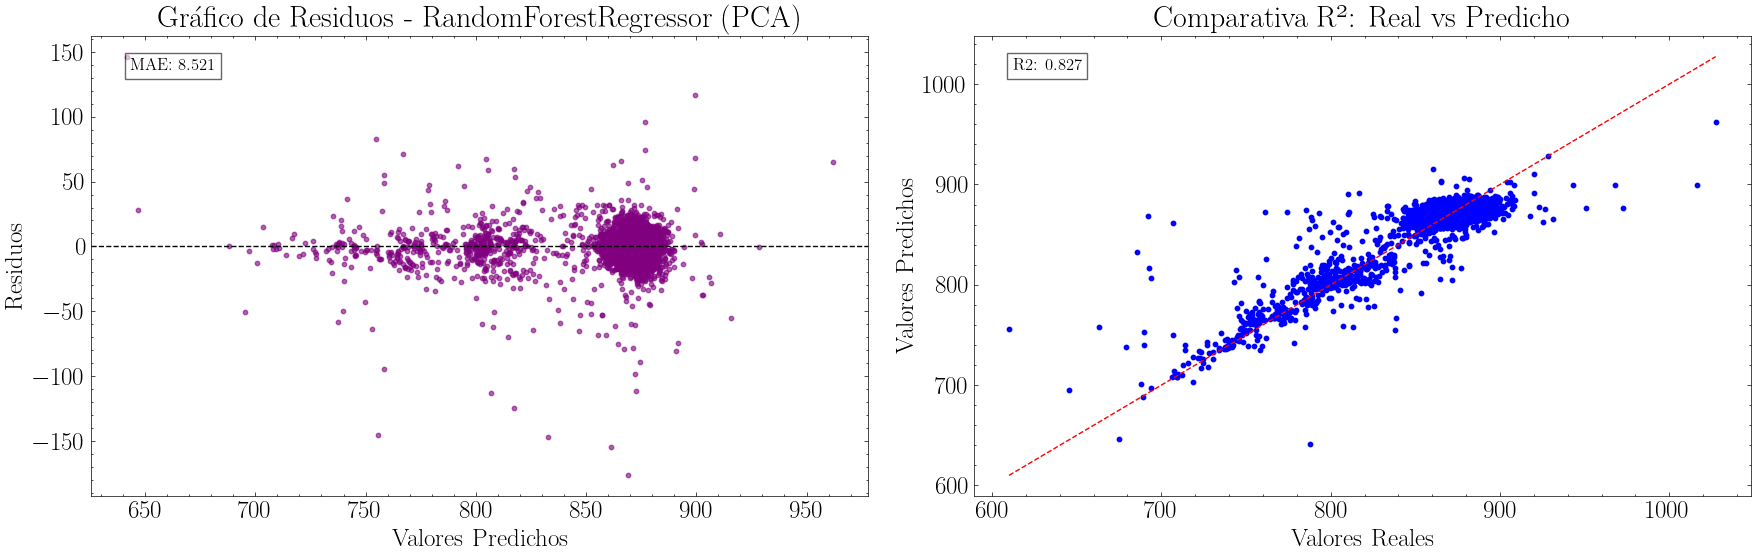

In [54]:
rf1 = RandomForestRegressor(n_estimators=100, random_state=seed)
rf2 = RandomForestRegressor(n_estimators=100, random_state=seed)

# Ajuste y predicciones
rf1.fit(X1_train, y1_train)
rf2.fit(X2_train, y2_train)
y_pred_rf1 = rf1.predict(X1_test)
y_pred_rf2 = rf2.predict(X2_test)

# Evaluación del modelo
mae_rf1 = mean_absolute_error(y1_test, y_pred_rf1)
r2_rf1 = r2_score(y1_test, y_pred_rf1)

print(f"MAE Random Forest Promedio: {mae_rf1}")
print(f"R2 Random Forest Promedio: {r2_rf1}")
print()

mae_rf2 = mean_absolute_error(y2_test, y_pred_rf2)
r2_rf2 = r2_score(y2_test, y_pred_rf2)
print(f"MAE Random Forest PCA: {mae_rf2}")
print(f"R2 Random Forest PCA: {r2_rf2}")

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos = y1_test - y_pred_rf1
ax1.scatter(y_pred_rf1, residuos, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - RandomForestRegressor (Promedio)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_rf1:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R² entre los valores reales y predichos
ax2.scatter(y1_test, y_pred_rf1, c='blue', s=10, label="Predicciones")
ax2.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_rf1:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos2 = y2_test - y_pred_rf2
ax1.scatter(y_pred_rf2, residuos2, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - RandomForestRegressor (PCA)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_rf2:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R2 entre los valores reales y predichos
ax2.scatter(y2_test, y_pred_rf2, c='blue', s=10, label="Predicciones")
ax2.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_rf2:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

Random Forest permite visualizar la importancia de las variables:

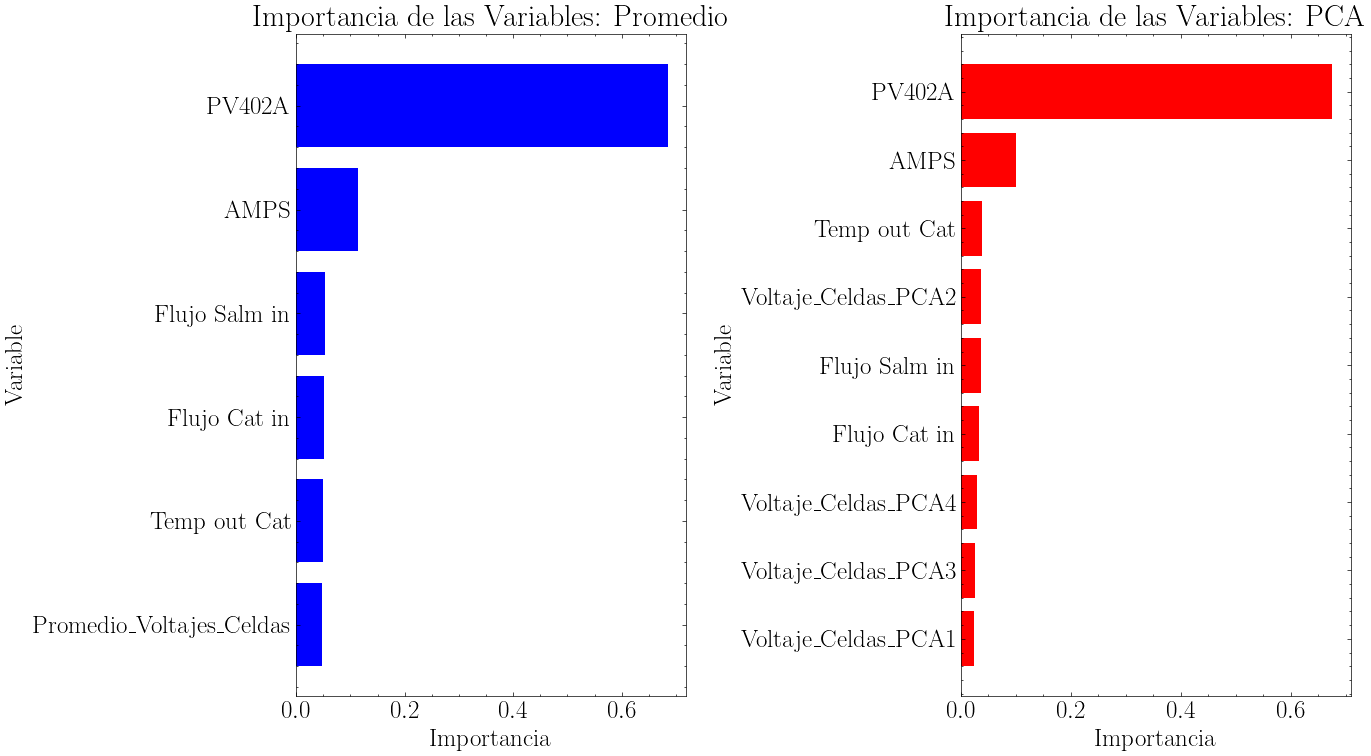

In [55]:
importances1 = rf1.feature_importances_
feature_names1 = X1_train.columns
feature_importance_df1 = pd.DataFrame({'Feature': feature_names1, 'Importance': importances1}).sort_values(by='Importance', ascending=False)

importances2 = rf2.feature_importances_
feature_names2 = X2_train.columns
feature_importance_df2 = pd.DataFrame({'Feature': feature_names2, 'Importance': importances2}).sort_values(by='Importance', ascending=False)

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

# Gráfico de la importancia de las variables para el modelo Promedio
ax1.barh(feature_importance_df1['Feature'], feature_importance_df1['Importance'], color='b')
ax1.set_xlabel('Importancia')
ax1.set_ylabel('Variable')
ax1.set_title('Importancia de las Variables: Promedio')
ax1.invert_yaxis()  # Para que las barras más importantes aparezcan arriba

# Gráfico de la importancia de las variables para el modelo PCA
ax2.barh(feature_importance_df2['Feature'], feature_importance_df2['Importance'], color='r')
ax2.set_xlabel('Importancia')
ax2.set_ylabel('Variable')
ax2.set_title('Importancia de las Variables: PCA')
ax2.invert_yaxis()  # Para que las barras más importantes aparezcan arriba

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
plt.show()

Se observa una importancia bastante alta de la variable PV402A. Se evalúa el modelo con PCA (mejor desempeño) pero sin esta característica:

In [56]:
features_pca_402 = features_pca - {'PV402A'}
print(features_pca_402)

{'Temp out Cat', 'AMPS', 'Voltaje_Celdas_PCA3', 'Voltaje_Celdas_PCA1', 'Voltaje_Celdas_PCA2', 'Voltaje_Celdas_PCA4', 'Flujo Salm in', 'Flujo Cat in'}


Train shape: (18492, 8), Test shape: (4624, 8)
MAE Random Forest Promedio: 8.457689570642005
R2 Random Forest Promedio: 0.8272970979983798


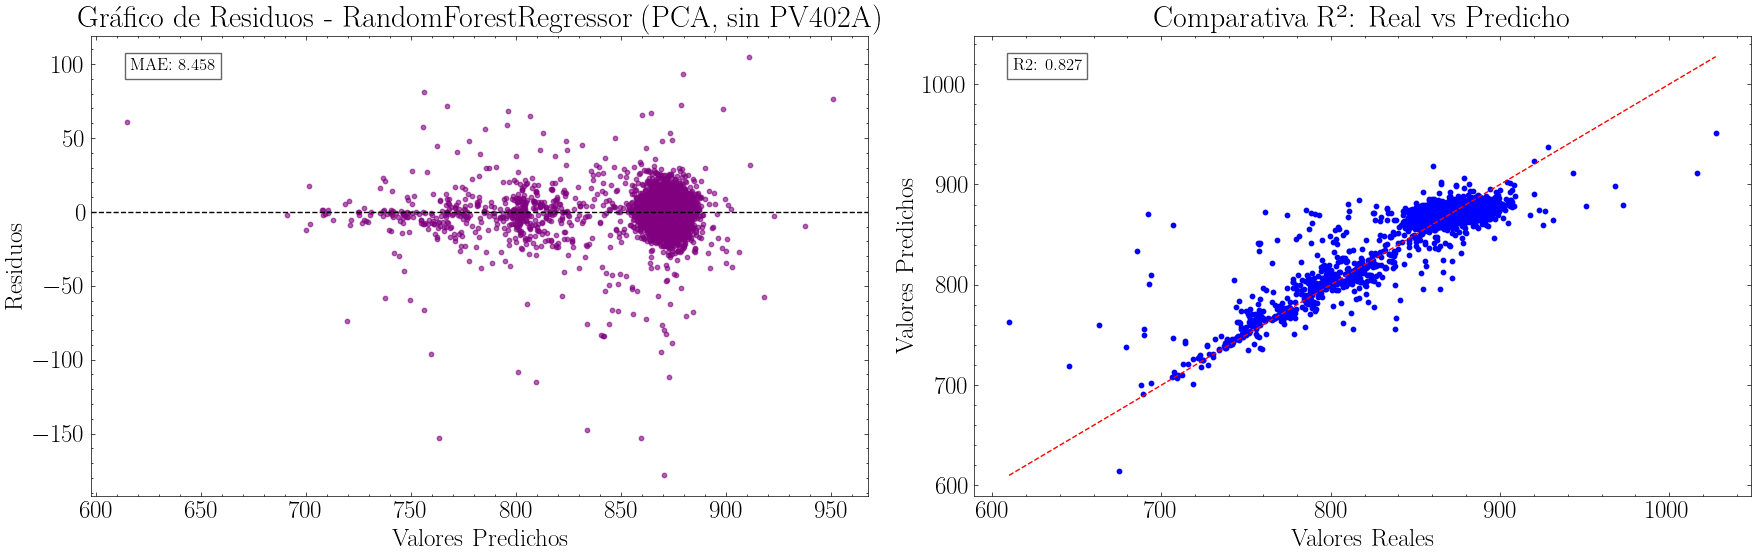

In [57]:
X3 = filtered_data_full[list(features_pca_402)]

# Se divide en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=seed, shuffle=True)

# Estandarización de los datos
scaler = MinMaxScaler()

X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

# Se verifica la forma de los datasets
print(f"Train shape: {X3_train.shape}, Test shape: {X3_test.shape}")

rf3 = RandomForestRegressor(n_estimators=100, random_state=seed)

# Ajuste y predicciones
rf3.fit(X3_train, y3_train)
y_pred_rf3 = rf3.predict(X3_test)

# Evaluación del modelo
mae_rf3 = mean_absolute_error(y3_test, y_pred_rf3)
r2_rf3 = r2_score(y3_test, y_pred_rf3)

print(f"MAE Random Forest Promedio: {mae_rf3}")
print(f"R2 Random Forest Promedio: {r2_rf3}")

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos3 = y3_test - y_pred_rf3
ax1.scatter(y_pred_rf3, residuos3, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - RandomForestRegressor (PCA, sin PV402A)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_rf3:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R² entre los valores reales y predichos
ax2.scatter(y3_test, y_pred_rf3, c='blue', s=10, label="Predicciones")
ax2.plot([min(y3_test), max(y3_test)], [min(y3_test), max(y3_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_rf3:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


Feature               Importance
6        Flujo Salm in  0.576221  
1                 AMPS  0.146661  
7         Flujo Cat in  0.066446  
5  Voltaje_Celdas_PCA4  0.060049  
4  Voltaje_Celdas_PCA2  0.049445  
0         Temp out Cat  0.042063  
2  Voltaje_Celdas_PCA3  0.030187  
3  Voltaje_Celdas_PCA1  0.028928

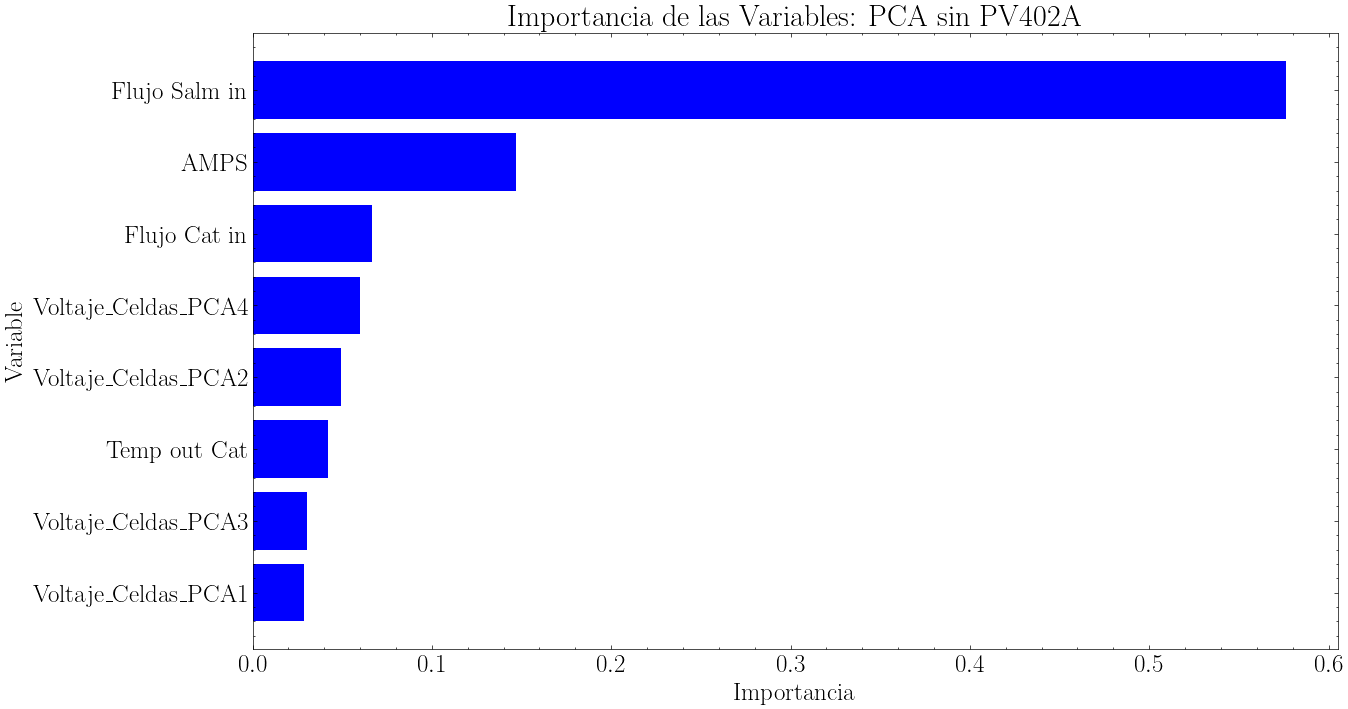

In [59]:
importances3 = rf3.feature_importances_
feature_names3 = X3_train.columns
feature_importance_df3 = pd.DataFrame({'Feature': feature_names3, 'Importance': importances3}).sort_values(by='Importance', ascending=False)

# Crear la figura con dos subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de la importancia de las variables para el modelo PCA sin PV402A
ax.barh(feature_importance_df3['Feature'], feature_importance_df3['Importance'], color='b')
ax.set_xlabel('Importancia')
ax.set_ylabel('Variable')
ax.set_title('Importancia de las Variables: PCA sin PV402A')
ax.invert_yaxis()  # Para que las barras más importantes aparezcan arriba
display(feature_importance_df3)

La importancia de las variables restantes se ha redistribuido, indicando que PV402A dominaba en exceso la contribución al modelo, lo que hacía que otras variables tuvieran menos peso.

**Flujo Salm in** y **AMPS** ahora destacan como las variables más relevantes, lo cual es coherente con su importancia dentro del proceso de producción.

Al eliminar la variable PV402:

* MAE: Se redujo ligeramente, lo que sugiere que el modelo es más preciso en la predicción sin PV402A.
* R² (Coeficiente de Determinación): También aumentó, lo que indica que el modelo tiene una mejor capacidad explicativa.

Parece razonable mantener la eliminación de PV402A, ya que mejora el rendimiento del modelo y evita la posible sobrecarga de una única variable en la predicción. Este ajuste también permite que otras variables jueguen un papel más significativo en el análisis.

**Optimización de Hiperparámetros**

RandomizedSearchCV

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# Se mantienen solamente las características PCA sin PV402A
X_train = X3_train
X_test = X3_test
y_train = y3_train
y_test = y3_test

# Definir los parámetros a optimizar
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el modelo base
rf = RandomForestRegressor(random_state=seed)

# Implementar RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, verbose=2, random_state=seed, n_jobs=-1,
                                   scoring='neg_mean_absolute_error')

# Ajustar el modelo
random_search_rf.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_random = random_search_rf.best_estimator_

# Predecir en el conjunto de prueba
y_pred_rf_random = best_rf_random.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_rf_random = mean_absolute_error(y_test, y_pred_rf_random)
r2_rf_random = r2_score(y_test, y_pred_rf_random)

print(f"Mejor MAE: {mae_rf_random}")
print(f"Mejor R2: {r2_rf_random}")
print(f"Mejores parámetros: {random_search_rf.best_params_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejor MAE: 8.785116877694916
Mejor R2: 0.8228505349207718
Mejores parámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}




---



BayesSearchCV

In [62]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Integer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.3 MB/s eta 0:00:00


In [63]:
# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'n_estimators': Integer(100, 400),
    'max_depth': Integer(10, 30),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4),
    'bootstrap': [True, False]
}

# Implementar BayesSearchCV
bayes_search_rf = BayesSearchCV(estimator=rf, search_spaces=param_space,
                             n_iter=10, cv=5, verbose=2, n_jobs=-1,
                            scoring='neg_mean_absolute_error', random_state=seed)

# Ajustar el modelo
bayes_search_rf.fit(X_train, y_train)

# Obtener el mejor modelo
best_rf_bayes = bayes_search_rf.best_estimator_

# Predecir en el conjunto de prueba
y_pred_rf_bayes = best_rf_bayes.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_rf_bayes = mean_absolute_error(y_test, y_pred_rf_bayes)
r2_rf_bayes = r2_score(y_test, y_pred_rf_bayes)

print(f"Mejor MAE: {mae_rf_bayes}")
print(f"Mejor R2: {r2_rf_bayes}")
print(f"Mejores parámetros: {bayes_search_rf.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejor MAE: 8.583814346393734
Mejor R2: 0.8276512976638395
Mejores parámetros: OrderedDict([('bootstrap', True), ('max_depth', 26), ('min_samples_leaf', 3), ('min_samples_split', 4), ('n_estimators', 274)])


Se mantienen los hiperparámetros con mejores métricas:

MAE RandomForest: 8.59622426846954
R2 RandomForest: 0.8275151552166101


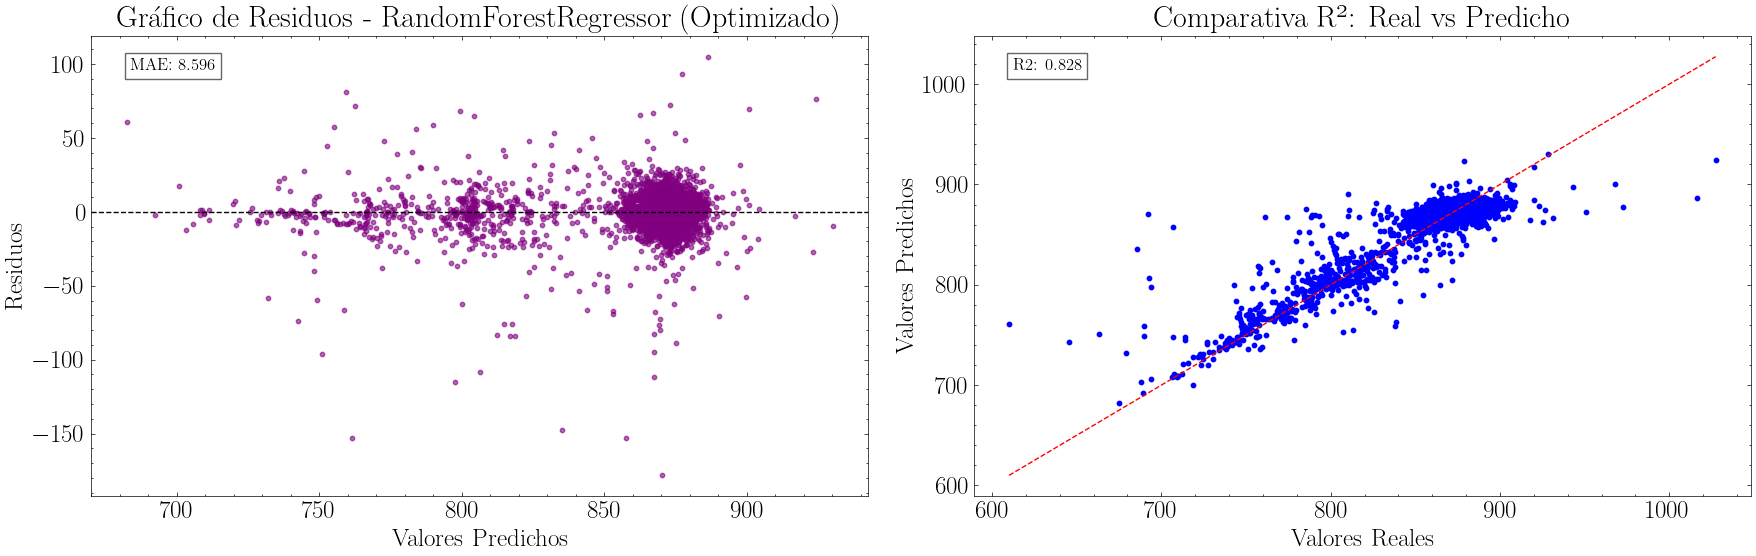

In [64]:
# Crear el modelo base
rf = RandomForestRegressor(n_estimators=274, min_samples_split=4 , min_samples_leaf=3, max_depth=26, bootstrap=True)

# Ajustar el modelo
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE RandomForest: {mae_rf}")
print(f"R2 RandomForest: {r2_rf}")

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos_rf = y_test - y_pred_rf
ax1.scatter(y_pred_rf, residuos3, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - RandomForestRegressor (Optimizado)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_rf:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R² entre los valores reales y predichos
ax2.scatter(y_test, y_pred_rf, c='blue', s=10, label="Predicciones")
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_rf:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


Feature               Importance
6        Flujo Salm in  0.585822  
1                 AMPS  0.150747  
7         Flujo Cat in  0.085184  
5  Voltaje_Celdas_PCA4  0.052964  
4  Voltaje_Celdas_PCA2  0.044136  
0         Temp out Cat  0.033597  
2  Voltaje_Celdas_PCA3  0.024840  
3  Voltaje_Celdas_PCA1  0.022709

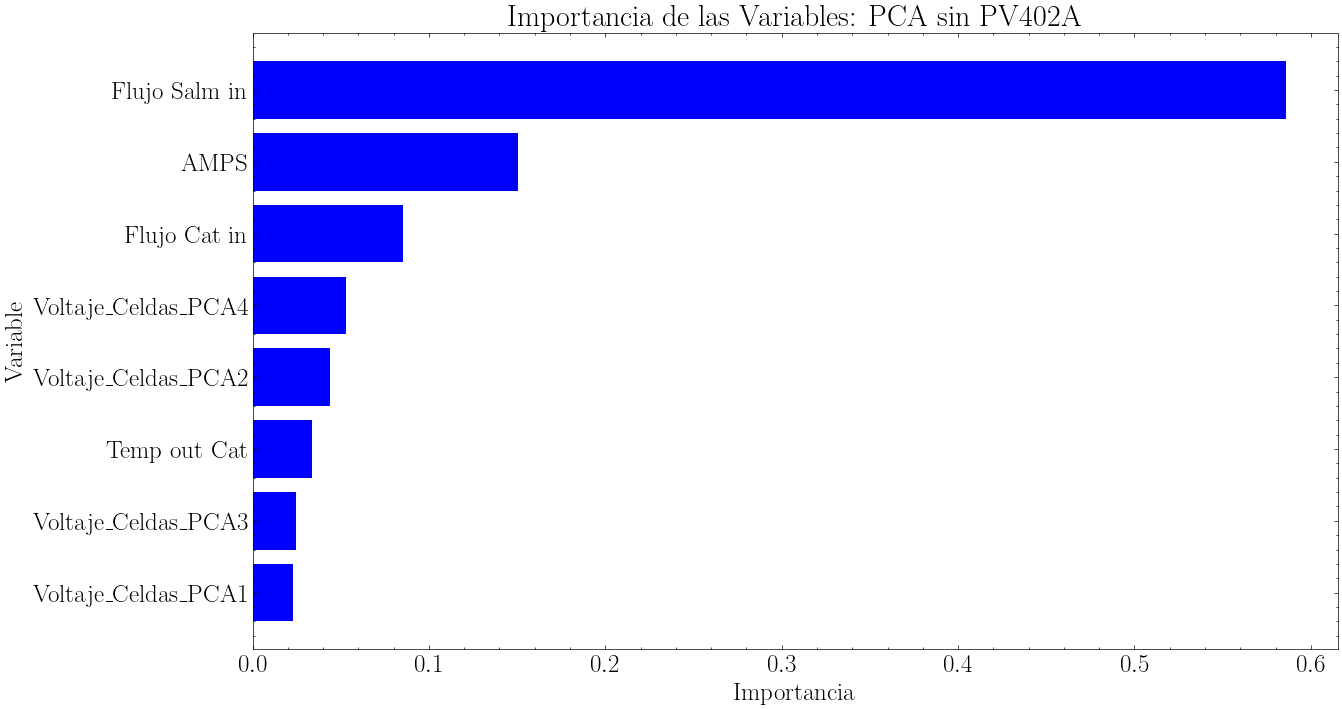

In [65]:
importances_rf = rf.feature_importances_
feature_names_rf = X_train.columns
feature_importance_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

# Crear la figura con dos subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de la importancia de las variables para el modelo PCA sin PV402A
ax.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='b')
ax.set_xlabel('Importancia')
ax.set_ylabel('Variable')
ax.set_title('Importancia de las Variables: PCA sin PV402A')
ax.invert_yaxis()  # Para que las barras más importantes aparezcan arriba
display(feature_importance_rf)

Como una primera predicción, se observan resultados bastante similares a los datos originales. Se probarán más métodos de aprendizaje automático supervisado y compararán las métricas de validación cruzada MAE para determinar cuál es el más efectivo.

Se utilizarán las features con el PCA de voltaje de celdas por su mejor desempeño.

## Gradient Boosting Regressor

**Optimización de Hiperparámetros**

RandomizedSearchCV

In [66]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# Definir los parámetros a optimizar para GBR
param_dist_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo base
gbr = GradientBoostingRegressor(random_state=seed)

# Implementar RandomizedSearchCV para GBR
random_search_gbr = RandomizedSearchCV(estimator=gbr, param_distributions=param_dist_gbr,
                                   n_iter=5, cv=5, verbose=2, random_state=seed, n_jobs=-1,
                                   scoring='neg_mean_absolute_error')

# Ajustar el modelo
random_search_gbr.fit(X_train, y_train)

# Obtener el mejor modelo
best_gbr_random = random_search_gbr.best_estimator_

# Predecir en el conjunto de prueba
y_pred_gbr_random = best_gbr_random.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_gbr_random = mean_absolute_error(y_test, y_pred_gbr_random)
r2_gbr_random = r2_score(y_test, y_pred_gbr_random)

print(f"Mejor MAE: {mae_gbr_random}")
print(f"Mejor R2: {r2_gbr_random}")
print(f"Mejores parámetros: {random_search_gbr.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejor MAE: 9.081652605485854
Mejor R2: 0.8244037342285794
Mejores parámetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}

In [ ]:
# Optimización con BayesSearchCV para GBR
param_space_gbr = {
    'n_estimators': Integer(100, 400),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': Integer(3, 10),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4)
}

# Implementar BayesSearchCV
bayes_search_gbr = BayesSearchCV(estimator=gbr, search_spaces=param_space_gbr,
                             n_iter=10, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=seed)

# Ajustar el modelo
bayes_search_gbr.fit(X_train, y_train)

# Obtener el mejor modelo
best_gbr_bayes = bayes_search_gbr.best_estimator_

# Predecir en el conjunto de prueba
y_pred_gbr_bayes = best_gbr_bayes.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_gbr_bayes = mean_absolute_error(y_test, y_pred_gbr_bayes)
r2_gbr_bayes = r2_score(y_test, y_pred_gbr_bayes)

print(f"Mejor MAE: {mae_gbr_bayes}")
print(f"Mejor R2: {r2_gbr_bayes}")
print(f"Mejores parámetros: {bayes_search_gbr.best_params_}")

Mejor MAE: 9.037902487892993
Mejor R2: 0.8185071320194567
Mejores parámetros: OrderedDict([('learning_rate', 0.05), ('max_depth', 9), ('min_samples_leaf', 2), ('min_samples_split', 9), ('n_estimators', 197)])

Se toman los mejores hiperparámetros:

MAE GradientBoosting: 9.038071903643665
R2 GradientBoosting: 0.8186704168139294


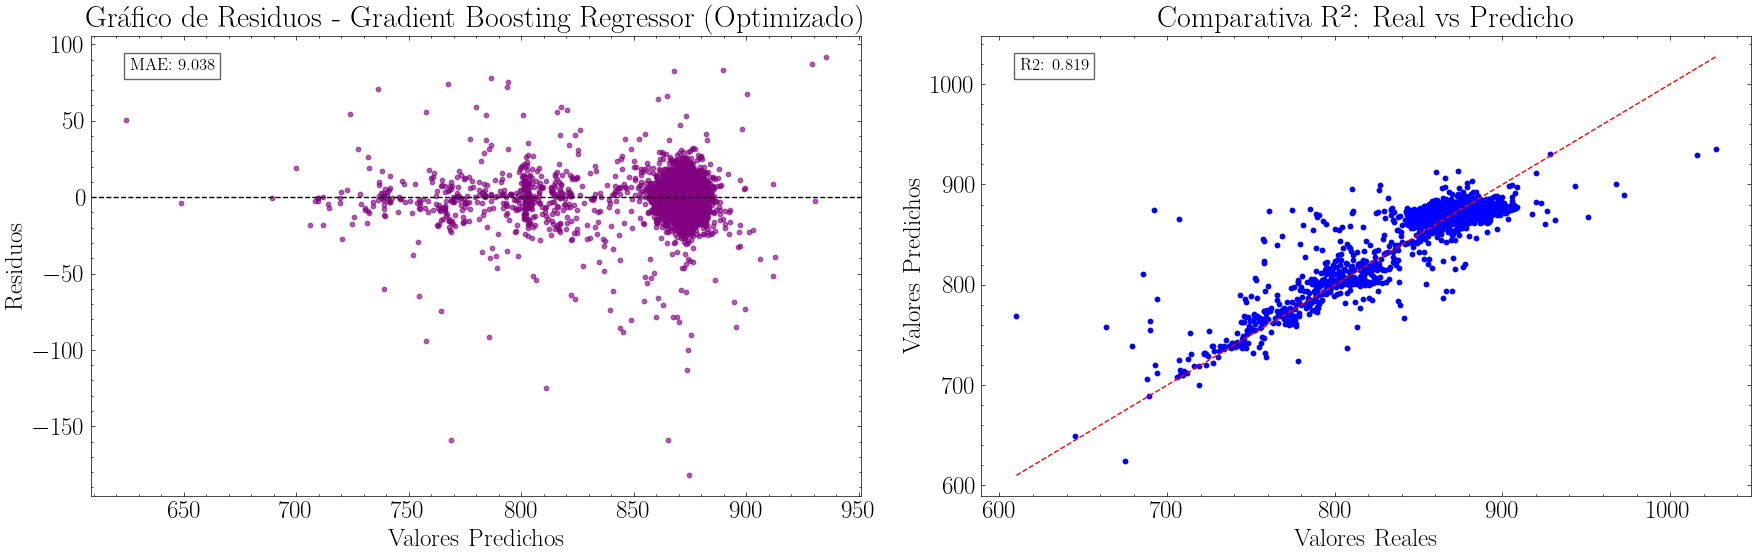

In [68]:
# Mantener los mejores hiperparámetros con Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=197,
                                learning_rate=0.05,
                                max_depth=9,
                                min_samples_split=9,
                                min_samples_leaf=2)

# Ajustar el modelo final
gbr.fit(X_train, y_train)

# Predicciones
y_pred_gbr = gbr.predict(X_test)

# Evaluar el modelo
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"MAE GradientBoosting: {mae_gbr}")
print(f"R2 GradientBoosting: {r2_gbr}")

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos_gbr = y_test - y_pred_gbr
ax1.scatter(y_pred_gbr, residuos_gbr, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - Gradient Boosting Regressor (Optimizado)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_gbr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R² entre los valores reales y predichos
ax2.scatter(y_test, y_pred_gbr, c='blue', s=10, label="Predicciones")
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_gbr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


Feature               Importance
6        Flujo Salm in  0.638390  
1                 AMPS  0.143370  
5  Voltaje_Celdas_PCA4  0.052831  
4  Voltaje_Celdas_PCA2  0.049225  
7         Flujo Cat in  0.037247  
0         Temp out Cat  0.033011  
2  Voltaje_Celdas_PCA3  0.025011  
3  Voltaje_Celdas_PCA1  0.020914

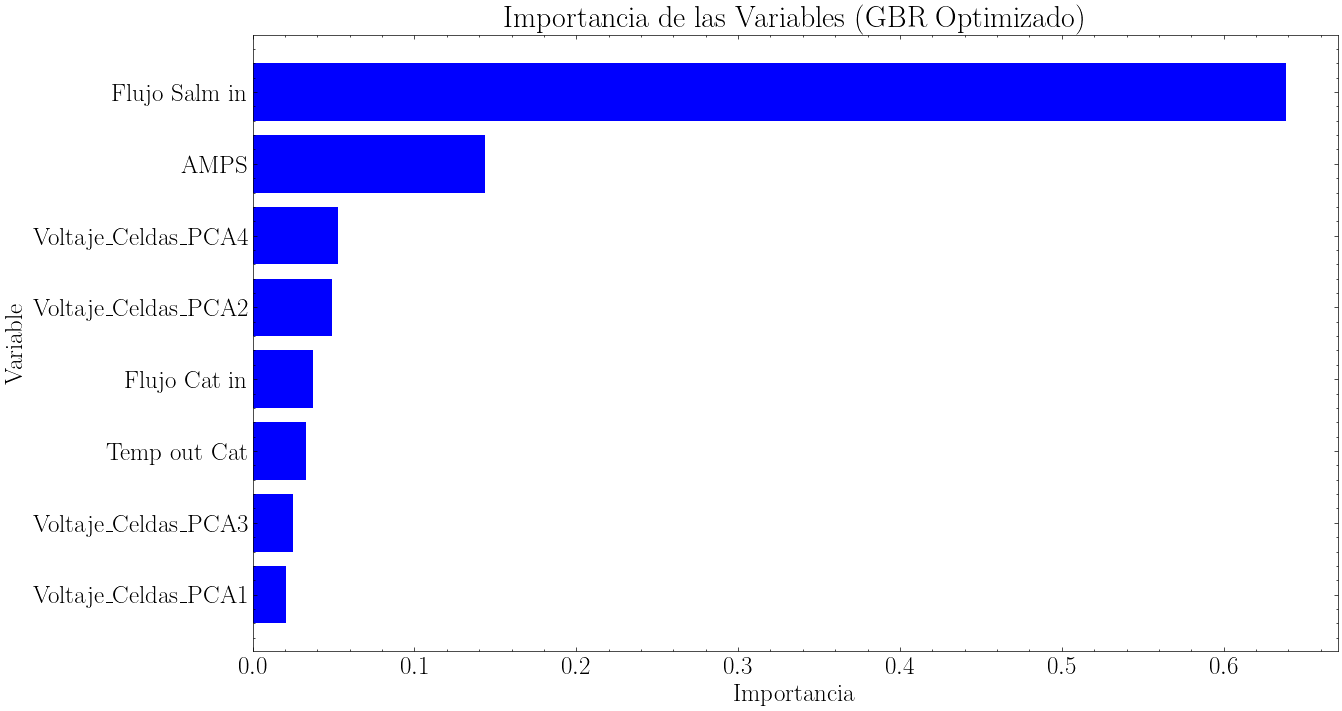

In [69]:
importances_gbr = gbr.feature_importances_
feature_names_gbr = X_train.columns
feature_importance_gbr = pd.DataFrame({'Feature': feature_names_gbr, 'Importance': importances_gbr}).sort_values(by='Importance', ascending=False)

# Crear la figura con dos subplots
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de la importancia de las variables para el modelo PCA sin PV402A
ax.barh(feature_importance_gbr['Feature'], feature_importance_gbr['Importance'], color='b')
ax.set_xlabel('Importancia')
ax.set_ylabel('Variable')
ax.set_title('Importancia de las Variables (GBR Optimizado)')
ax.invert_yaxis()  # Para que las barras más importantes aparezcan arriba
display(feature_importance_gbr)

## LightGBM

**Optimización de Hiperparámetros**

In [70]:
import lightgbm as lgb

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Definir los parámetros a optimizar para LightGBM
param_dist_lgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.07, 0.1],
    'max_depth': [3, 5, 7],
    'min_data_in_leaf': [1, 2, 4],
    'num_leaves': [10, 20, 30]
}

# Crear el modelo base
lgbm = lgb.LGBMRegressor(random_state=seed)

# Implementar RandomizedSearchCV para LightGBM
random_search_lgb = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist_lgb,
                                       n_iter=50, cv=5, verbose=2, random_state=seed, n_jobs=-1,
                                       scoring='neg_mean_absolute_error')

# Ajustar el modelo
random_search_lgb.fit(X_train, y_train)

# Obtener el mejor modelo
best_lgb_random = random_search_lgb.best_estimator_

# Predecir en el conjunto de prueba
y_pred_lgb_random = best_lgb_random.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_lgb_random = mean_absolute_error(y_test, y_pred_lgb_random)
r2_lgb_random = r2_score(y_test, y_pred_lgb_random)

print("RSCV \n")
print(f"Mejor MAE: {mae_lgb_random}")
print(f"Mejor R2: {r2_lgb_random}")
print(f"Mejores parámetros: {random_search_lgb.best_params_}")

# Optimización con BayesSearchCV para LightGBM
param_space_lgb = {
    'n_estimators': Integer(100, 500),
    'learning_rate': [0.01, 0.05, 0.07, 0.1],
    'max_depth': Integer(3, 10),
    'min_data_in_leaf': Integer(1, 4),
    'num_leaves': Integer(10, 31)
}

# Implementar BayesSearchCV
bayes_search_lgb = BayesSearchCV(estimator=lgbm, search_spaces=param_space_lgb,
                                 n_iter=50, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=seed)

# Ajustar el modelo
bayes_search_lgb.fit(X_train, y_train)

# Obtener el mejor modelo
best_lgb_bayes = bayes_search_lgb.best_estimator_

# Predecir en el conjunto de prueba
y_pred_lgb_bayes = best_lgb_bayes.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_lgb_bayes = mean_absolute_error(y_test, y_pred_lgb_bayes)
r2_lgb_bayes = r2_score(y_test, y_pred_lgb_bayes)
print("\nBSCV: \n")

print(f"Mejor MAE: {mae_lgb_bayes}")
print(f"Mejor R2: {r2_lgb_bayes}")
print(f"Mejores parámetros: {bayes_search_lgb.best_params_}")

BSCV:

Mejor MAE: 8.956345205313845
Mejor R2: 0.8240699984909066
Mejores parámetros: {'num_leaves': 20, 'n_estimators': 500, 'min_data_in_leaf': 2, 'max_depth': 7, 'learning_rate': 0.1}

[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 18492, number of used features: 8
[LightGBM] [Info] Start training from score 861.449059
[LightGBM] [Warning] min_data_in_leaf is set=2, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=2
MAE LightGBM: 8.955048780991424
R2 LightGBM: 0.824035327574748


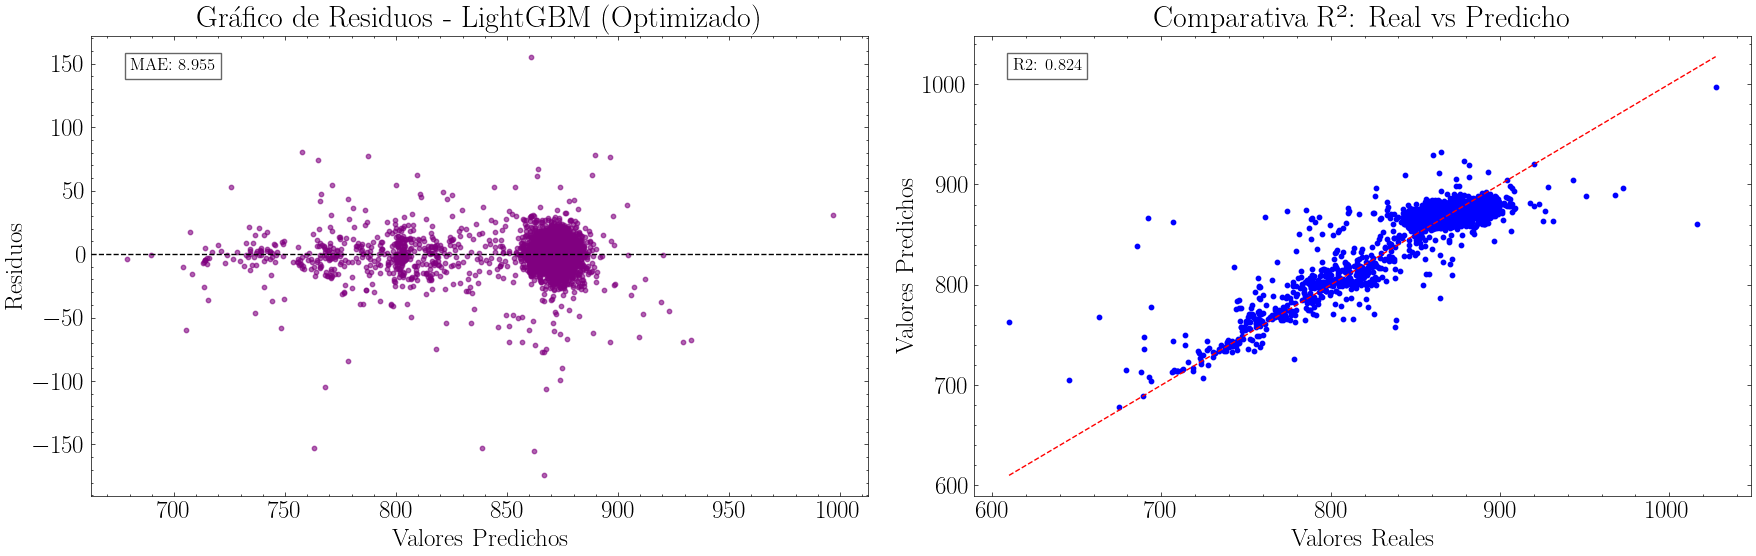

In [71]:
# Mantener los mejores hiperparámetros con LightGBM
lgbm = lgb.LGBMRegressor(n_estimators=500,
                         learning_rate=0.1,
                         max_depth=7,
                         min_data_in_leaf=2,
                         num_leaves=20)

# Ajustar el modelo final
lgbm.fit(X_train, y_train)

# Predicciones
y_pred_lgb = lgbm.predict(X_test)

# Evaluar el modelo
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"MAE LightGBM: {mae_lgb}")
print(f"R2 LightGBM: {r2_lgb}")

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos_lgb = y_test - y_pred_lgb
ax1.scatter(y_pred_lgb, residuos_lgb, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - LightGBM (Optimizado)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_lgb:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R² entre los valores reales y predichos
ax2.scatter(y_test, y_pred_lgb, c='blue', s=10, label="Predicciones")
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_lgb:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

## XGBoost

In [72]:
import xgboost as xgb

In [ ]:
# Definir los parámetros a optimizar para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2, 4]
}

# Crear el modelo base
xgb_model = xgb.XGBRegressor(random_state=seed)

# Implementar RandomizedSearchCV para XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb,
                                       n_iter=50, cv=5, verbose=2, random_state=seed, n_jobs=-1,
                                       scoring='neg_mean_absolute_error')

# Ajustar el modelo
random_search_xgb.fit(X_train, y_train)

# Obtener el mejor modelo
best_xgb_random = random_search_xgb.best_estimator_

# Predecir en el conjunto de prueba
y_pred_xgb_random = best_xgb_random.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_xgb_random = mean_absolute_error(y_test, y_pred_xgb_random)
r2_xgb_random = r2_score(y_test, y_pred_xgb_random)
print("RSCV:")
print(f"Mejor MAE: {mae_xgb_random}")
print(f"Mejor R2: {r2_xgb_random}")
print(f"Mejores parámetros: {random_search_xgb.best_params_}")

# Optimización con BayesSearchCV para XGBoost
param_space_xgb = {
    'n_estimators': Integer(100, 500),
    'learning_rate': Real(0.01, 0.1, prior='log-uniform'),
    'max_depth': Integer(3, 7),
    'min_child_weight': Integer(1, 4),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0, 0.3),
    'reg_alpha': Real(0, 1.0),
    'reg_lambda': Real(1, 4)
}

# Implementar BayesSearchCV
bayes_search_xgb = BayesSearchCV(estimator=xgb_model, search_spaces=param_space_xgb,
                                 n_iter=50, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=seed)

# Ajustar el modelo
bayes_search_xgb.fit(X_train, y_train)

# Obtener el mejor modelo
best_xgb_bayes = bayes_search_xgb.best_estimator_

# Predecir en el conjunto de prueba
y_pred_xgb_bayes = best_xgb_bayes.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_xgb_bayes = mean_absolute_error(y_test, y_pred_xgb_bayes)
r2_xgb_bayes = r2_score(y_test, y_pred_xgb_bayes)
print("\nBSCV:")
print(f"Mejor MAE: {mae_xgb_bayes}")
print(f"Mejor R2: {r2_xgb_bayes}")
print(f"Mejores parámetros: {bayes_search_xgb.best_params_}")

BSCV:
Mejor MAE: 8.828226260367687
Mejor R2: 0.8265453351441572
Mejores parámetros: OrderedDict([('colsample_bytree', 0.7659484817473701), ('gamma', 0.3), ('learning_rate', 0.06161109487854126), ('max_depth', 7), ('min_child_weight', 1), ('n_estimators', 462), ('reg_alpha', 0.384438999645825), ('reg_lambda', 4.0), ('subsample', 0.8730934444332932)])

MAE XGBoost: 8.87448570626525
R2 XGBoost: 0.8245624664069481


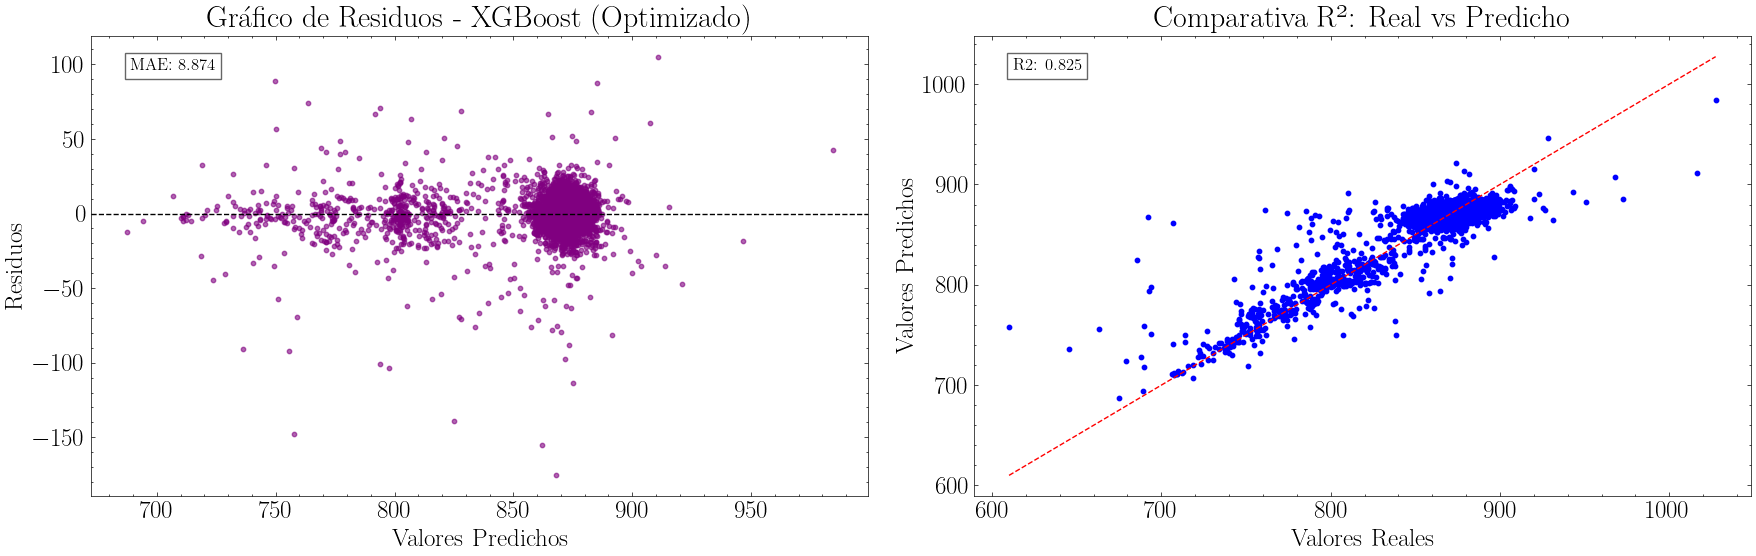

In [73]:
# Mantener los mejores hiperparámetros con XGBoost
xgb_model = xgb.XGBRegressor(colsample_bytree=0.7659484817473701,
                             gamma=0.3,
                             learning_rate=0.06161109487854126,
                             max_depth=7,
                             min_child_weight=1,
                             n_estimators=462,
                             reg_alpha=0.384438999645825,
                             reg_lambda=4.0,
                             subsample=0.8730934444332932)

# Ajustar el modelo final
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MAE XGBoost: {mae_xgb}")
print(f"R2 XGBoost: {r2_xgb}")

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos_xgb = y_test - y_pred_xgb
ax1.scatter(y_pred_xgb, residuos_xgb, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - XGBoost (Optimizado)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_xgb:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R² entre los valores reales y predichos
ax2.scatter(y_test, y_pred_xgb, c='blue', s=10, label="Predicciones")
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_xgb:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

## KNN


In [74]:
from sklearn import neighbors
from sklearn.model_selection import KFold

Min Value uniform : 9.75991912288546 (n_neighbors=29)
Min Value distance : 9.599849038340052 (n_neighbors=29)


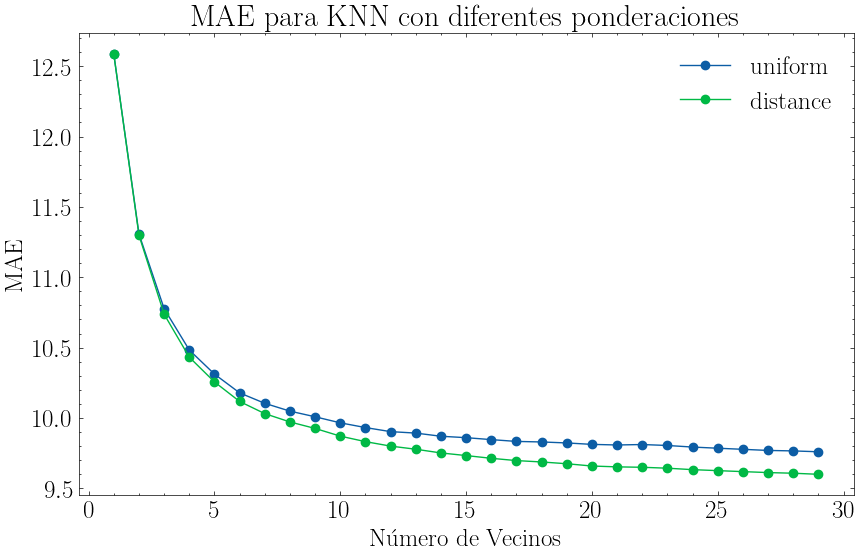

In [75]:
def knnreg_minval(X_train, y_train):
    # Inicializamos KFold con 10 splits
    cv = KFold(n_splits=10, shuffle=True, random_state=seed)  # Agrega un seed para reproducibilidad

    # Crear una figura para todos los gráficos
    plt.figure(figsize=(10, 6))

    for i, weights in enumerate(['uniform', 'distance']):
        total_scores = []

        # Iteramos sobre el rango de vecinos a considerar
        for n_neighbors in range(1, 30):
            fold_accuracy = []
            knn = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

            # Validación cruzada
            for train_index, test_index in cv.split(X_train):
                # División train/test según los índices generados por KFold
                X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                # Entrenamos el modelo KNN
                knn.fit(X_train_fold, y_train_fold)

                # Predecimos con el conjunto de prueba
                y_pred = knn.predict(X_test_fold)

                # Calculamos el MAE (error absoluto medio)
                mae = mean_absolute_error(y_test_fold, y_pred)
                fold_accuracy.append(mae)

            # Calculamos el MAE promedio entre todos los folds
            total_scores.append(sum(fold_accuracy) / len(fold_accuracy))

        # Graficamos los resultados para cada valor de n_neighbors en la misma figura
        plt.plot(range(1, len(total_scores) + 1), total_scores, marker='o', label=weights)
        print(f"Min Value {weights} : {min(total_scores)} (n_neighbors={np.argmin(total_scores) + 1})")

    # Configuración del gráfico después de la iteración
    plt.ylabel('MAE')
    plt.xlabel('Número de Vecinos')
    plt.title('MAE para KNN con diferentes ponderaciones')
    plt.legend()
    plt.show()

knnreg_minval(X_train, y_train)


MAE KNN: 9.459243470000398
R2 KNN: 0.7957021391792722


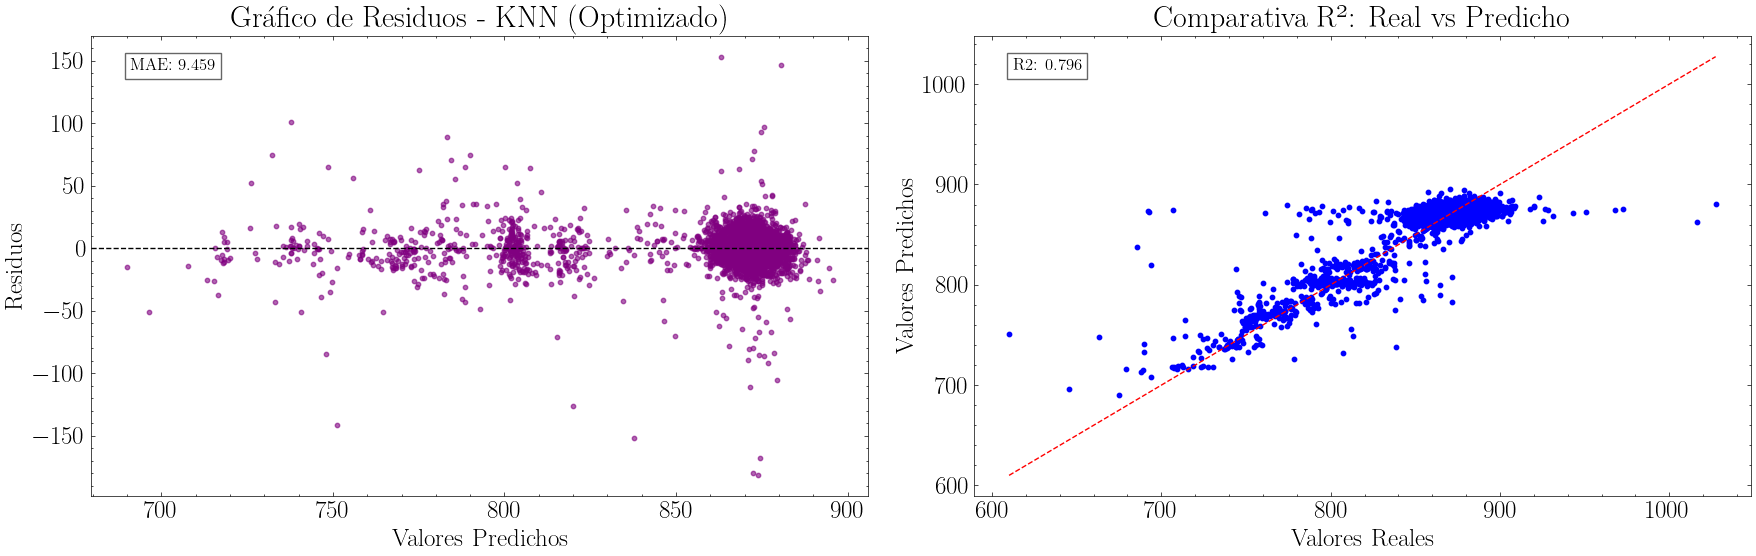

In [76]:
n_neighbors = 29
weights = 'distance'
knn_model = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)

# Ajustar el modelo final
knn_model.fit(X_train, y_train)

# Predicciones
y_pred_knn = knn_model.predict(X_test)

# Evaluar el modelo
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"MAE KNN: {mae_knn}")
print(f"R2 KNN: {r2_knn}")

# Crear la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos_knn = y_test - y_pred_knn
ax1.scatter(y_pred_knn, residuos_knn, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - KNN (Optimizado)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_knn:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R² entre los valores reales y predichos
ax2.scatter(y_test, y_pred_knn, c='blue', s=10, label="Predicciones")
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_knn:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()

## Neural Network Regressor

In [77]:
from sklearn.neural_network import MLPRegressor
from skopt.space import Categorical

In [ ]:
# Definir los parámetros a optimizar
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100), (150, 100, 50), (200, 150, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.05],
    'max_iter': [200, 400, 600, 800],
    'batch_size': [32, 64, 128],
    'momentum': [0.9, 0.95, 0.99],
    'early_stopping': [True, False],
    'beta_1': [0.9, 0.95, 0.99],
    'beta_2': [0.999, 0.99, 0.98],
}

# Crear el modelo base
mlp = MLPRegressor(random_state=seed)

# Implementar RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid_mlp,
                                       n_iter=30, cv=5, verbose=2, random_state=seed, n_jobs=-1,
                                       scoring='neg_mean_absolute_error')

# Ajustar el modelo
random_search_mlp.fit(X_train, y_train)

# Obtener el mejor modelo
best_mlp_random = random_search_mlp.best_estimator_

# Predecir en el conjunto de prueba
y_pred_mlp_random = best_mlp_random.predict(X_test)

# Evaluar el MAE y el coeficiente R2
mae_mlp_random = mean_absolute_error(y_test, y_pred_mlp_random)
r2_mlp_random = r2_score(y_test, y_pred_mlp_random)
print("RSCV MLPRegressor:")
print(f"Mejor MAE: {mae_mlp_random}")
print(f"Mejor R2: {r2_mlp_random}")
print(f"Mejores parámetros: {random_search_mlp.best_params_}")


RSCV MLPRegressor:
Mejor MAE: 10.362805554559014
Mejor R2: 0.7655029530298684
Mejores parámetros: {'solver': 'lbfgs', 'momentum': 0.99, 'max_iter': 800, 'learning_rate_init': 0.01, 'learning_rate': 'constant', 'hidden_layer_sizes': (200, 150, 100), 'early_stopping': False, 'beta_2': 0.99, 'beta_1': 0.9, 'batch_size': 128, 'alpha': 0.0001, 'activation': 'relu'}



In [ ]:
# Mantener los mejores hiperparámetros
mlp_model = MLPRegressor(solver= 'lbfgs',
                         momentum=0.99,
                         max_iter=800,
                         learning_rate_init=0.01,
                         learning_rate='constant',
                         hidden_layer_sizes=(200, 150, 100),
                         early_stopping=False,
                         beta_2=0.99,
                         beta_1=0.9,
                         batch_size=128,
                         alpha=0.0001,
                         activation='relu')

# Ajustar el modelo final
mlp_model.fit(X_train, y_train)

# Predicciones
y_pred_mlp = mlp_model.predict(X_test)

# Evaluar el modelo
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MAE MLPRegressor: {mae_mlp}")
print(f"R2 MLPRegressor: {r2_mlp}")

# Gráfico de errores y comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de la izquierda: Gráfico de residuos (errores)
residuos_mlp = y_test - y_pred_mlp
ax1.scatter(y_pred_mlp, residuos_mlp, c='purple', s=10, label="Residuos", alpha=0.6)
ax1.axhline(0, color='black', linestyle='--')
ax1.set_xlabel("Valores Predichos")
ax1.set_ylabel("Residuos")
ax1.set_title("Gráfico de Residuos - MLPRegressor (Optimizado)")

# Anotar el MAE en el gráfico
ax1.annotate(f'MAE: {mae_mlp:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

# Gráfico de la derecha: Comparativa del R² entre los valores reales y predichos
ax2.scatter(y_test, y_pred_mlp, c='blue', s=10, label="Predicciones")
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Valores Predichos")
ax2.set_title("Comparativa R²: Real vs Predicho")

# Anotar el R2 en el gráfico
ax2.annotate(f'R2: {r2_mlp:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             horizontalalignment='left', verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

plt.tight_layout()
plt.show()


MAE MLPRegressor: 9.699243598891037

R2 MLPRegressor: 0.7848773802350263
